In [2]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier
from sklearn. ensemble import  VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_classif,f_regression,chi2,mutual_info_classif

In [123]:
X = np.genfromtxt("X_train.txt",delimiter=',')
Y = np.genfromtxt("Y_train.txt",delimiter=None)
X = X[:,:41]
selector= SelectKBest(mutual_info_classif, k=2)
X_new = selector.fit_transform(X, Y)
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75);

In [124]:
minI = 0
minJ = 0
smallestErr = 10 #technically shouldnt be bigger than 1
for i in range(0,41):
    for j in range(i+1,41):
        Xt = np.zeros((Xtr.shape[0], 2))
        Xt[:,0] = Xtr[:,i]
        Xt[:,1] = Xtr[:,j]
        clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
        clf.fit(Xt,Ytr)
        Xv = np.zeros((Xva.shape[0], 2))
        Xv[:,0] = Xva[:,i]
        Xv[:,1] = Xva[:,j]
        Yhat = clf.predict(Xv)
        err = np.mean(Yhat.reshape(Yva.shape) != Yva)
        if (err < smallestErr):
            print("i: ", i, ", j: ", j, ", err: ", err)
            smallestErr = err
            minI = i
            minJ = j

i:  0 , j:  1 , err:  0.5129310344827587
i:  0 , j:  2 , err:  0.4865301724137931
i:  0 , j:  6 , err:  0.4838362068965517
i:  0 , j:  9 , err:  0.47898706896551724
i:  0 , j:  36 , err:  0.4698275862068966
i:  1 , j:  7 , err:  0.4639008620689655
i:  2 , j:  7 , err:  0.4515086206896552
i:  3 , j:  28 , err:  0.4482758620689655
i:  7 , j:  14 , err:  0.4418103448275862


In [126]:
numB = 30
minI = np.array([0.0]*numB)
minJ = np.array([0.0]*numB)
smallestErr = np.array([10.0]*numB) #technically shouldnt be bigger than 1
for i in range(0,41):
    for j in range(i+1,41):
        Xt = np.zeros((Xtr.shape[0], 2))
        Xt[:,0] = Xtr[:,i]
        Xt[:,1] = Xtr[:,j]
        clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
        clf.fit(Xt,Ytr)
        Xv = np.zeros((Xva.shape[0], 2))
        Xv[:,0] = Xva[:,i]
        Xv[:,1] = Xva[:,j]
        Yhat = clf.predict(Xv)
        err = np.mean(Yhat.reshape(Yva.shape) != Yva)
        if (err < smallestErr[numB-1]):
            for e in range(0, numB):
                if err < smallestErr[e]:
                    smallestErr = np.insert(smallestErr, e, err)
                    minI = np.insert(minI, e, i)
                    minJ = np.insert(minJ, e, j)
                    smallestErr = smallestErr[:numB]
                    minI = minI[:numB]
                    minJ = minJ[:numB]
                    #print(smallestErr)
                    #print(minI)
                    #print(minJ)
                    break
            #print("i: ", i, ", j: ", j, ", err: ", err)
        #else:
        #    print("i: ", i, ", j: ", j, ", err: ", err)
            #smallestErr = err
            #minI = i
            #minJ = j
print(smallestErr)
print(minI)
print(minJ)

[0.41109914 0.41217672 0.44665948 0.44773707 0.44827586 0.44989224
 0.45366379 0.45689655 0.45743534 0.45959052 0.4606681  0.4606681
 0.46336207 0.46336207 0.46390086 0.46443966 0.46443966 0.46497845
 0.46551724 0.46659483 0.46713362 0.46767241 0.46767241 0.46767241
 0.46821121 0.46821121 0.46821121 0.46821121 0.46875    0.46875   ]
[24.  7.  7. 26.  7.  7.  6. 24.  7.  7.  0.  5.  5.  7.  8.  5. 21. 24.
  7.  5. 20.  0.  5. 10.  6.  7. 24. 24. 22. 23.]
[28. 24. 29. 28. 15. 21. 28. 35. 16. 33.  7. 33. 23. 28. 24.  6. 24. 32.
 22.  9. 27.  5. 28. 28.  7. 36. 25. 29. 40. 28.]


In [127]:
classifiers = [0]*numB
for i in range(numB):
    Xt = np.zeros((Xtr.shape[0], 2))
    Xt[:,0] = Xtr[:,i]
    Xt[:,1] = Xtr[:,j]
    Xi, Yi = ml.bootstrapData(Xt, Ytr)
    classifiers[i] = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
    classifiers[i].fit(Xi,Yi)
    #classifiers[i] = ml.dtree.treeClassify(Xi, Yi, maxDepth=20, minParent = 10)

In [128]:
#Xte = np.genfromtxt('data/X_test.txt', delimiter=',')
predict = np.zeros((Xva.shape[0], numB))
for i in range(numB):
    Xv = np.zeros((Xva.shape[0], 2))
    Xv[:,0] = Xva[:,i]
    Xv[:,1] = Xva[:,j]
    predict[:,i] = classifiers[i].predict(Xv)
predict = np.mean(predict, axis = 1)
print(predict)
print(np.mean(Yhat.reshape(Yva.shape) != Yva))

[0.43333333 0.53333333 0.46666667 ... 0.53333333 0.46666667 0.46666667]
0.5134698275862069


In [129]:
classifiers = [0]*numB
for i in range(numB):
    Xt = np.zeros((X.shape[0], 2))
    Xt[:,0] = X[:,i]
    Xt[:,1] = X[:,j]
    Xi, Yi = ml.bootstrapData(Xt, Y)
    classifiers[i] = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
    classifiers[i].fit(Xi,Yi)
    #classifiers[i] = ml.dtree.treeClassify(Xi, Yi, maxDepth=20, minParent = 10)
    
Xte = np.genfromtxt('X_test.txt', delimiter=',')
predict = np.zeros((Xte.shape[0], numB))
for i in range(numB):
    Xv = np.zeros((Xte.shape[0], 2))
    Xv[:,0] = Xte[:,i]
    Xv[:,1] = Xte[:,j]
    predict[:,i] = classifiers[i].predict(Xv)
predict = np.mean(predict, axis = 1)
print(predict)
    
Yte = np.vstack((np.arange(Xte.shape[0]), predict)).T
# Output a file with two columns, a row ID and a confidence in class 1:
np.savetxt('Y_submit.txt',Yte,'%d, %.2f',header='ID,Predicted',comments='',delimiter=',')

[0.33333333 0.36666667 0.3        ... 0.36666667 0.33333333 0.36666667]


In [102]:
def getErrorForNClass(numB = 10):
    minI = np.array([0.0]*numB)
    minJ = np.array([0.0]*numB)
    smallestErr = np.array([10.0]*numB) #technically shouldnt be bigger than 1
    for i in range(0,41):
        for j in range(i+1,41):
            Xt = np.zeros((Xtr.shape[0], 2))
            Xt[:,0] = Xtr[:,i]
            Xt[:,1] = Xtr[:,j]
            clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
            clf.fit(Xt,Ytr)
            Xv = np.zeros((Xva.shape[0], 2))
            Xv[:,0] = Xva[:,i]
            Xv[:,1] = Xva[:,j]
            Yhat = clf.predict(Xv)
            err = np.mean(Yhat.reshape(Yva.shape) != Yva)
            if (err < smallestErr[numB-1]):
                for e in range(0, numB):
                    if err < smallestErr[e]:
                        smallestErr = np.insert(smallestErr, e, err)
                        minI = np.insert(minI, e, i)
                        minJ = np.insert(minJ, e, j)
                        smallestErr = smallestErr[:numB]
                        minI = minI[:numB]
                        minJ = minJ[:numB]
                        #print(smallestErr)
                        #print(minI)
                        #print(minJ)
                        break
                #print("i: ", i, ", j: ", j, ", err: ", err)
            #else:
            #    print("i: ", i, ", j: ", j, ", err: ", err)
                #smallestErr = err
                #minI = i
                #minJ = j
    classifiers = [0]*numB
    for i in range(numB):
        Xt = np.zeros((Xtr.shape[0], 2))
        Xt[:,0] = Xtr[:,i]
        Xt[:,1] = Xtr[:,j]
        Xi, Yi = ml.bootstrapData(Xt, Ytr)
        classifiers[i] = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
        classifiers[i].fit(Xi,Yi)
        #classifiers[i] = ml.dtree.treeClassify(Xi, Yi, maxDepth=20, minParent = 10)
    #Xte = np.genfromtxt('data/X_test.txt', delimiter=',')
    predict = np.zeros((Xva.shape[0], numB))
    for i in range(numB):
        Xv = np.zeros((Xva.shape[0], 2))
        Xv[:,0] = Xva[:,i]
        Xv[:,1] = Xva[:,j]
        predict[:,i] = classifiers[i].predict(Xv)
    predict = np.mean(predict, axis = 1)
    #print(predict)
    return np.mean(Yhat.reshape(Yva.shape) != Yva)
print(getErrorForNClass(10))

0.4931285367825384


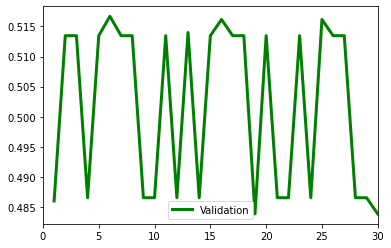

[0.4859913793103448, 0.5134698275862069, 0.5134698275862069, 0.4865301724137931, 0.5134698275862069, 0.5167025862068966, 0.5134698275862069, 0.5134698275862069, 0.4865301724137931, 0.4865301724137931, 0.5134698275862069, 0.4865301724137931, 0.5140086206896551, 0.4865301724137931, 0.5134698275862069, 0.5161637931034483, 0.5134698275862069, 0.5134698275862069, 0.4838362068965517, 0.5134698275862069, 0.4865301724137931, 0.4865301724137931, 0.5134698275862069, 0.4865301724137931, 0.5161637931034483, 0.5134698275862069, 0.5134698275862069, 0.4865301724137931, 0.4865301724137931, 0.4838362068965517]


In [125]:
numBs = [x for x in range(1,31)]
errs = [0] * len(numBs)
for i, k in enumerate(numBs):
    #print(i,k)
    errs[i] = getErrorForNClass(k)
    
#fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# I added lw (line width) and the label. 
plt.plot(numBs, errs, 'g-', lw=3, label='Validation')

# Adding a legend to the plot that will use the labels from the 'label'.
plt.legend()
plt.xlim(0,30)

plt.show()
print(errs)

0 vs 1


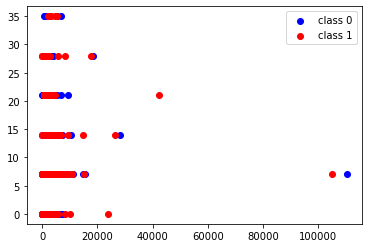

0 vs 2


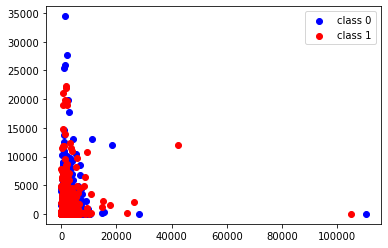

0 vs 3


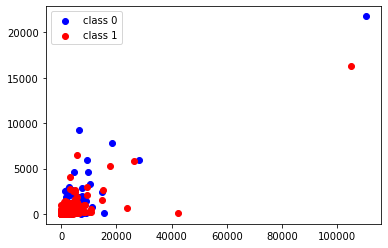

0 vs 4


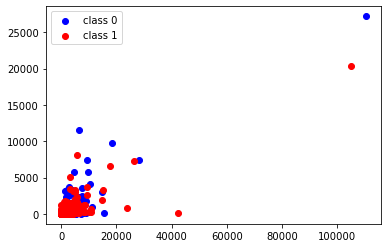

0 vs 5


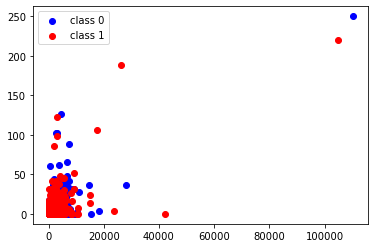

0 vs 6


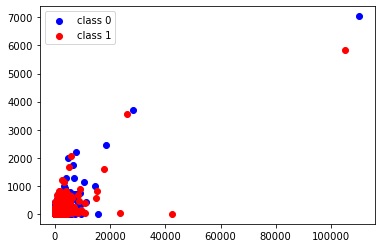

0 vs 7


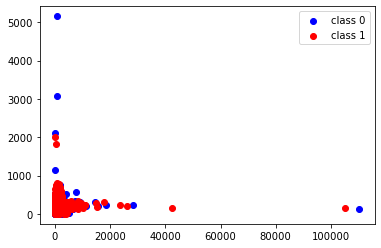

0 vs 8


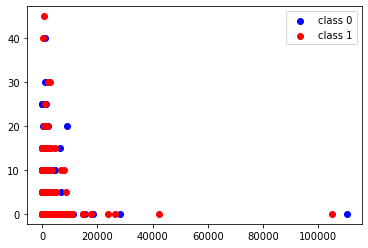

0 vs 9


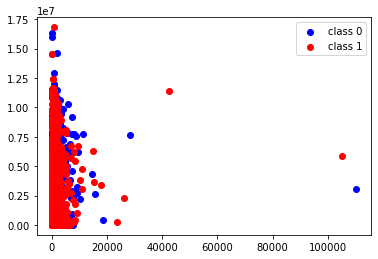

0 vs 10


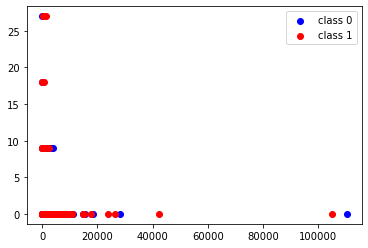

0 vs 11


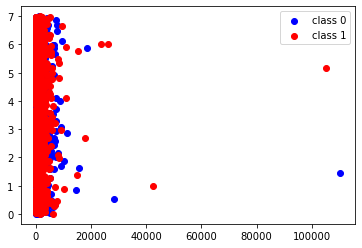

0 vs 12


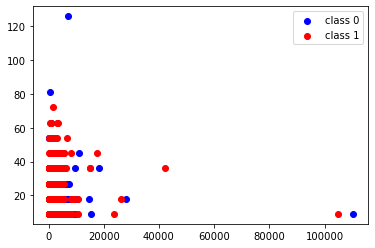

0 vs 13


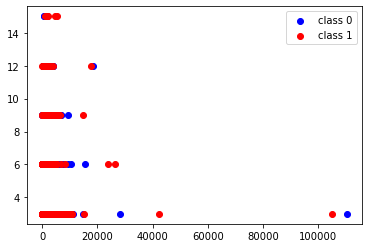

0 vs 14


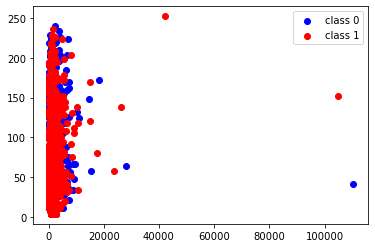

0 vs 15


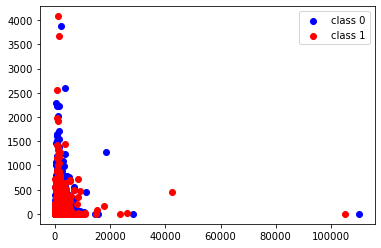

0 vs 16


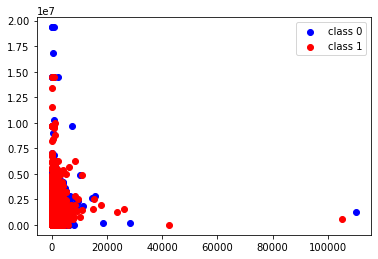

0 vs 17


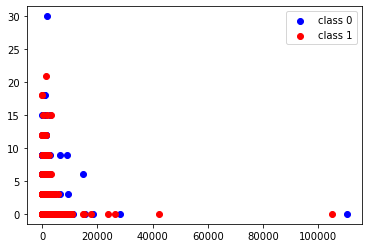

0 vs 18


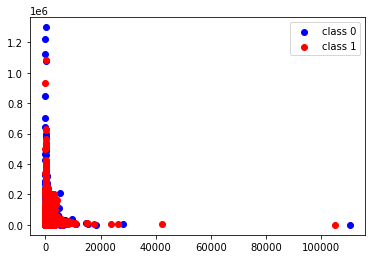

0 vs 19


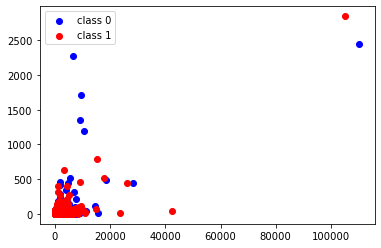

0 vs 20


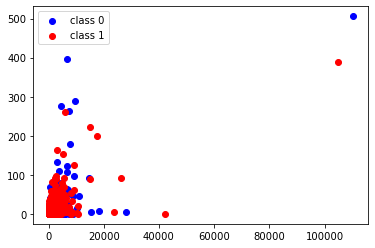

0 vs 21


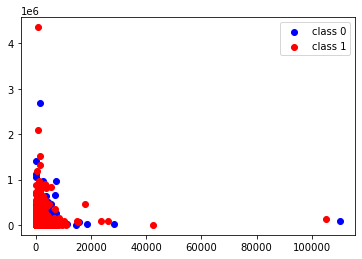

0 vs 22


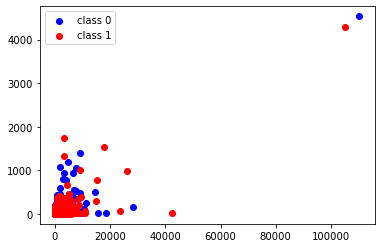

0 vs 23


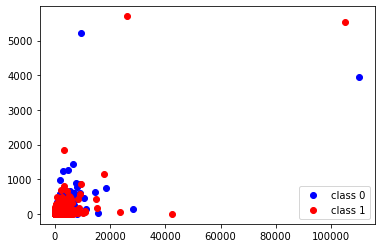

0 vs 24


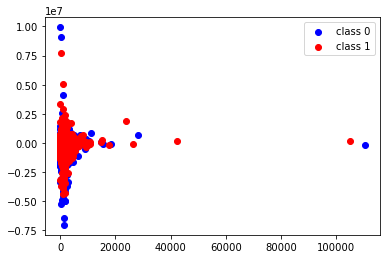

0 vs 25


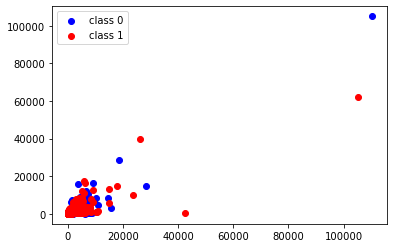

0 vs 26


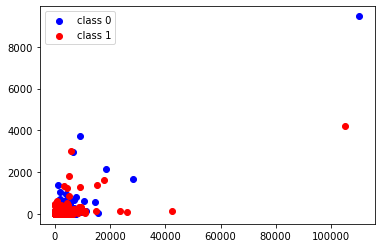

0 vs 27


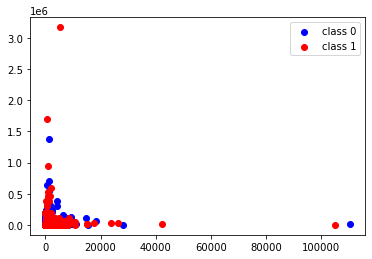

0 vs 28


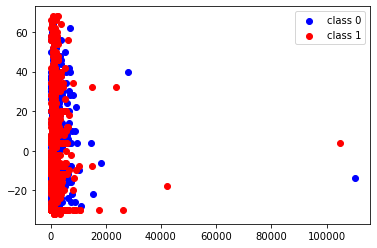

0 vs 29


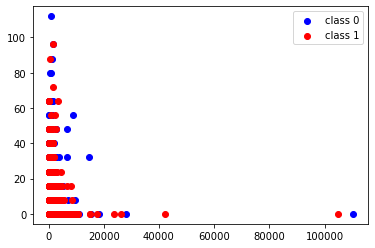

0 vs 30


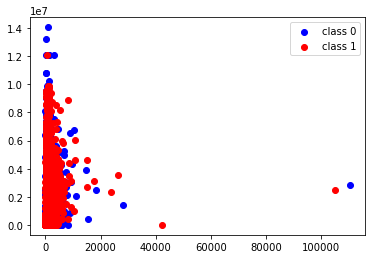

0 vs 31


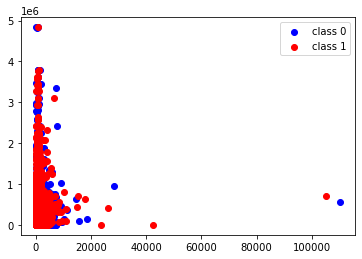

0 vs 32


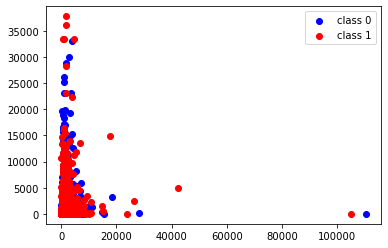

0 vs 33


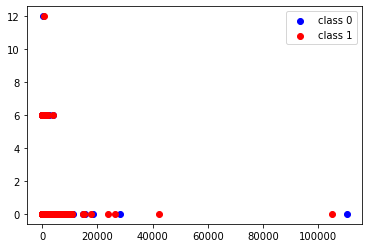

0 vs 34


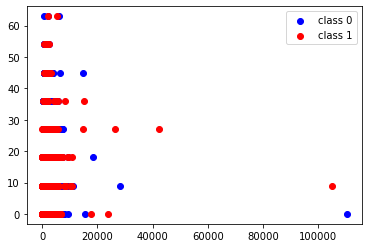

0 vs 35


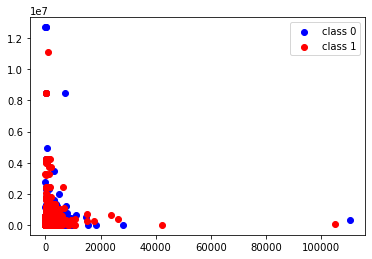

0 vs 36


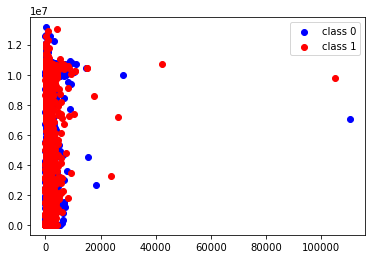

0 vs 37


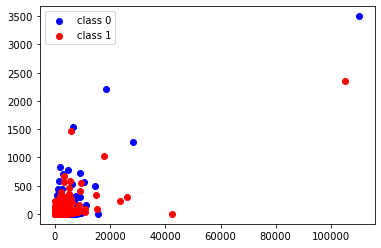

0 vs 38


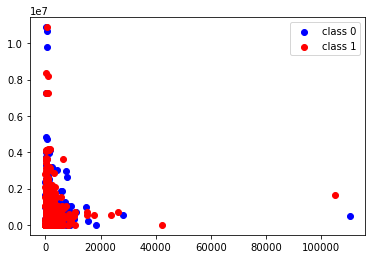

0 vs 39


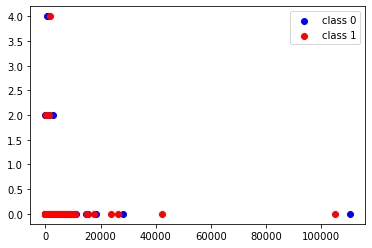

0 vs 40


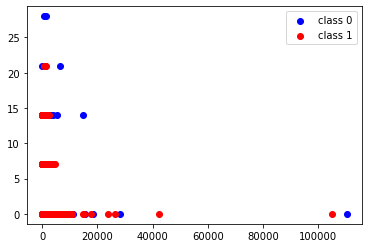

1 vs 2


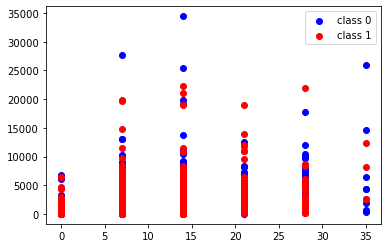

1 vs 3


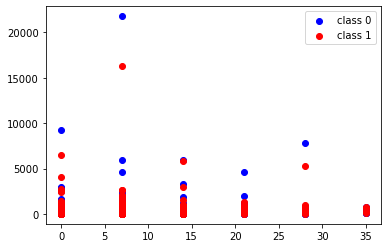

1 vs 4


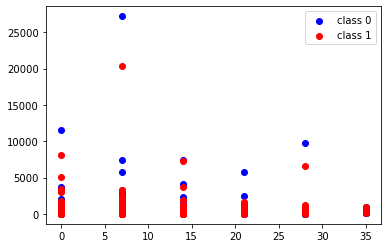

1 vs 5


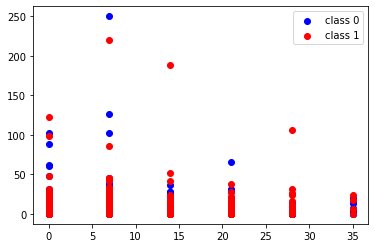

1 vs 6


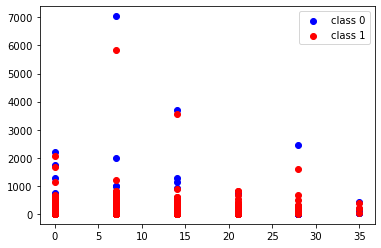

1 vs 7


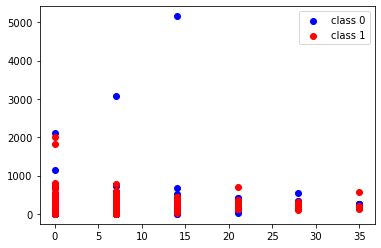

1 vs 8


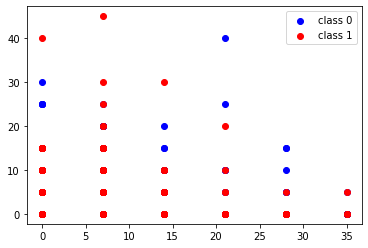

1 vs 9


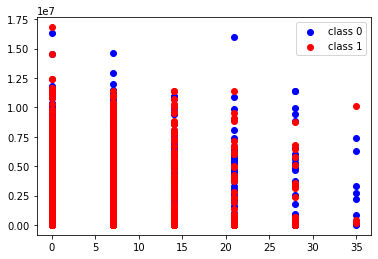

1 vs 10


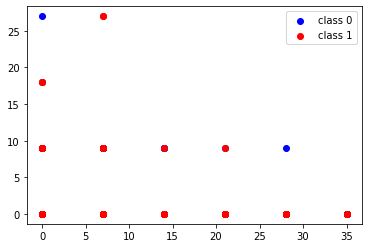

1 vs 11


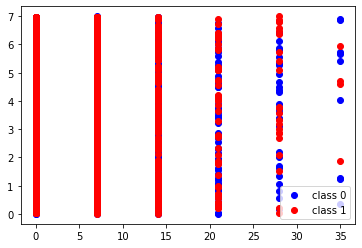

1 vs 12


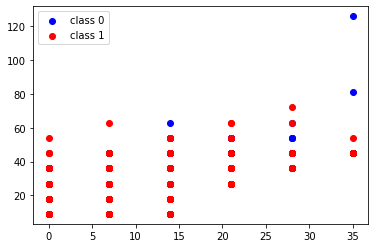

1 vs 13


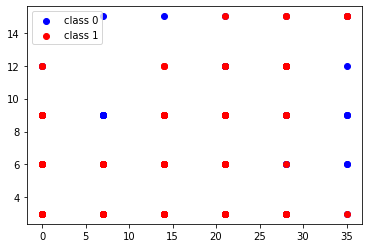

1 vs 14


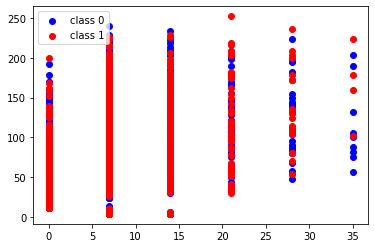

1 vs 15


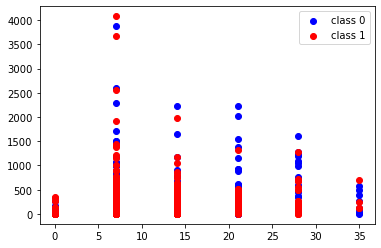

1 vs 16


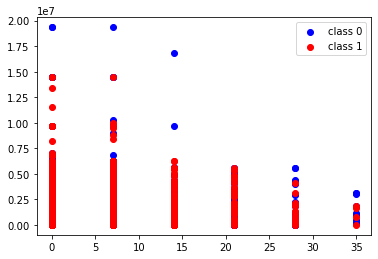

1 vs 17


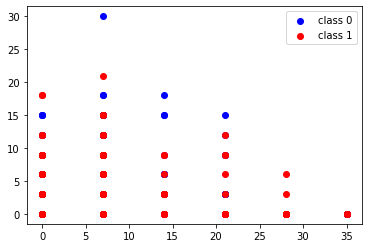

1 vs 18


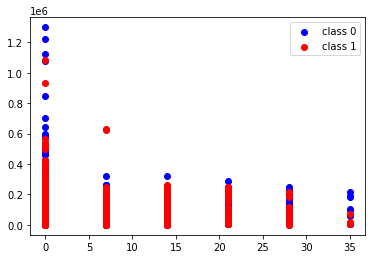

1 vs 19


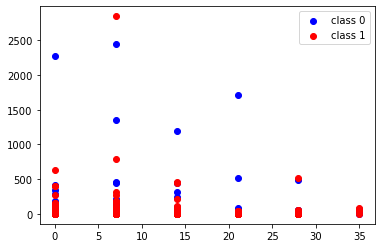

1 vs 20


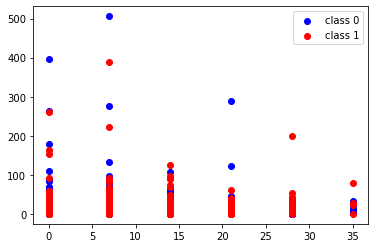

1 vs 21


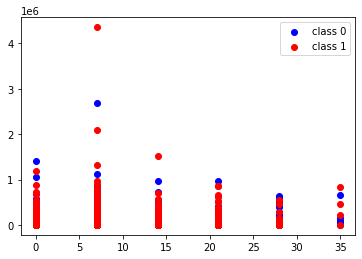

1 vs 22


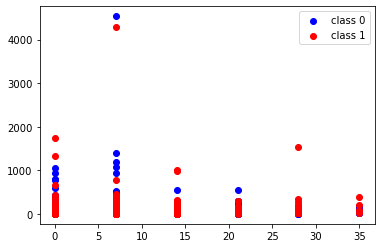

1 vs 23


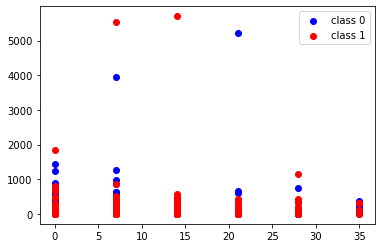

1 vs 24


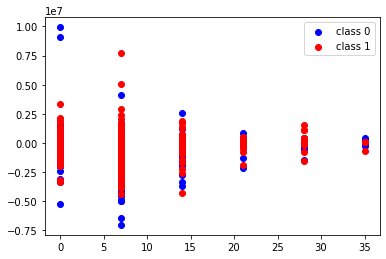

1 vs 25


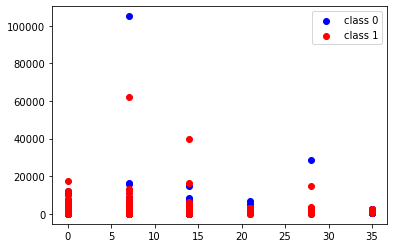

1 vs 26


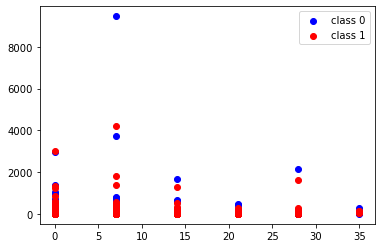

1 vs 27


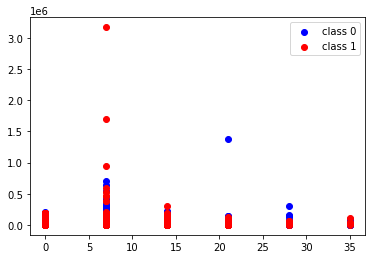

1 vs 28


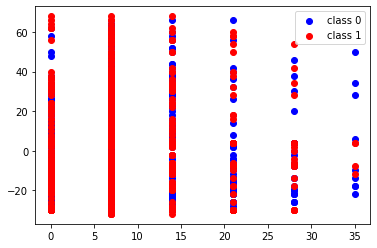

1 vs 29


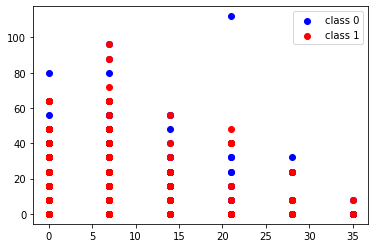

1 vs 30


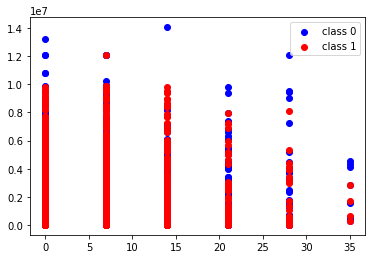

1 vs 31


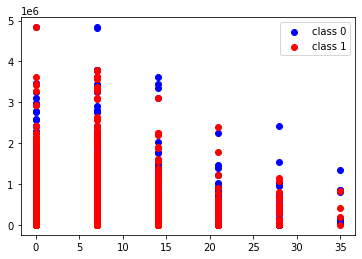

1 vs 32


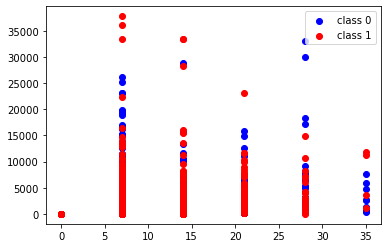

1 vs 33


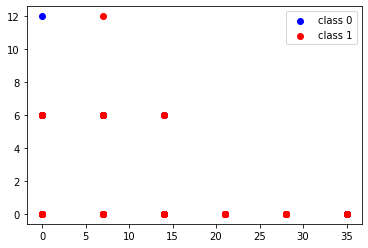

1 vs 34


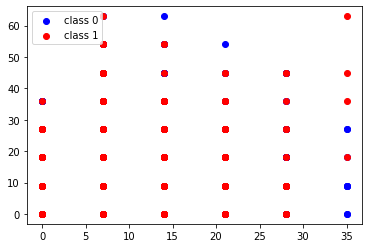

1 vs 35


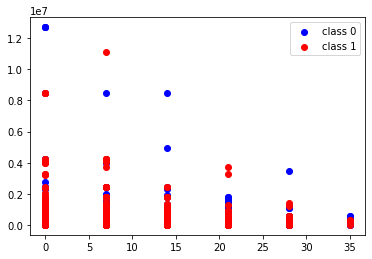

1 vs 36


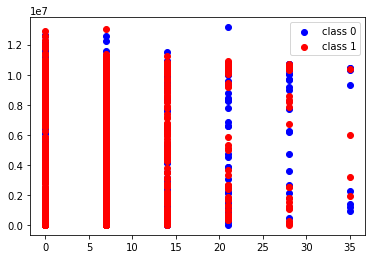

1 vs 37


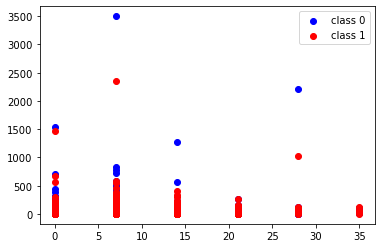

1 vs 38


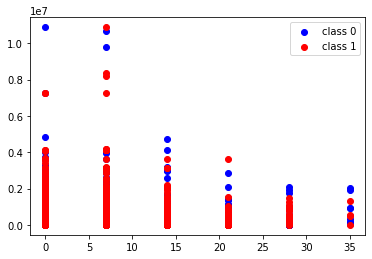

1 vs 39


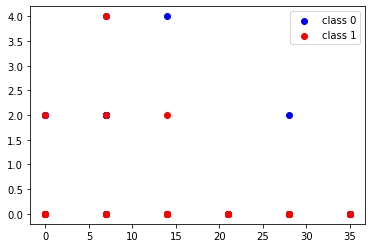

1 vs 40


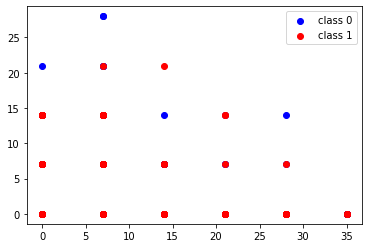

2 vs 3


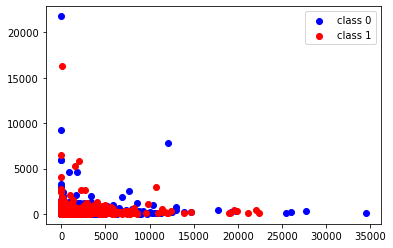

2 vs 4


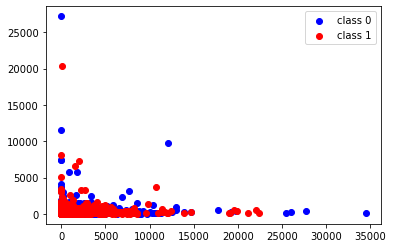

2 vs 5


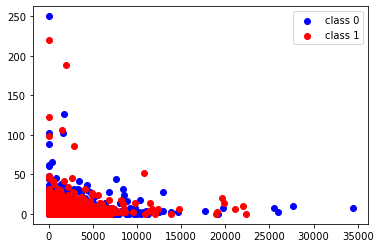

2 vs 6


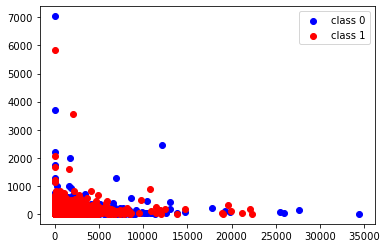

2 vs 7


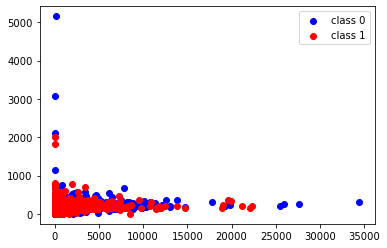

2 vs 8


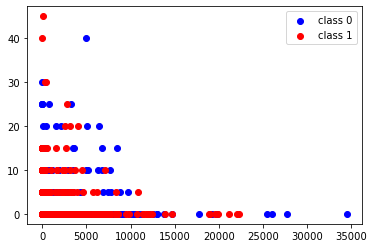

2 vs 9


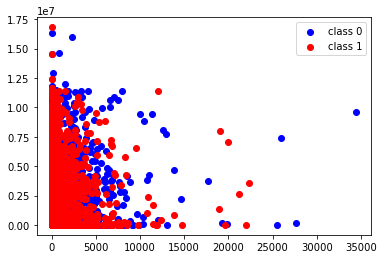

2 vs 10


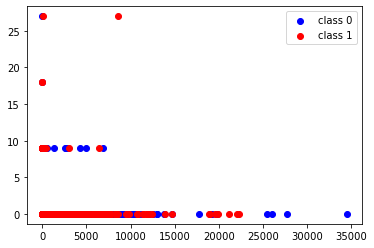

2 vs 11


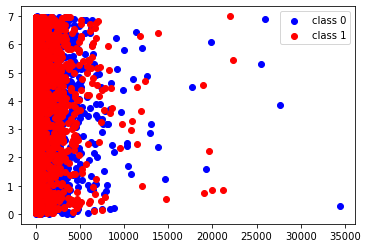

2 vs 12


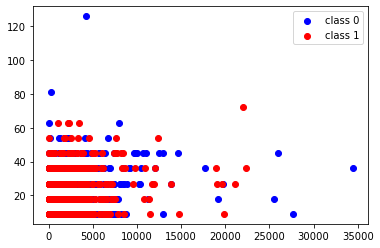

2 vs 13


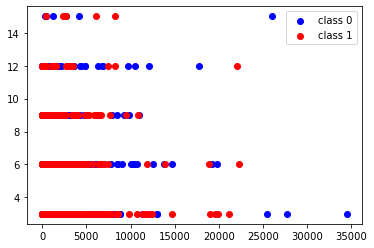

2 vs 14


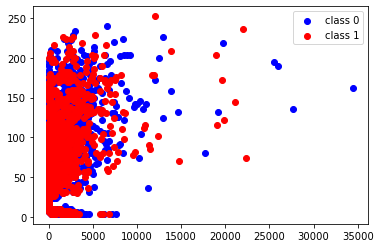

2 vs 15


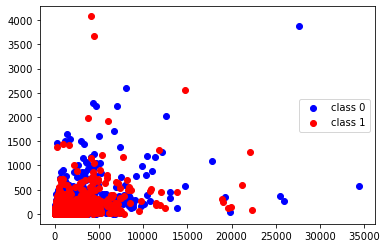

2 vs 16


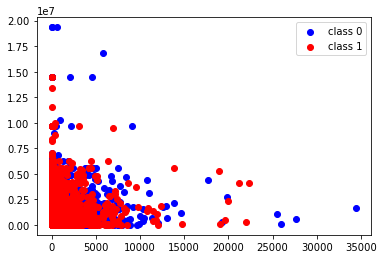

2 vs 17


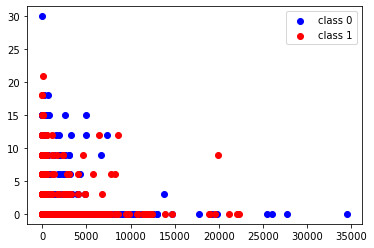

2 vs 18


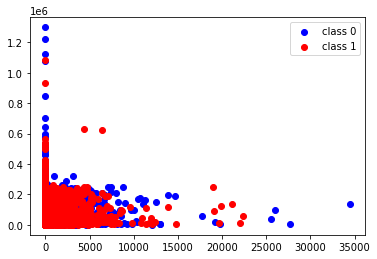

2 vs 19


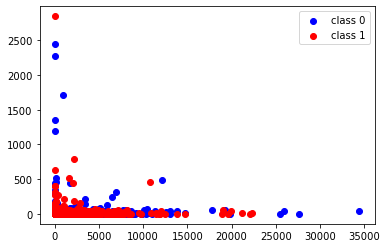

2 vs 20


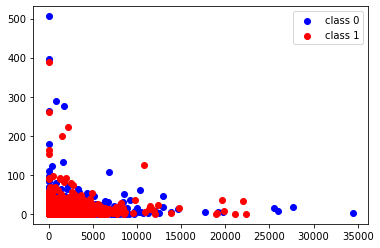

2 vs 21


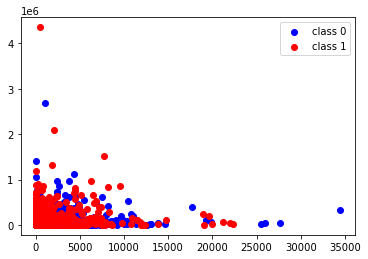

2 vs 22


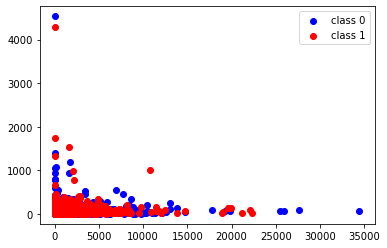

2 vs 23


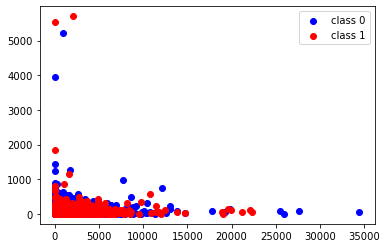

2 vs 24


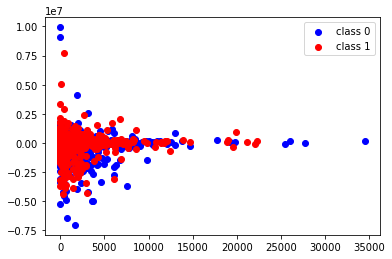

2 vs 25


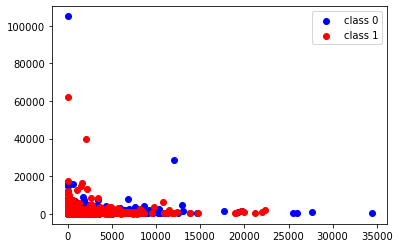

2 vs 26


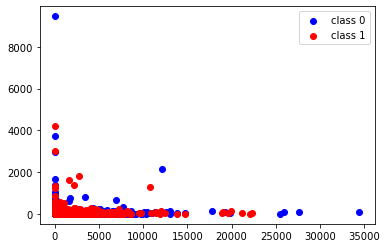

2 vs 27


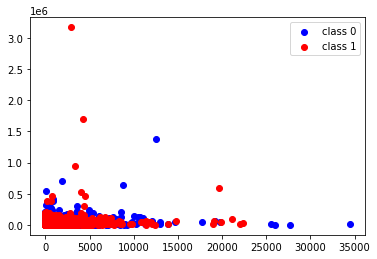

2 vs 28


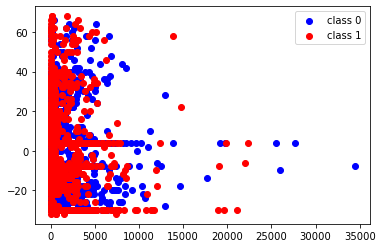

2 vs 29


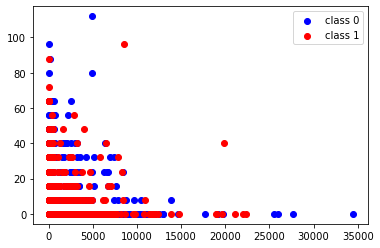

2 vs 30


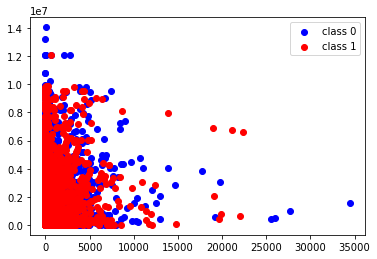

2 vs 31


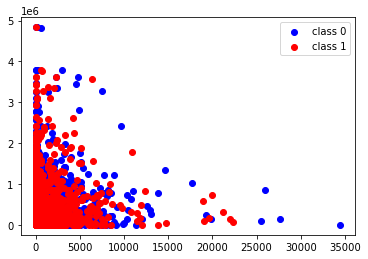

2 vs 32


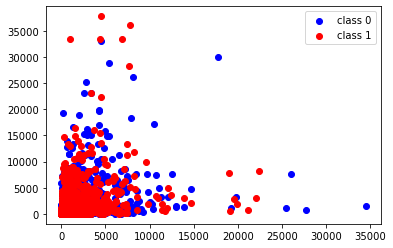

2 vs 33


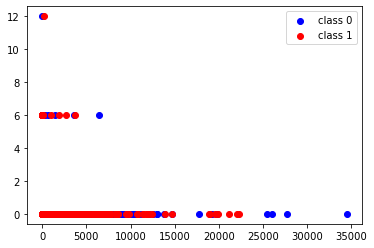

2 vs 34


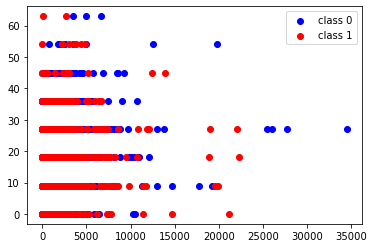

2 vs 35


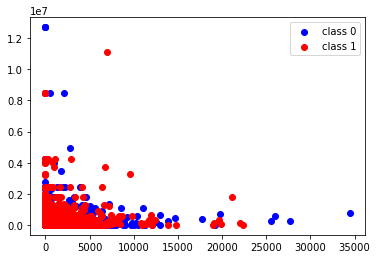

2 vs 36


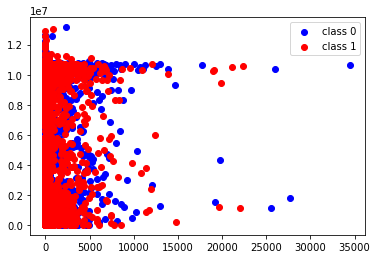

2 vs 37


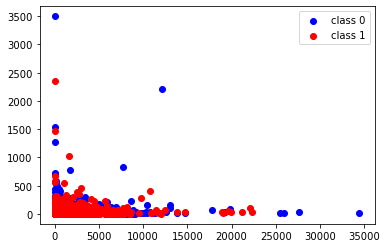

2 vs 38


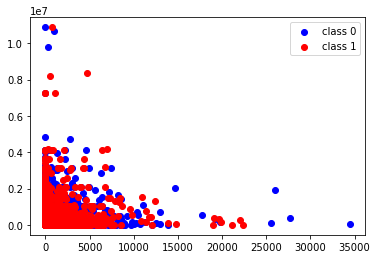

2 vs 39


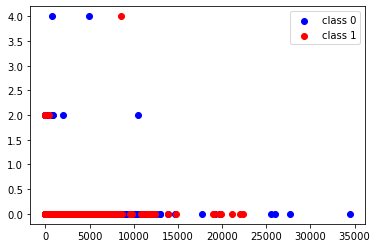

2 vs 40


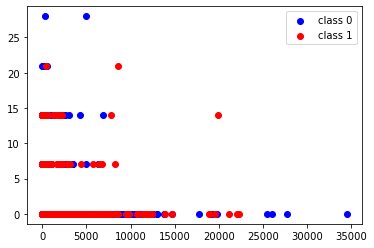

3 vs 4


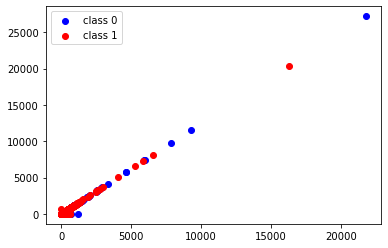

3 vs 5


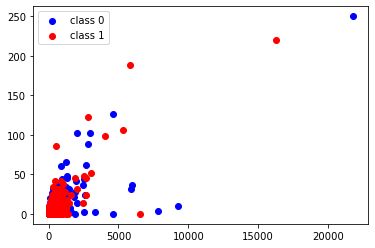

3 vs 6


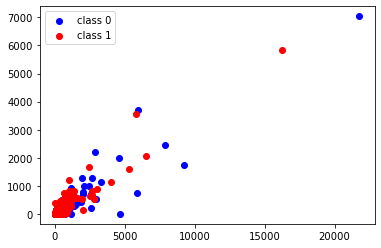

3 vs 7


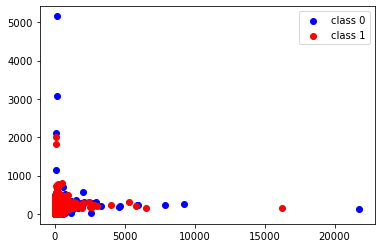

3 vs 8


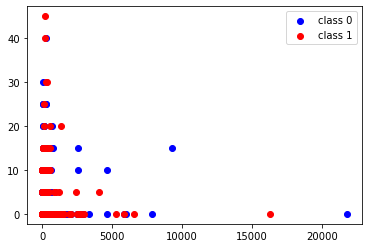

3 vs 9


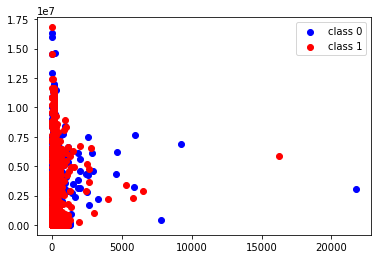

3 vs 10


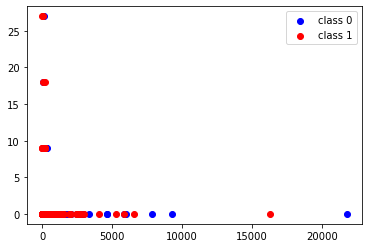

3 vs 11


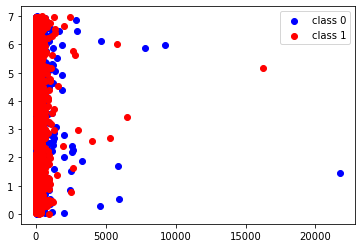

3 vs 12


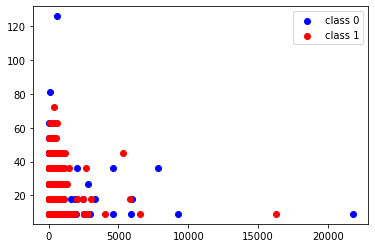

3 vs 13


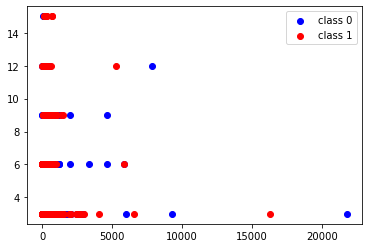

3 vs 14


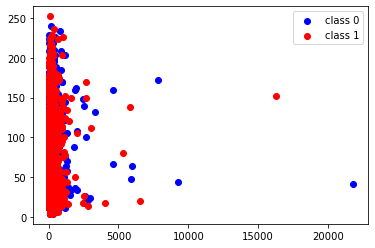

3 vs 15


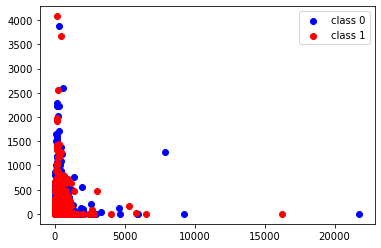

3 vs 16


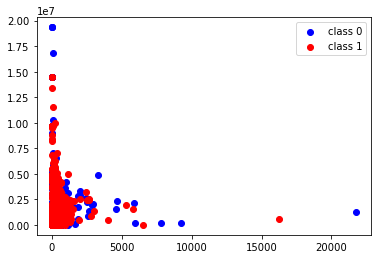

3 vs 17


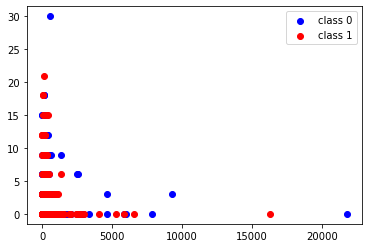

3 vs 18


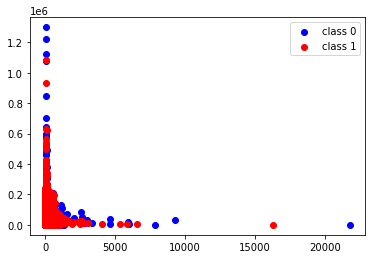

3 vs 19


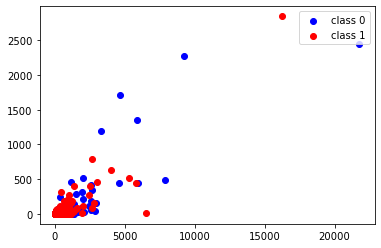

3 vs 20


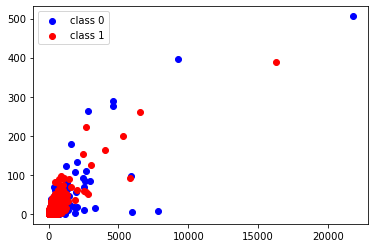

3 vs 21


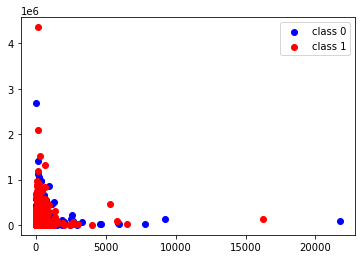

3 vs 22


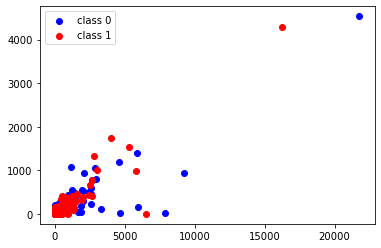

3 vs 23


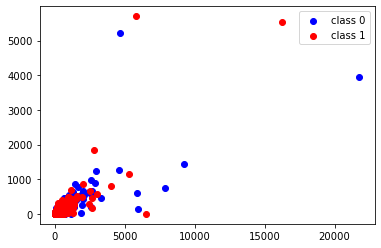

3 vs 24


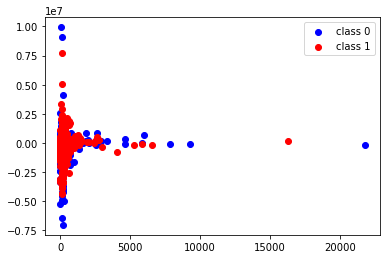

3 vs 25


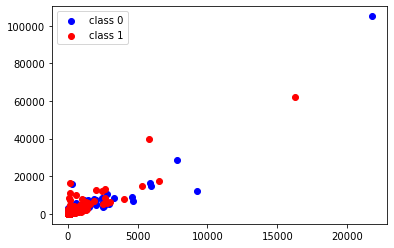

3 vs 26


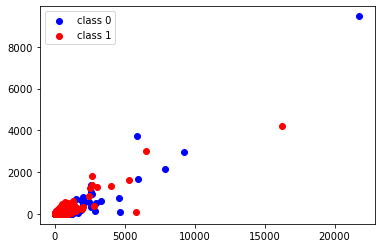

3 vs 27


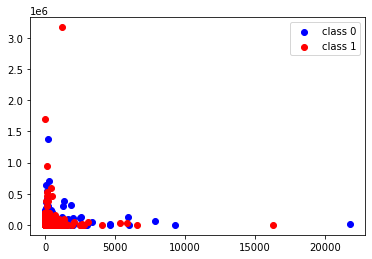

3 vs 28


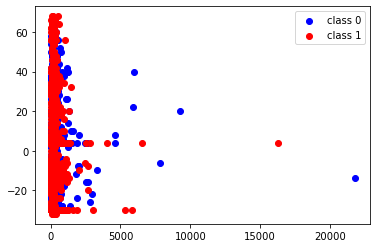

3 vs 29


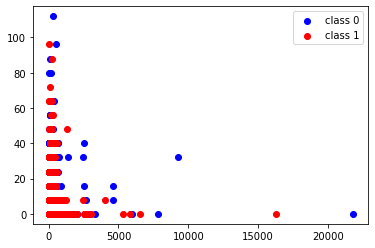

3 vs 30


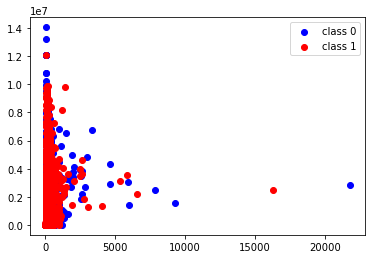

3 vs 31


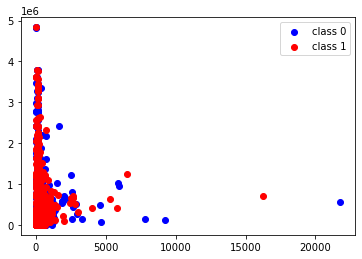

3 vs 32


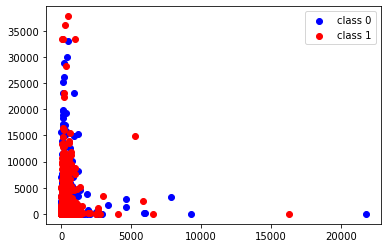

3 vs 33


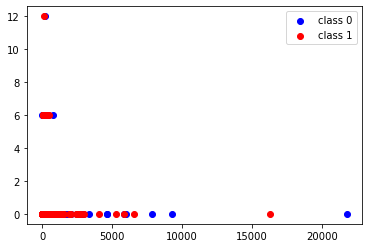

3 vs 34


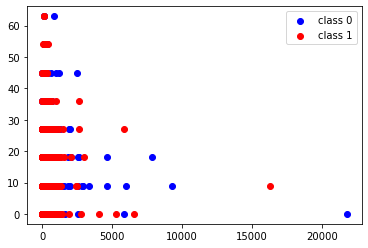

3 vs 35


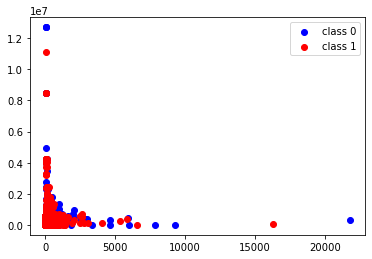

3 vs 36


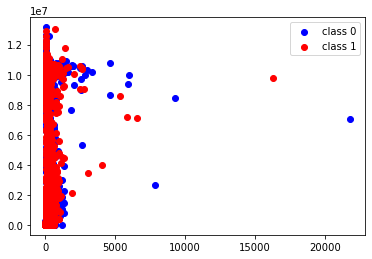

3 vs 37


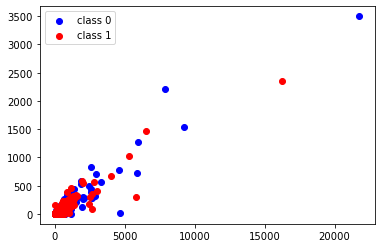

3 vs 38


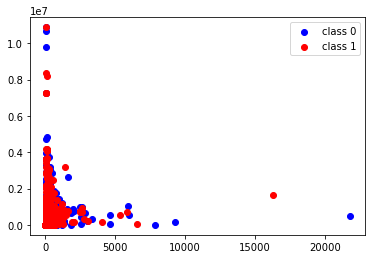

3 vs 39


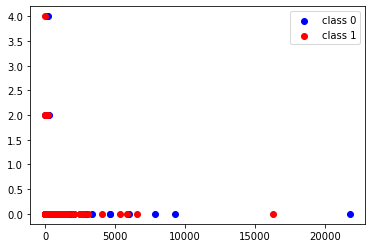

3 vs 40


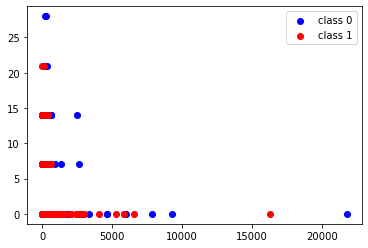

4 vs 5


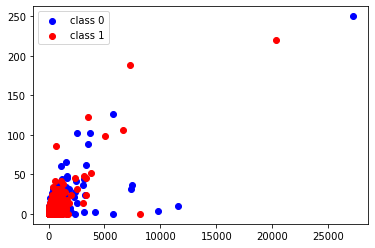

4 vs 6


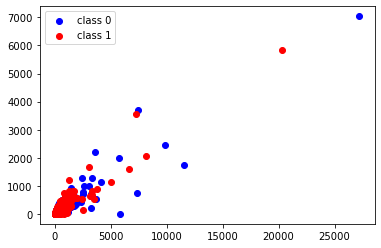

4 vs 7


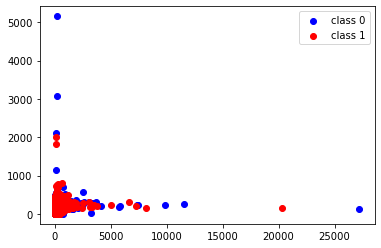

4 vs 8


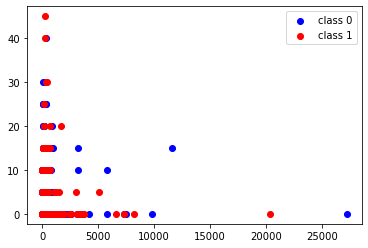

4 vs 9


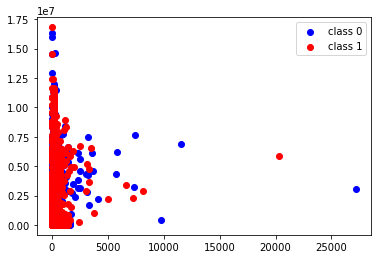

4 vs 10


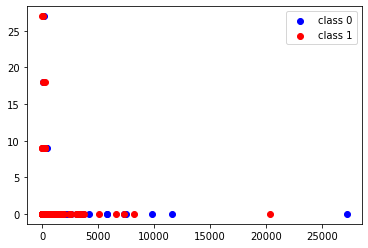

4 vs 11


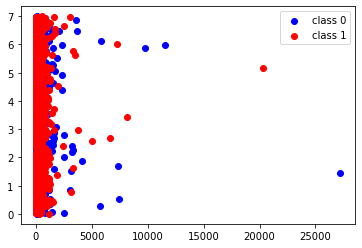

4 vs 12


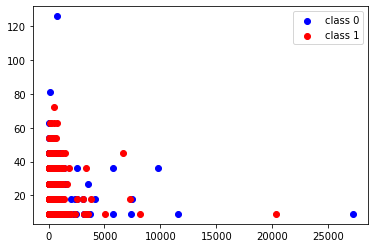

4 vs 13


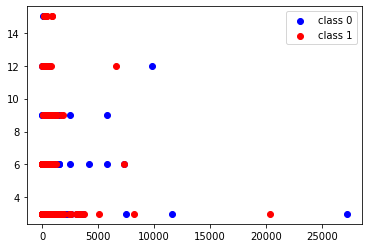

4 vs 14


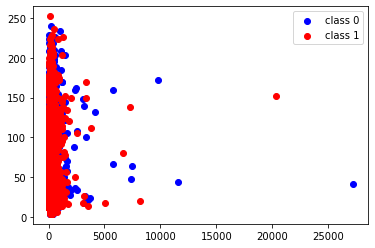

4 vs 15


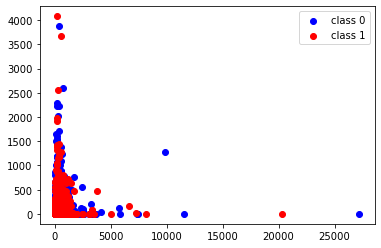

4 vs 16


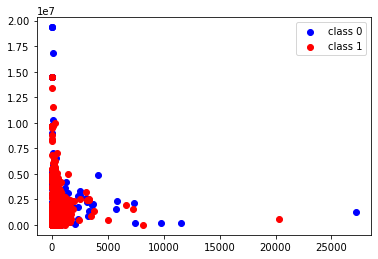

4 vs 17


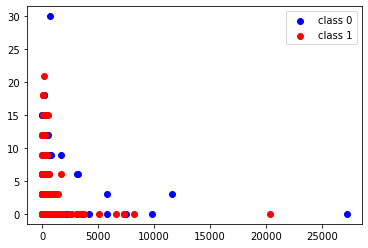

4 vs 18


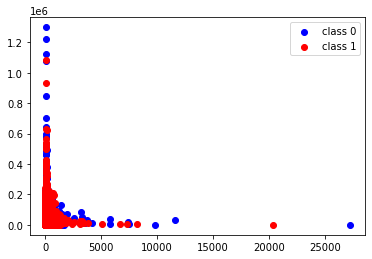

4 vs 19


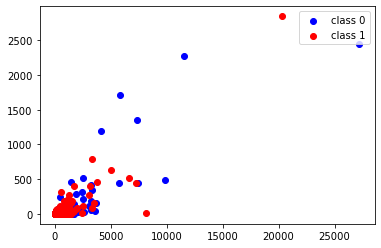

4 vs 20


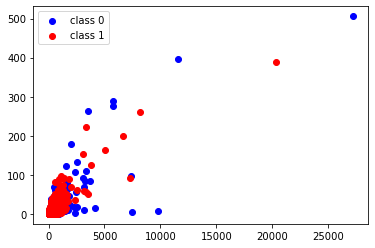

4 vs 21


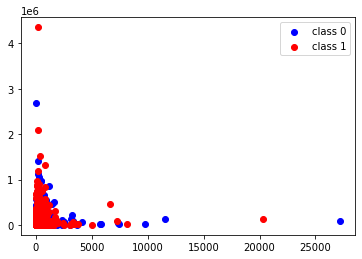

4 vs 22


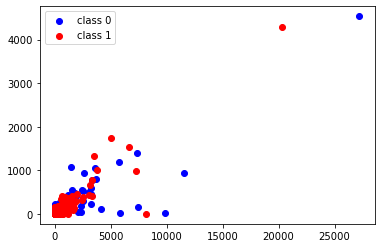

4 vs 23


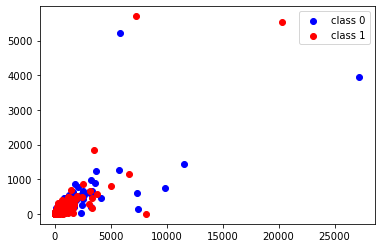

4 vs 24


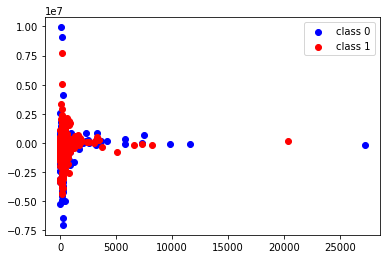

4 vs 25


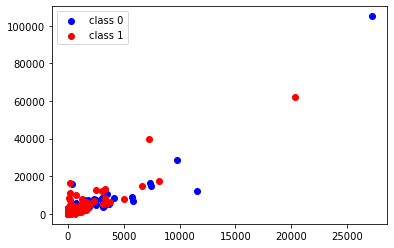

4 vs 26


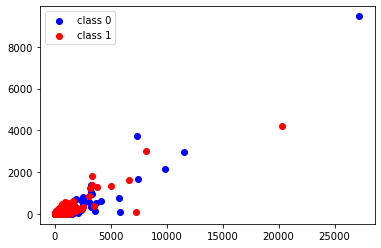

4 vs 27


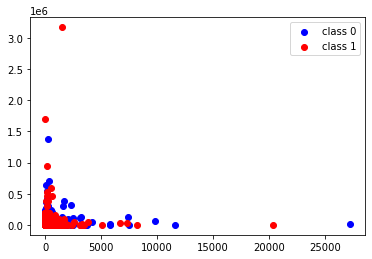

4 vs 28


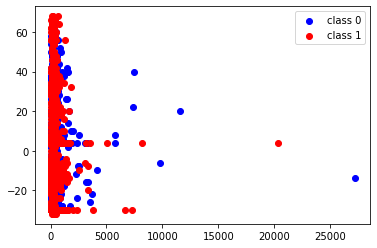

4 vs 29


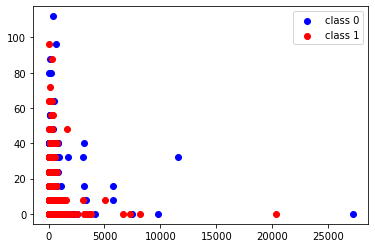

4 vs 30


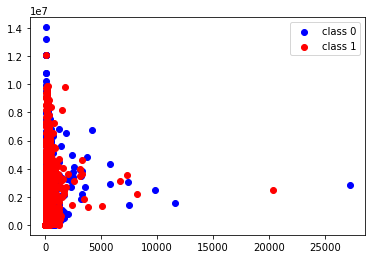

4 vs 31


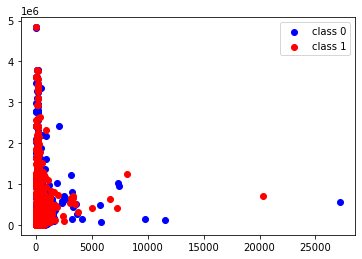

4 vs 32


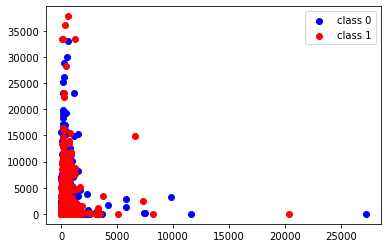

4 vs 33


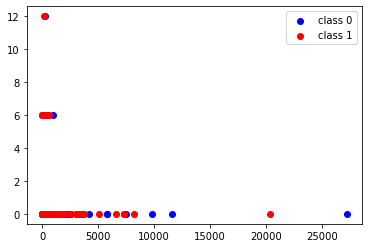

4 vs 34


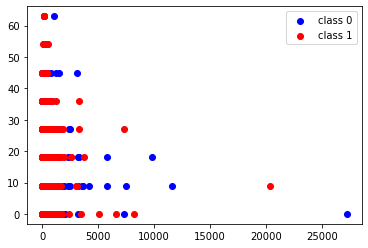

4 vs 35


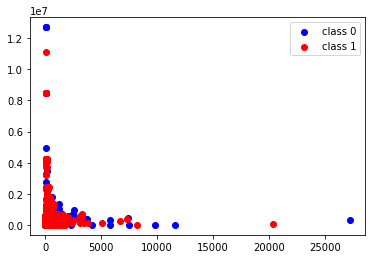

4 vs 36


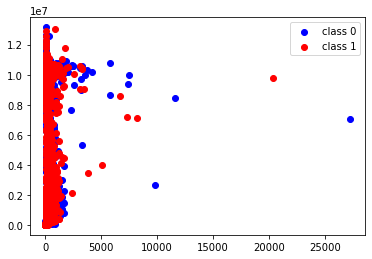

4 vs 37


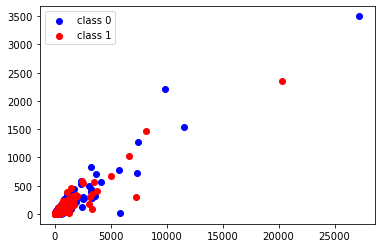

4 vs 38


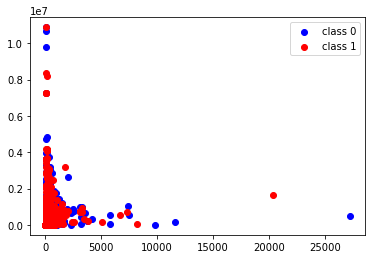

4 vs 39


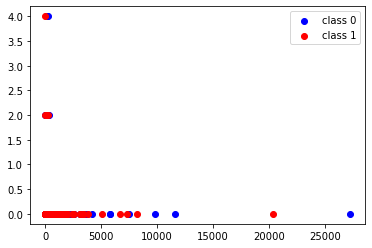

4 vs 40


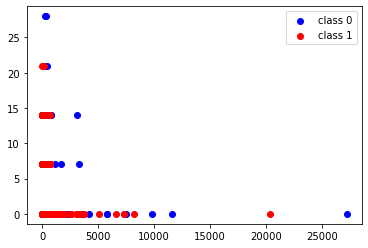

5 vs 6


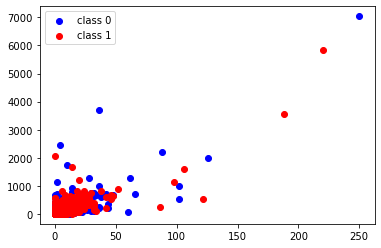

5 vs 7


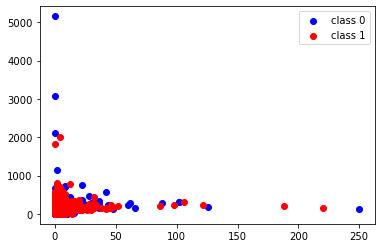

5 vs 8


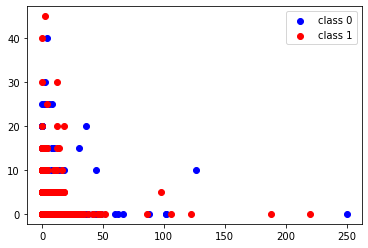

5 vs 9


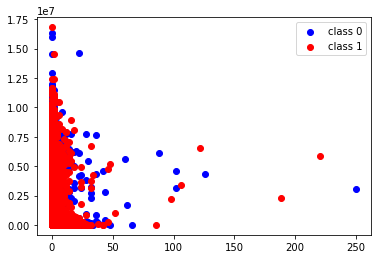

5 vs 10


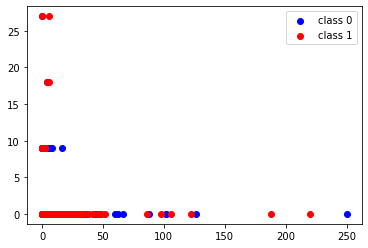

5 vs 11


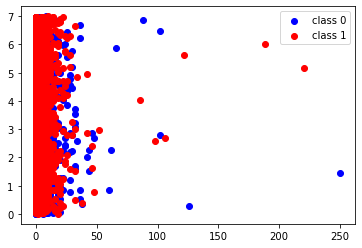

5 vs 12


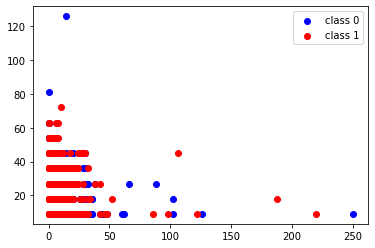

5 vs 13


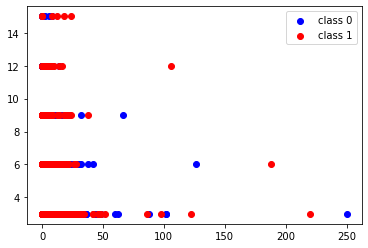

5 vs 14


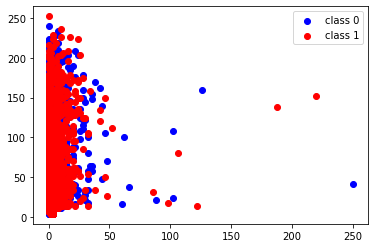

5 vs 15


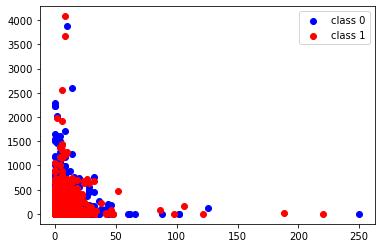

5 vs 16


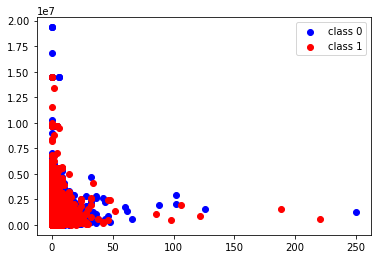

5 vs 17


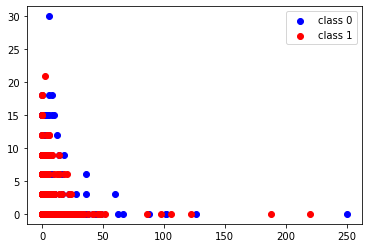

5 vs 18


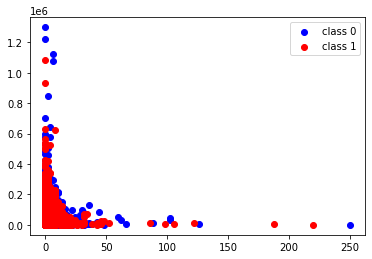

5 vs 19


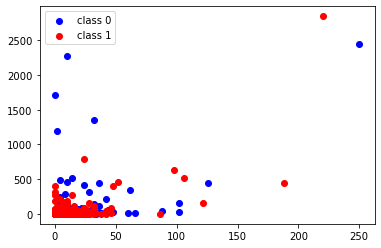

5 vs 20


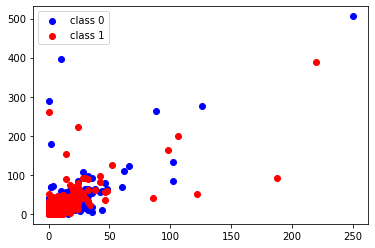

5 vs 21


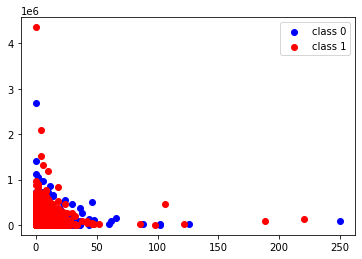

5 vs 22


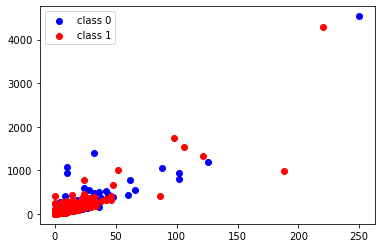

5 vs 23


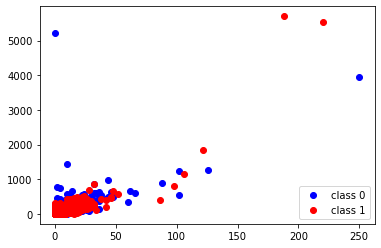

5 vs 24


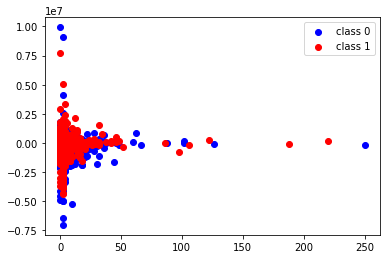

5 vs 25


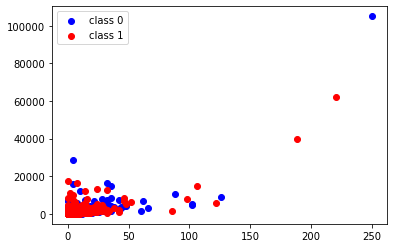

5 vs 26


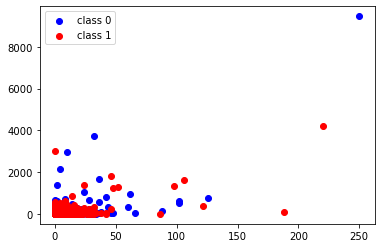

5 vs 27


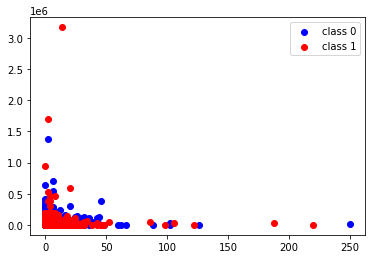

5 vs 28


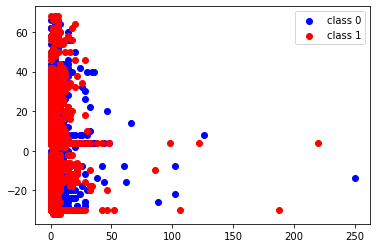

5 vs 29


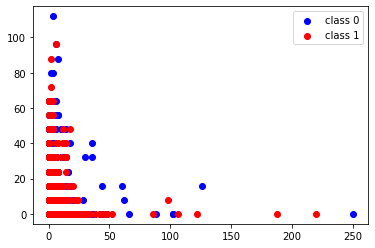

5 vs 30


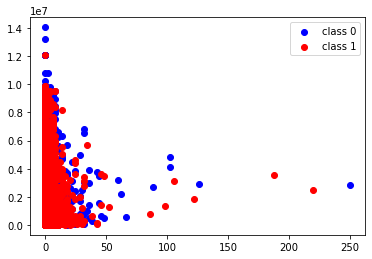

5 vs 31


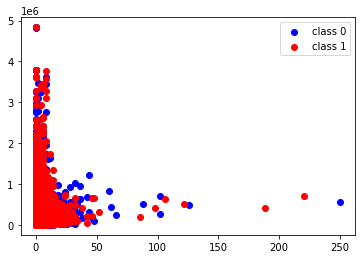

5 vs 32


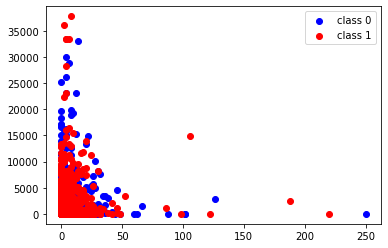

5 vs 33


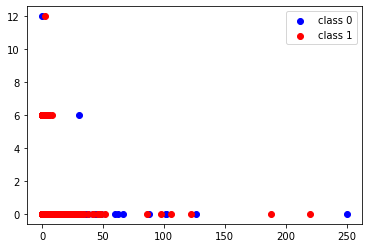

5 vs 34


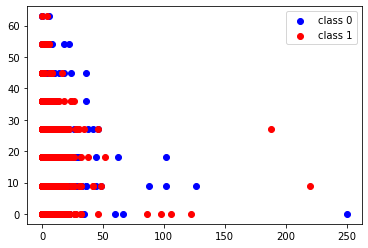

5 vs 35


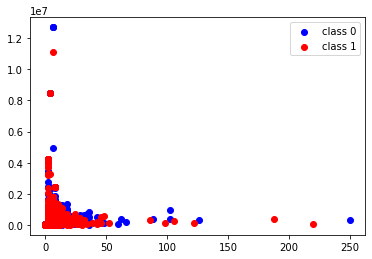

5 vs 36


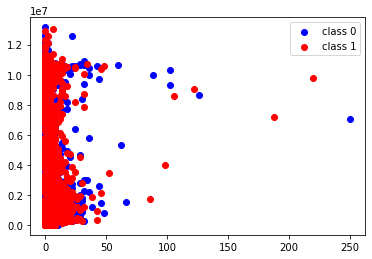

5 vs 37


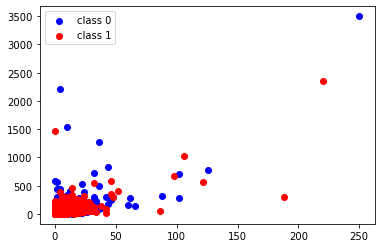

5 vs 38


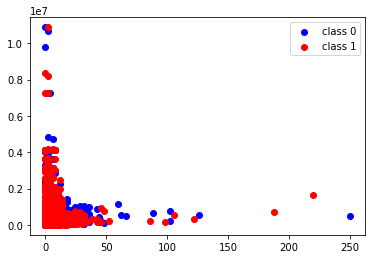

5 vs 39


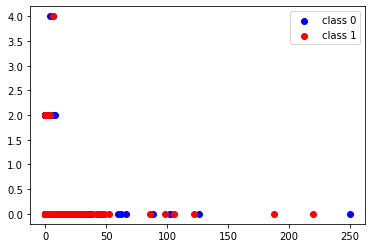

5 vs 40


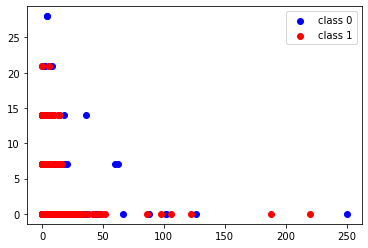

6 vs 7


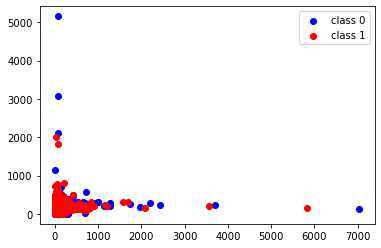

6 vs 8


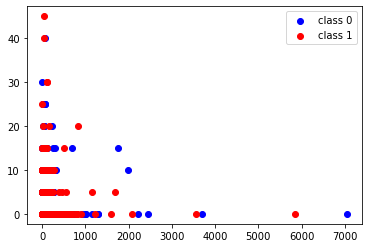

6 vs 9


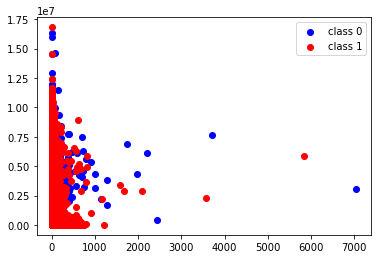

6 vs 10


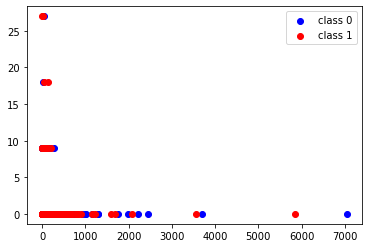

6 vs 11


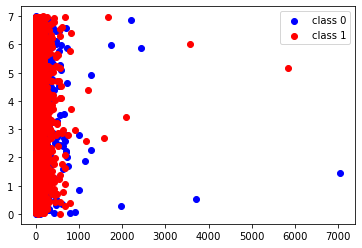

6 vs 12


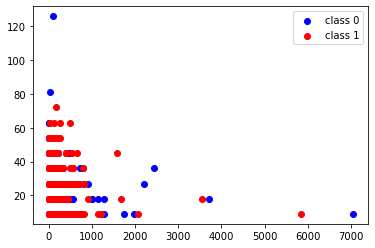

6 vs 13


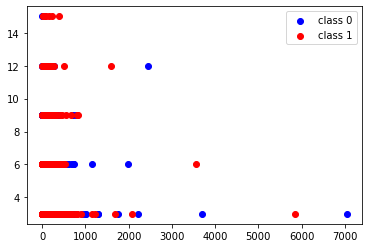

6 vs 14


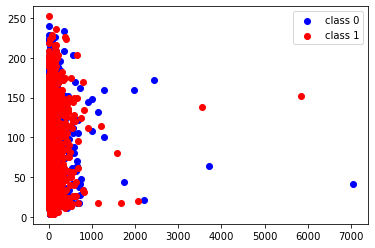

6 vs 15


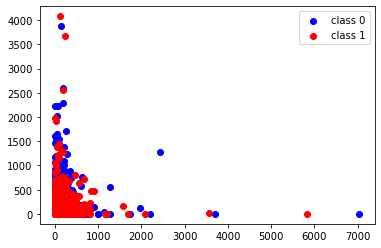

6 vs 16


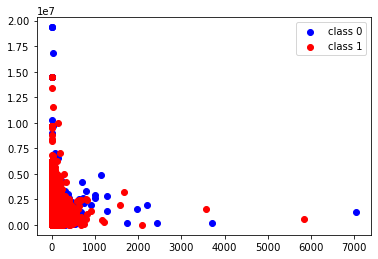

6 vs 17


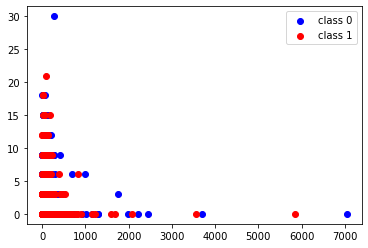

6 vs 18


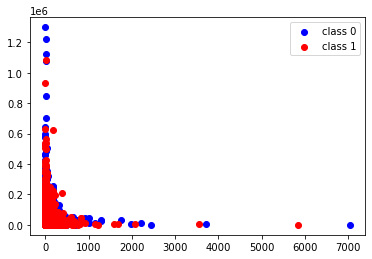

6 vs 19


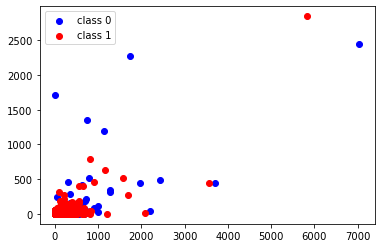

6 vs 20


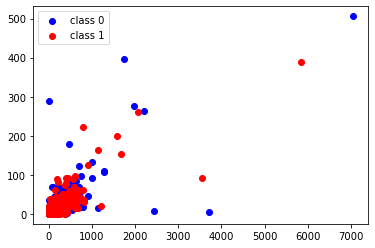

6 vs 21


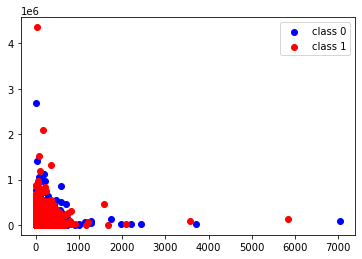

6 vs 22


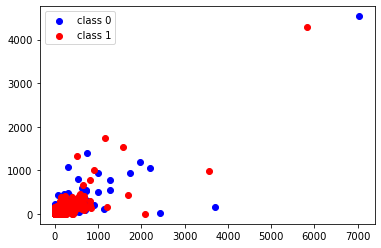

6 vs 23


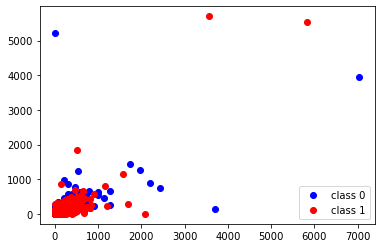

6 vs 24


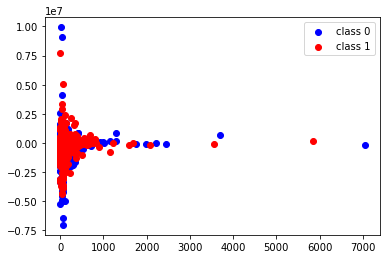

6 vs 25


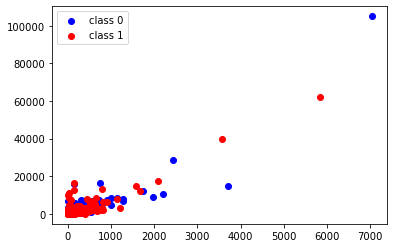

6 vs 26


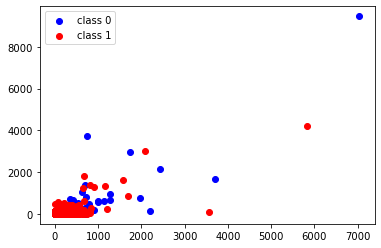

6 vs 27


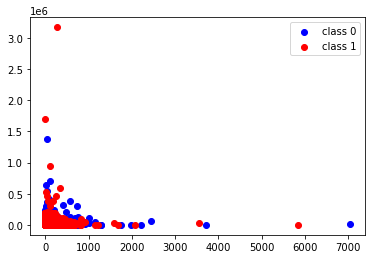

6 vs 28


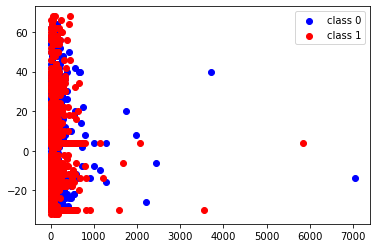

6 vs 29


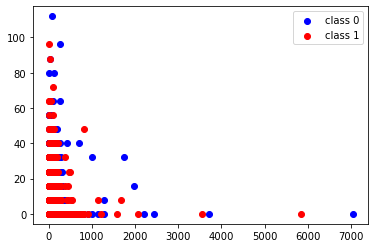

6 vs 30


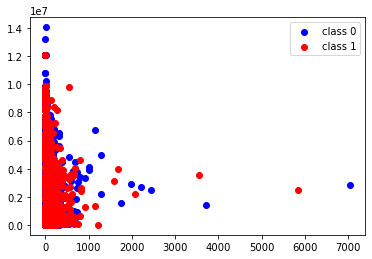

6 vs 31


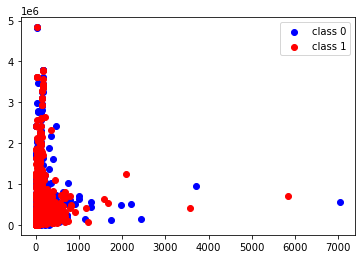

6 vs 32


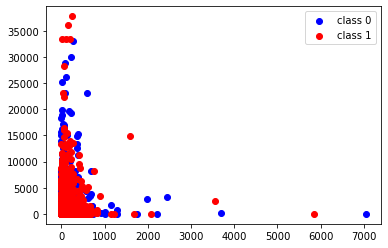

6 vs 33


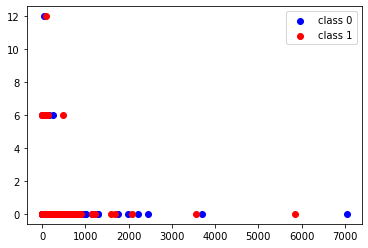

6 vs 34


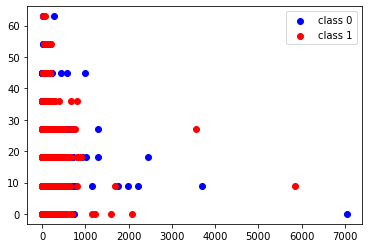

6 vs 35


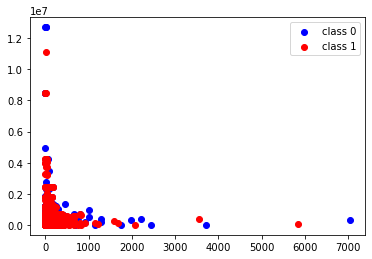

6 vs 36


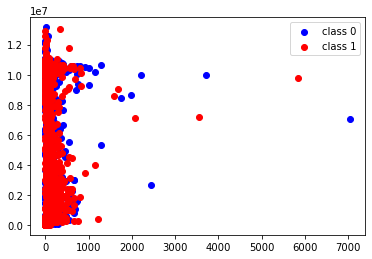

6 vs 37


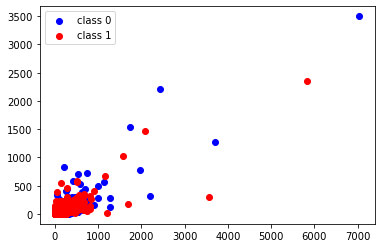

6 vs 38


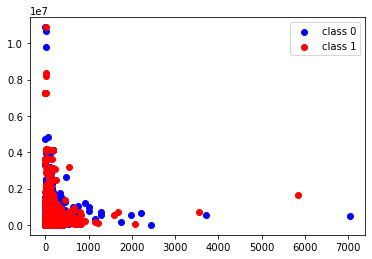

6 vs 39


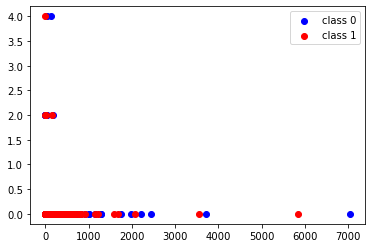

6 vs 40


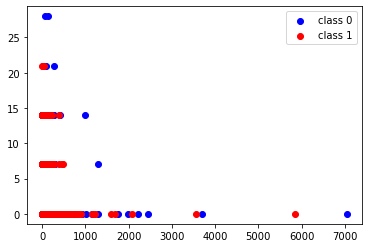

7 vs 8


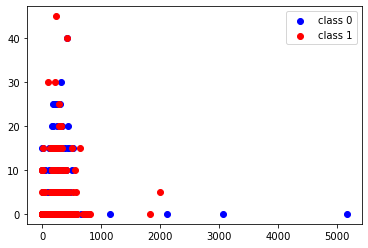

7 vs 9


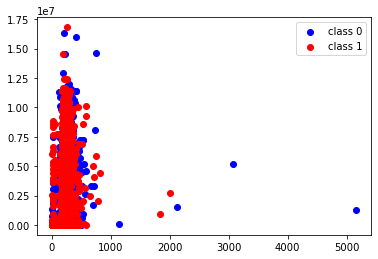

7 vs 10


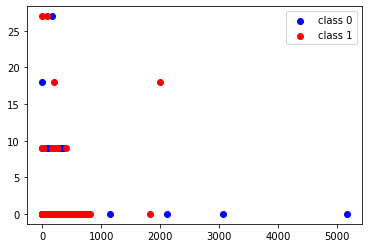

7 vs 11


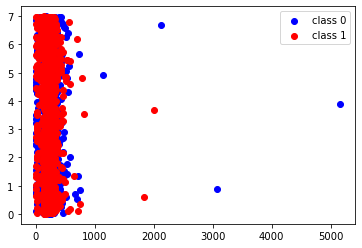

7 vs 12


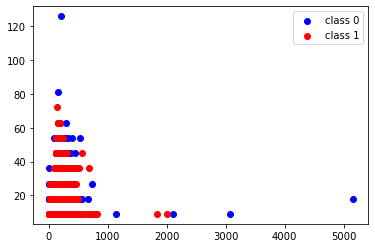

7 vs 13


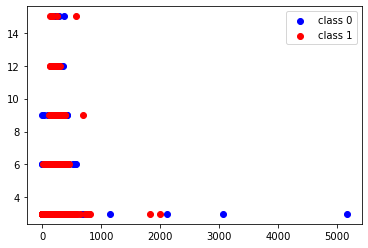

7 vs 14


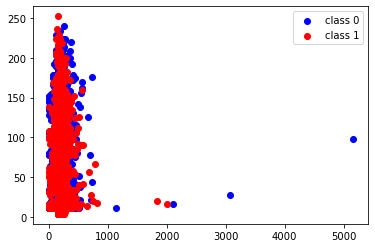

7 vs 15


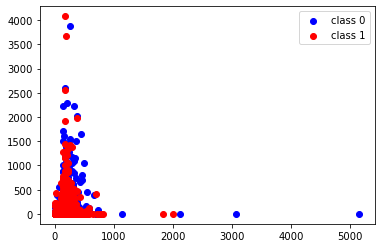

7 vs 16


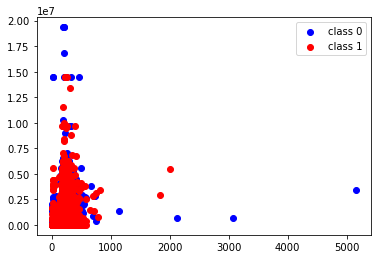

7 vs 17


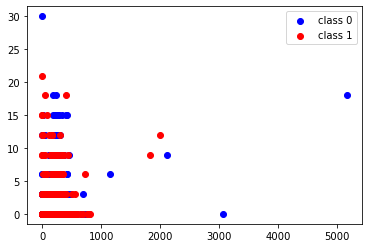

7 vs 18


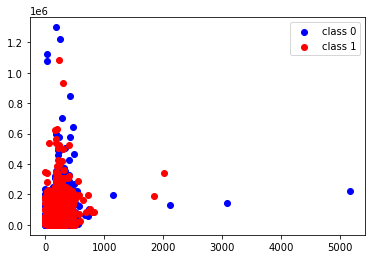

7 vs 19


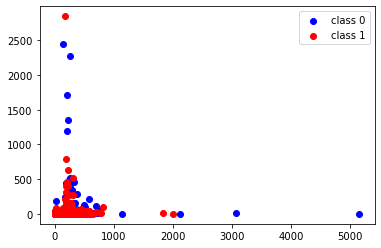

7 vs 20


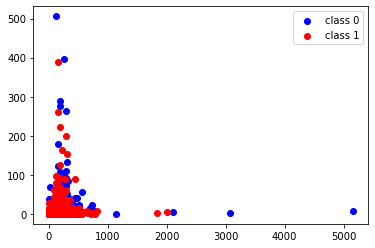

7 vs 21


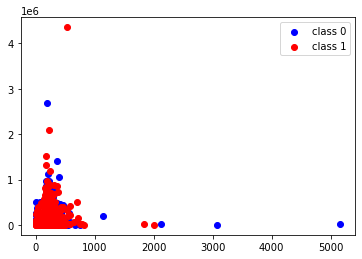

7 vs 22


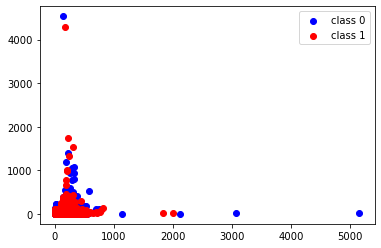

7 vs 23


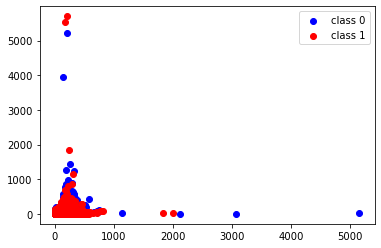

7 vs 24


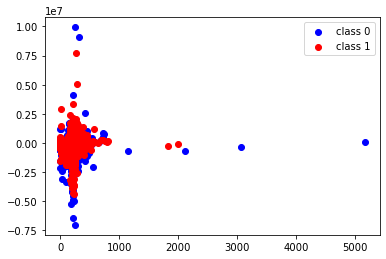

7 vs 25


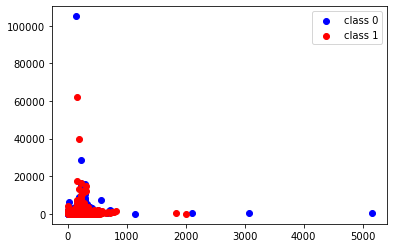

7 vs 26


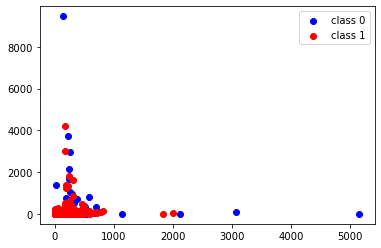

7 vs 27


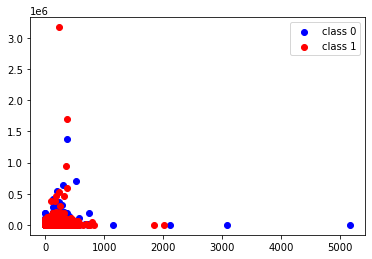

7 vs 28


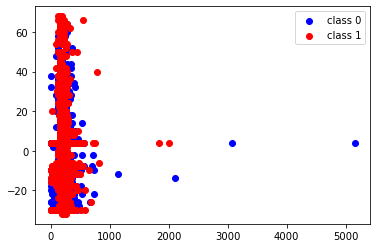

7 vs 29


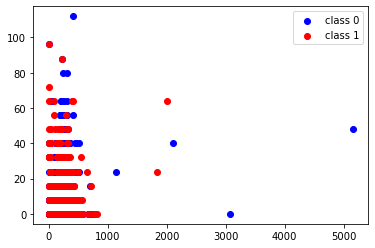

7 vs 30


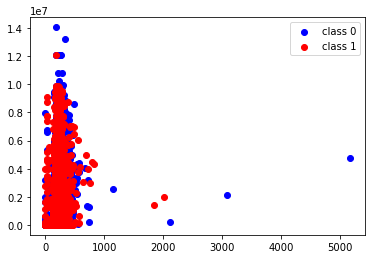

7 vs 31


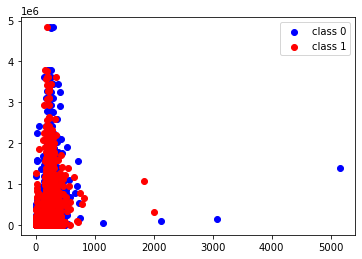

7 vs 32


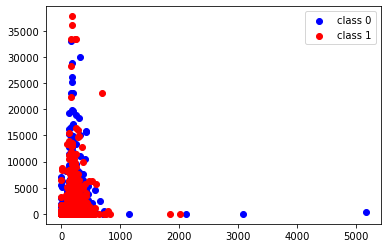

7 vs 33


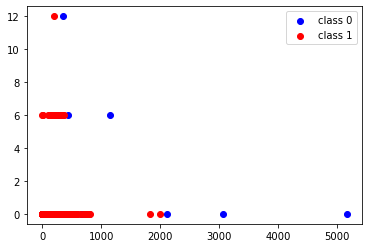

7 vs 34


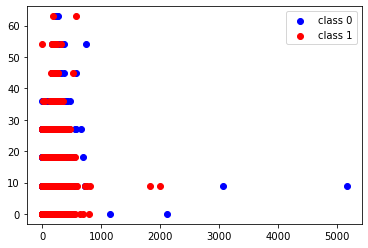

7 vs 35


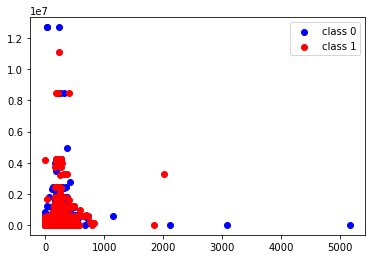

7 vs 36


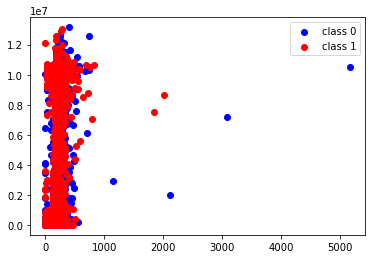

7 vs 37


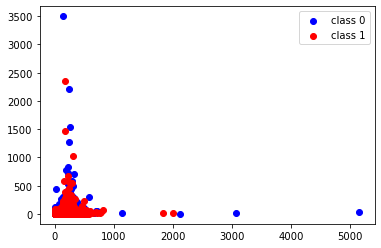

7 vs 38


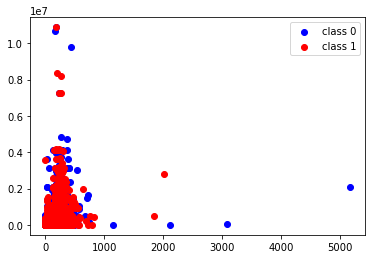

7 vs 39


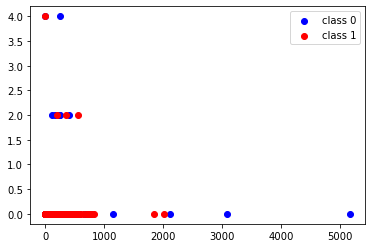

7 vs 40


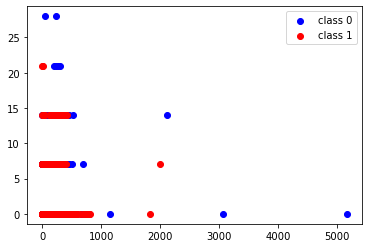

8 vs 9


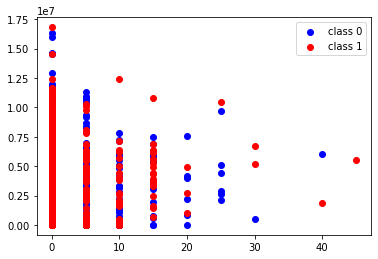

8 vs 10


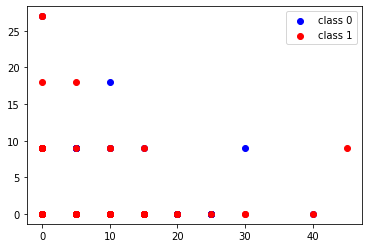

8 vs 11


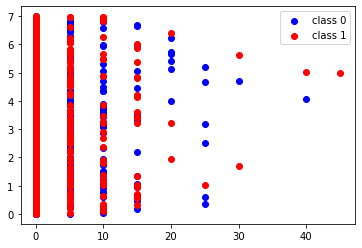

8 vs 12


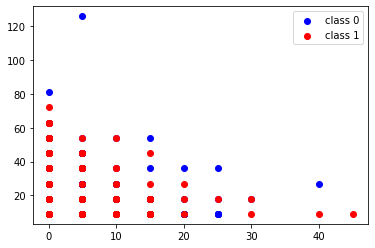

8 vs 13


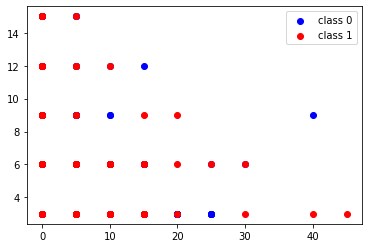

8 vs 14


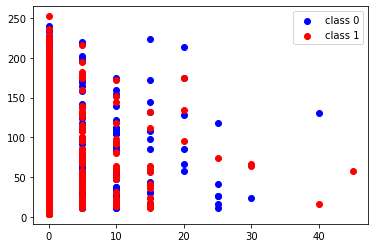

8 vs 15


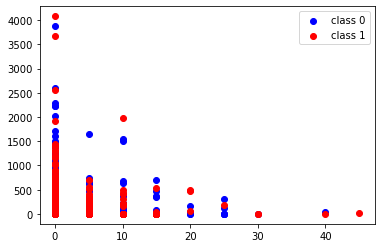

8 vs 16


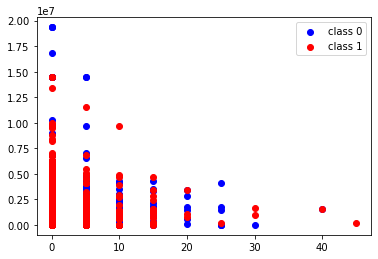

8 vs 17


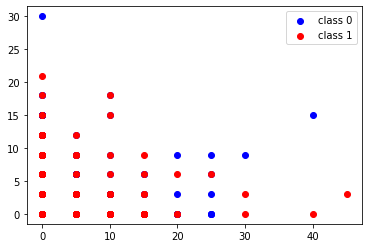

8 vs 18


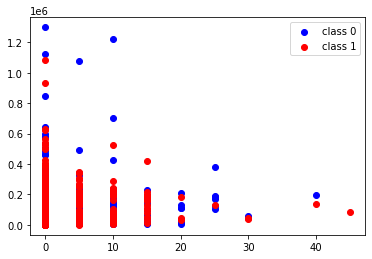

8 vs 19


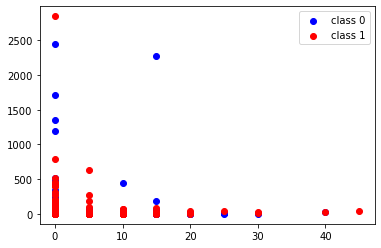

8 vs 20


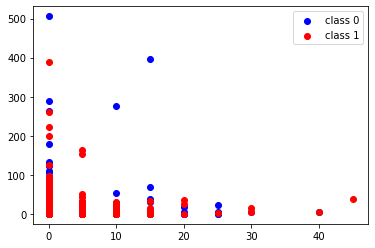

8 vs 21


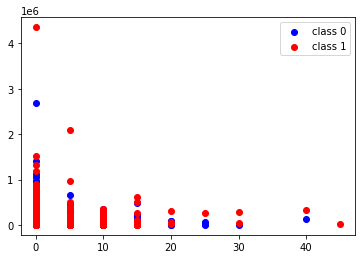

8 vs 22


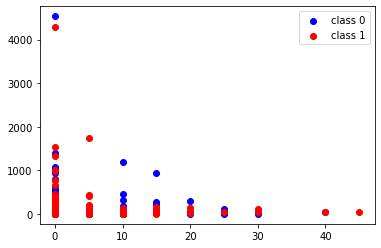

8 vs 23


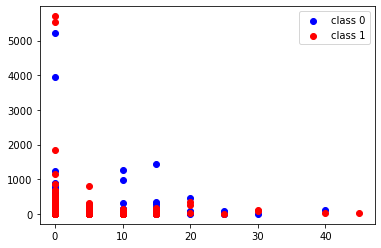

8 vs 24


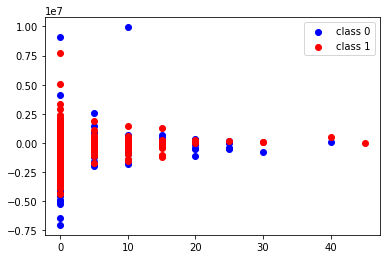

8 vs 25


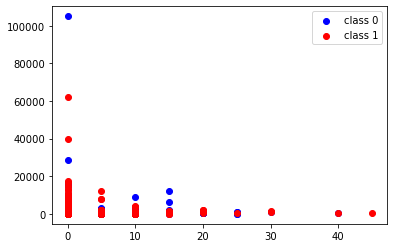

8 vs 26


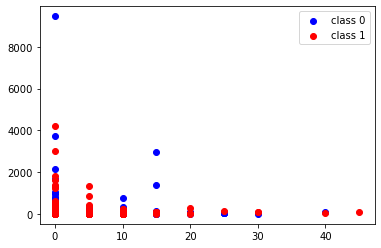

8 vs 27


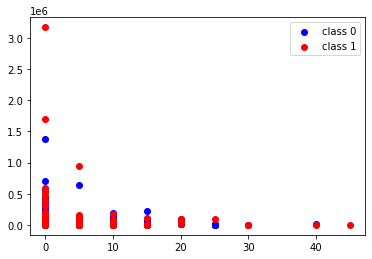

8 vs 28


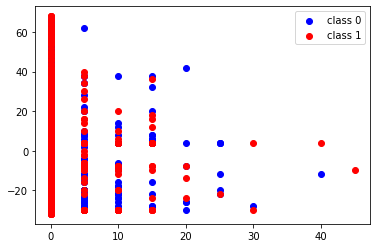

8 vs 29


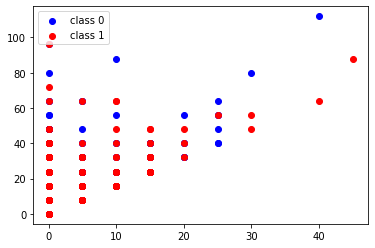

8 vs 30


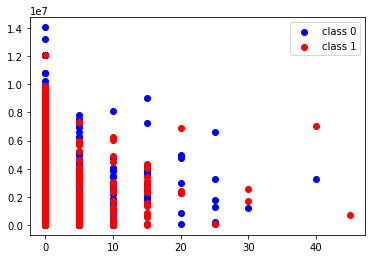

8 vs 31


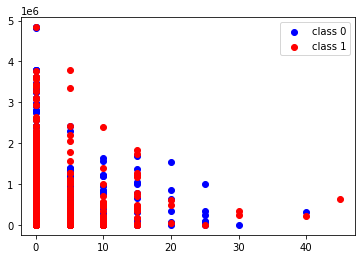

8 vs 32


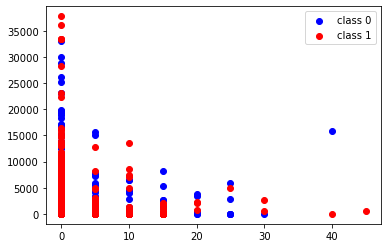

8 vs 33


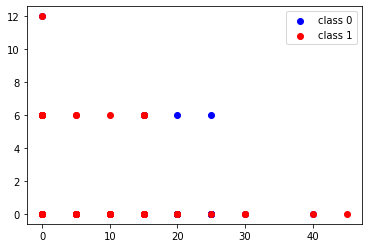

8 vs 34


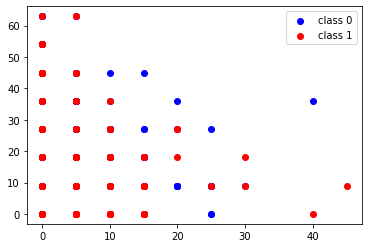

8 vs 35


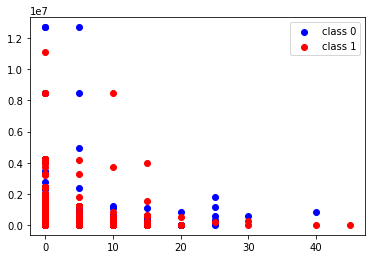

8 vs 36


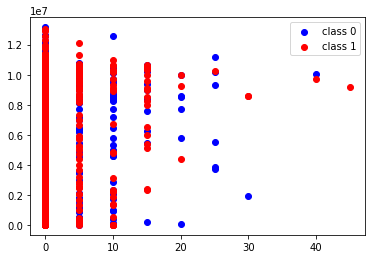

8 vs 37


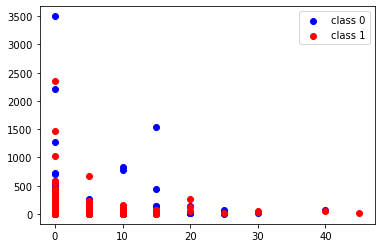

8 vs 38


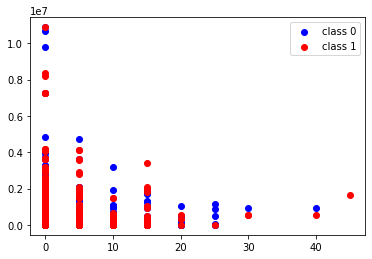

8 vs 39


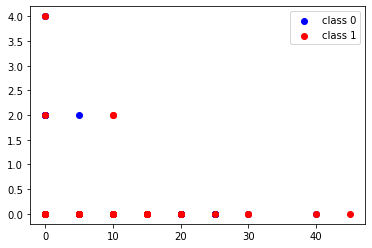

8 vs 40


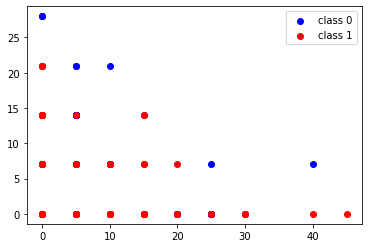

9 vs 10


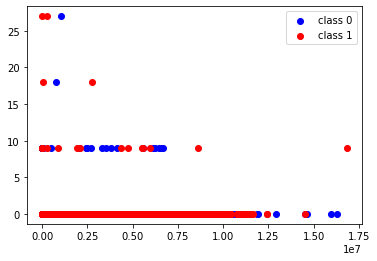

9 vs 11


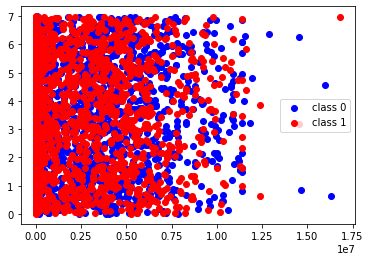

9 vs 12


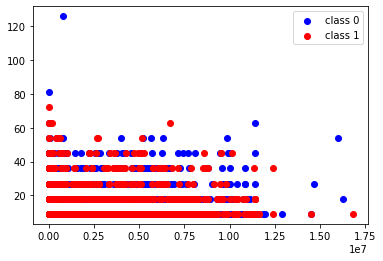

9 vs 13


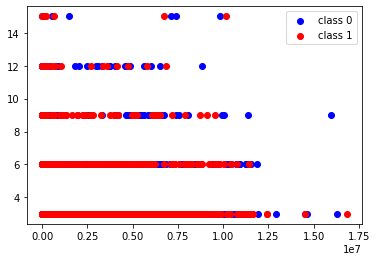

9 vs 14


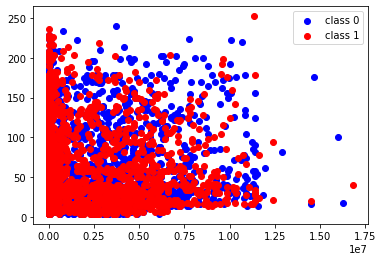

9 vs 15


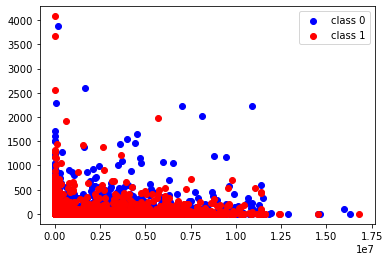

9 vs 16


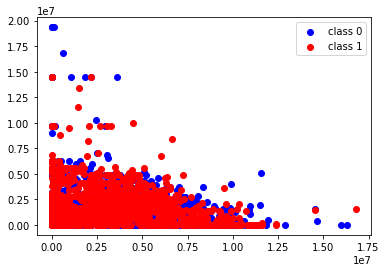

9 vs 17


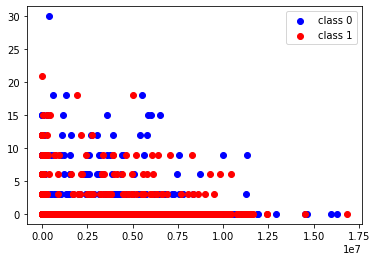

9 vs 18


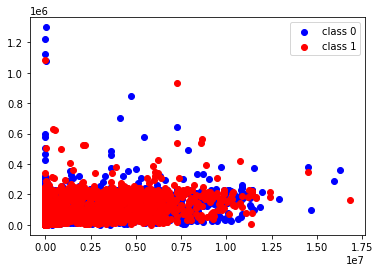

9 vs 19


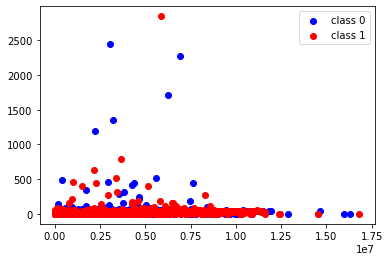

9 vs 20


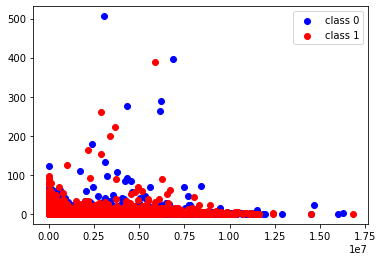

9 vs 21


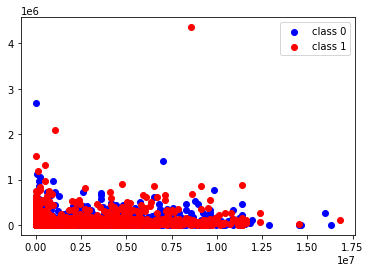

9 vs 22


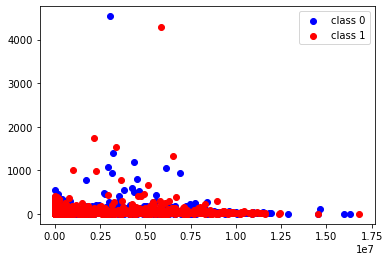

9 vs 23


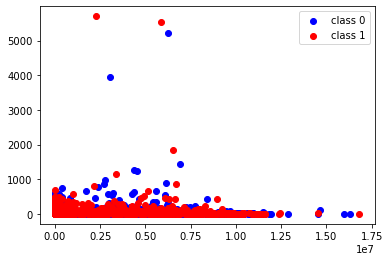

9 vs 24


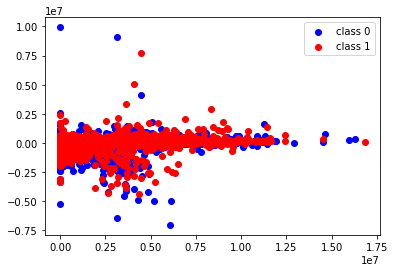

9 vs 25


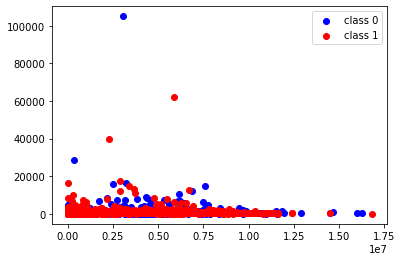

9 vs 26


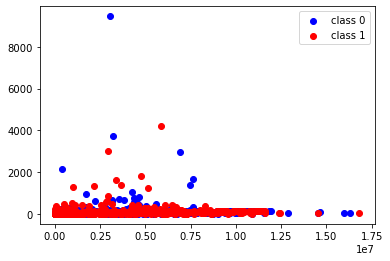

9 vs 27


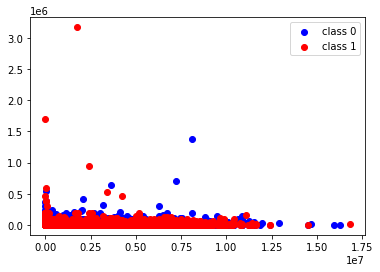

9 vs 28


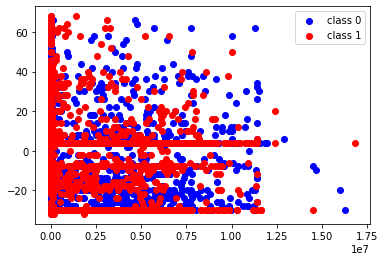

9 vs 29


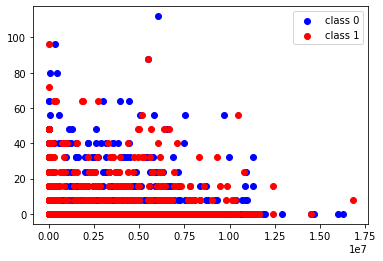

9 vs 30


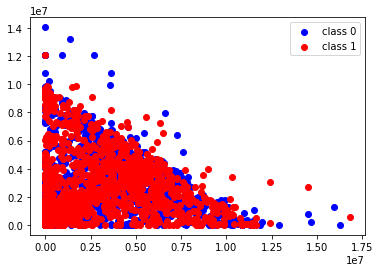

9 vs 31


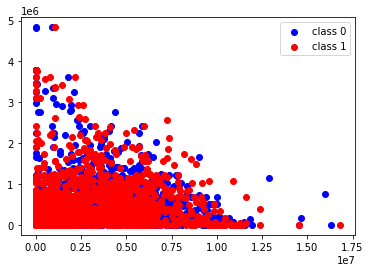

9 vs 32


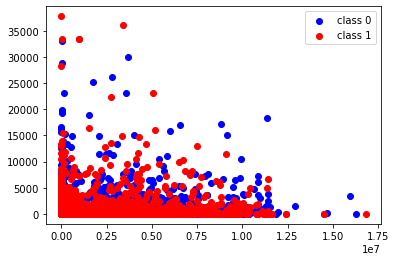

9 vs 33


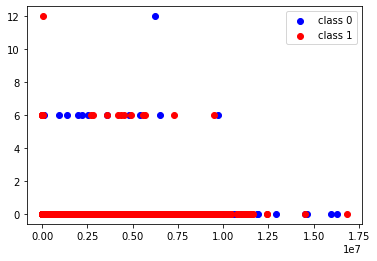

9 vs 34


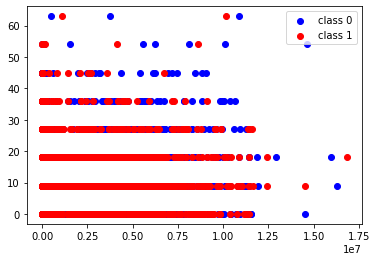

9 vs 35


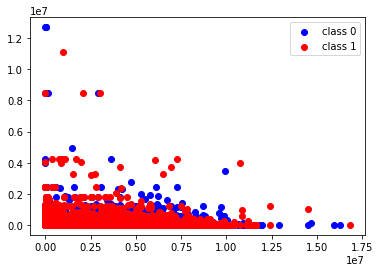

9 vs 36


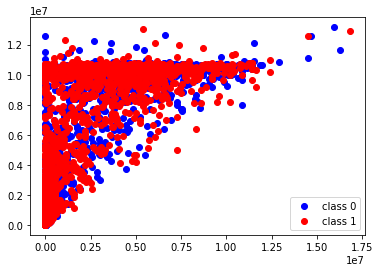

9 vs 37


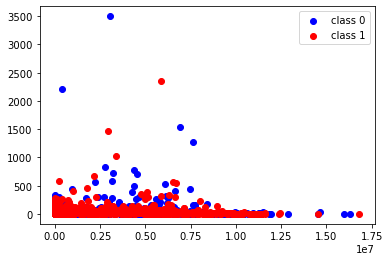

9 vs 38


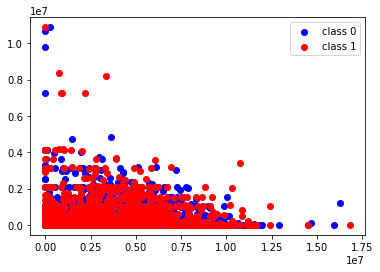

9 vs 39


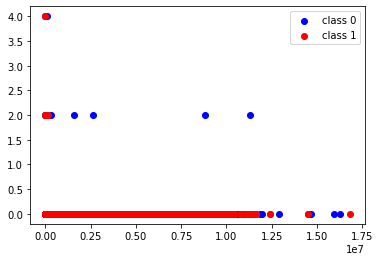

9 vs 40


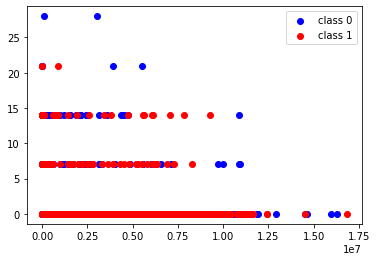

10 vs 11


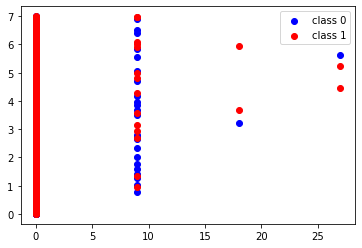

10 vs 12


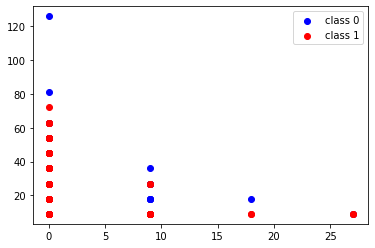

10 vs 13


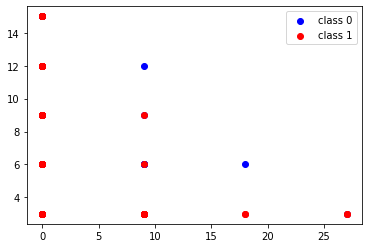

10 vs 14


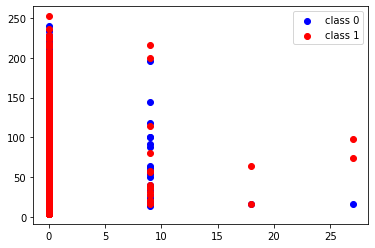

10 vs 15


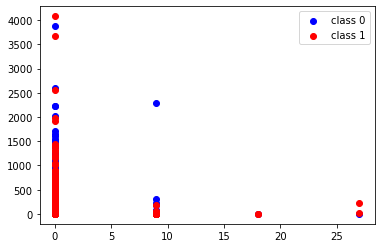

10 vs 16


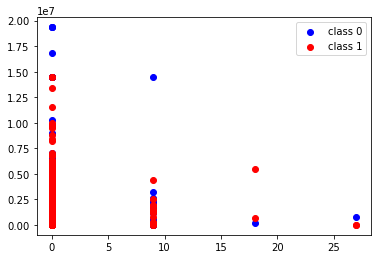

10 vs 17


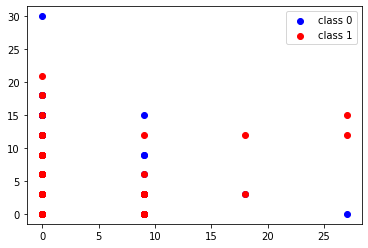

10 vs 18


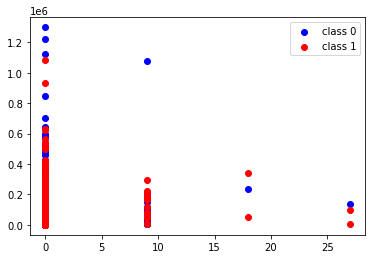

10 vs 19


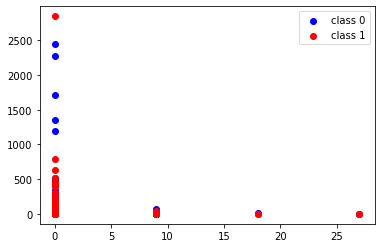

10 vs 20


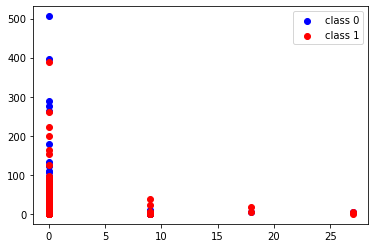

10 vs 21


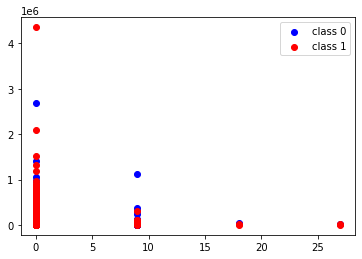

10 vs 22


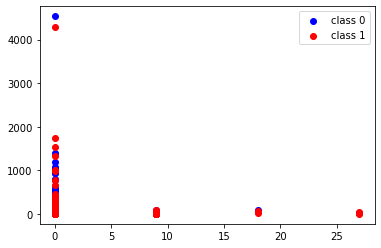

10 vs 23


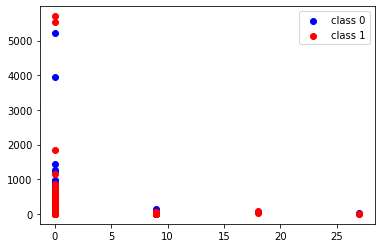

10 vs 24


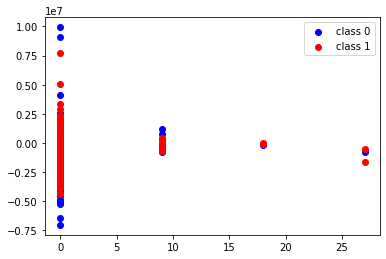

10 vs 25


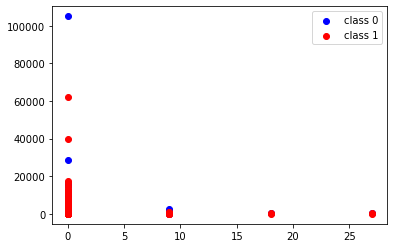

10 vs 26


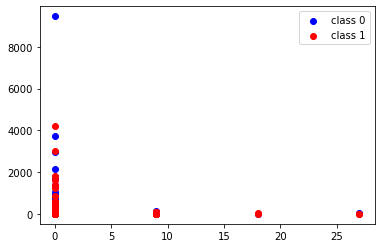

10 vs 27


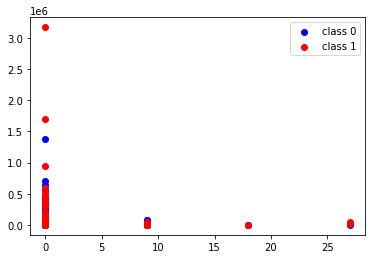

10 vs 28


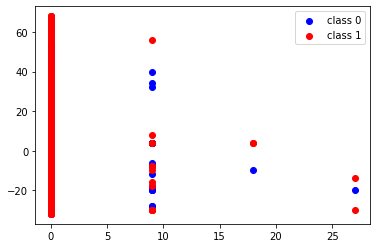

10 vs 29


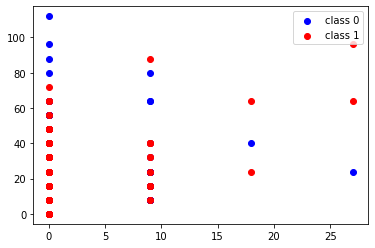

10 vs 30


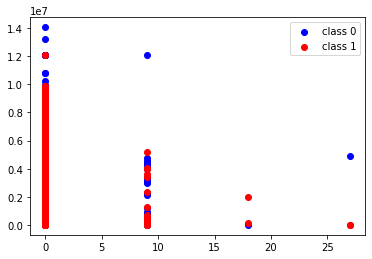

10 vs 31


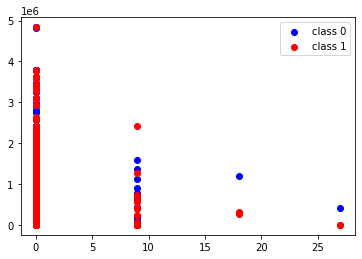

10 vs 32


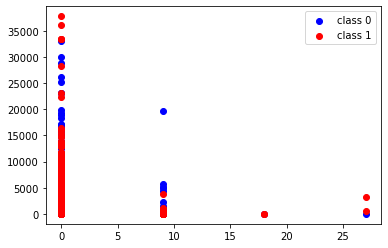

10 vs 33


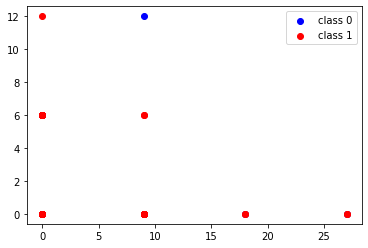

10 vs 34


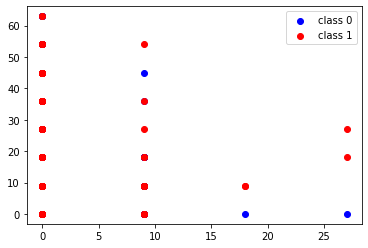

10 vs 35


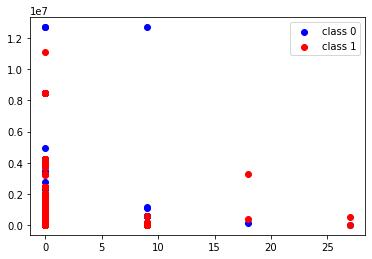

10 vs 36


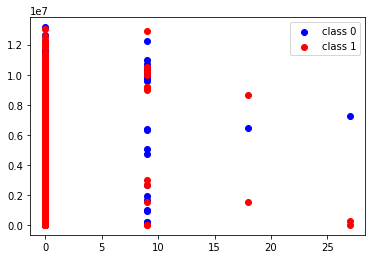

10 vs 37


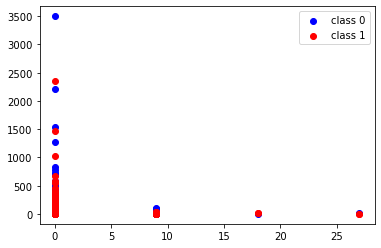

10 vs 38


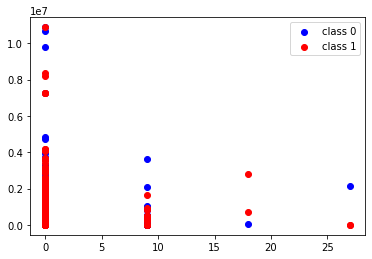

10 vs 39


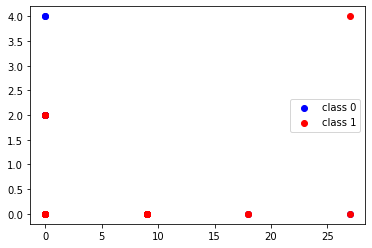

10 vs 40


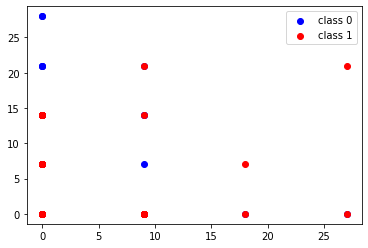

11 vs 12


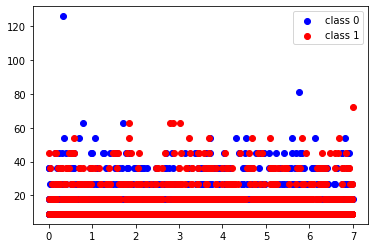

11 vs 13


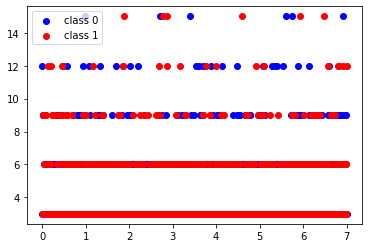

11 vs 14


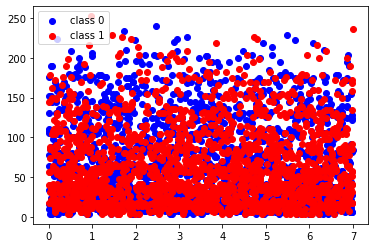

11 vs 15


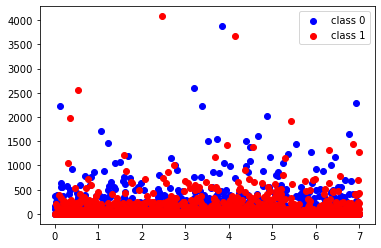

11 vs 16


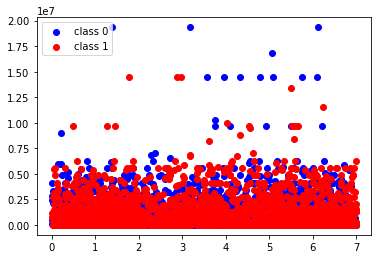

11 vs 17


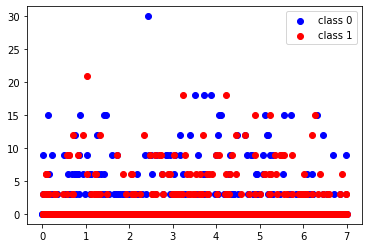

11 vs 18


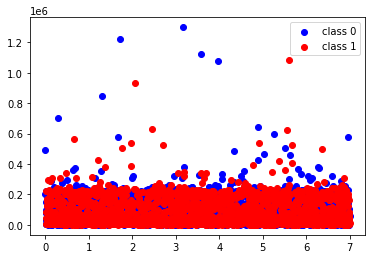

11 vs 19


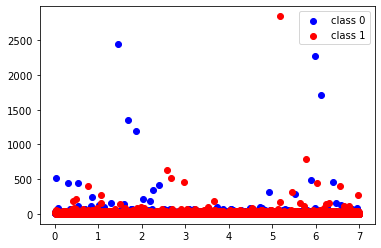

11 vs 20


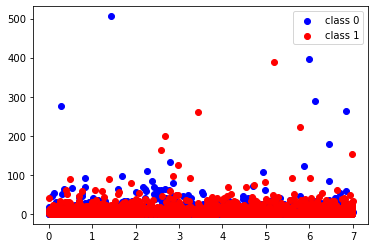

11 vs 21


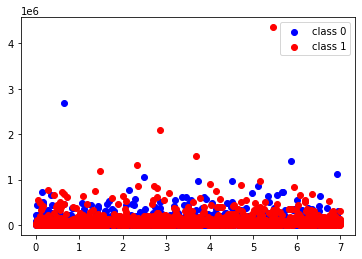

11 vs 22


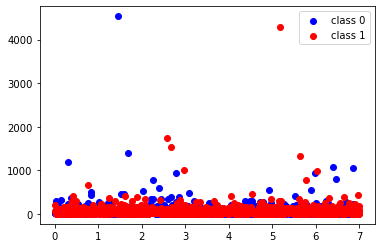

11 vs 23


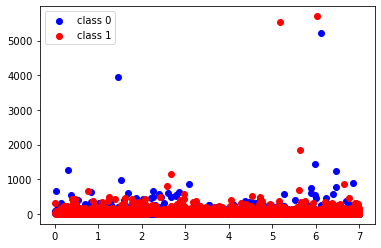

11 vs 24


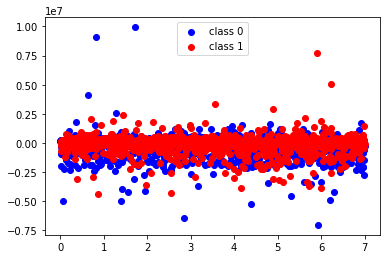

11 vs 25


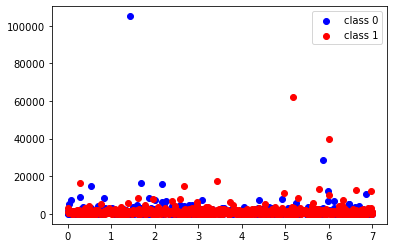

11 vs 26


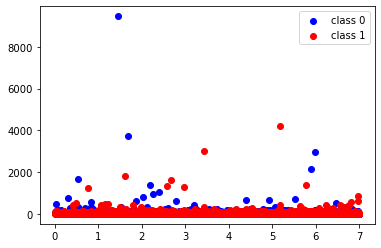

11 vs 27


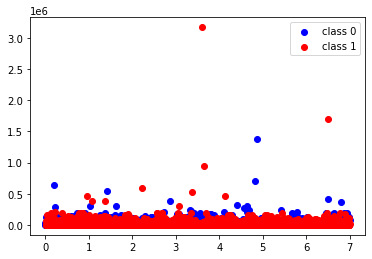

11 vs 28


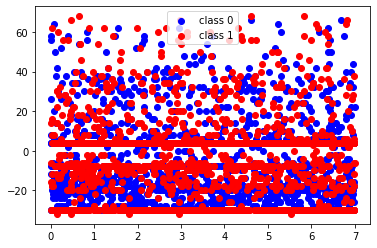

11 vs 29


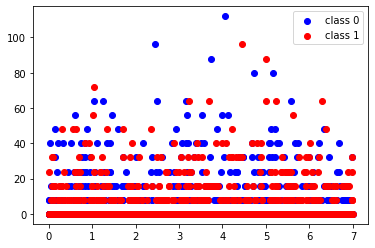

11 vs 30


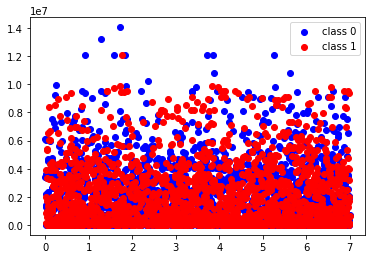

11 vs 31


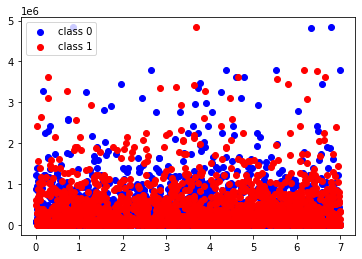

11 vs 32


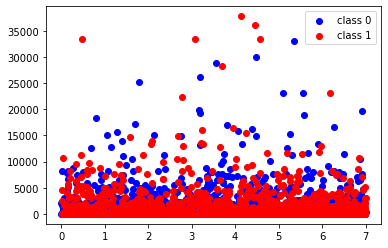

11 vs 33


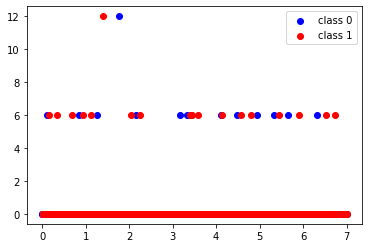

11 vs 34


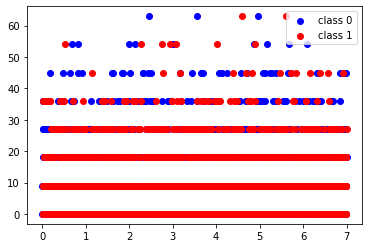

11 vs 35


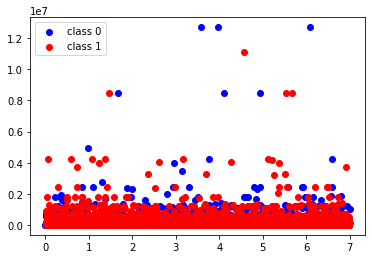

11 vs 36


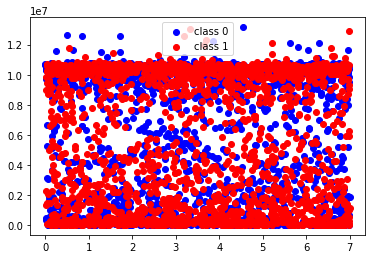

11 vs 37


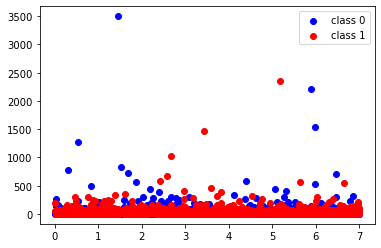

11 vs 38


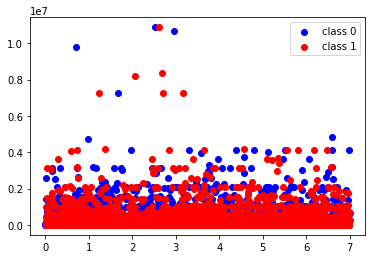

11 vs 39


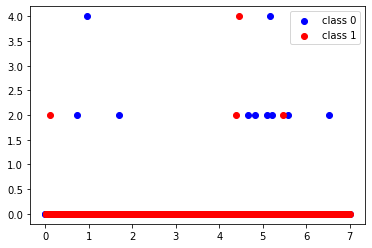

11 vs 40


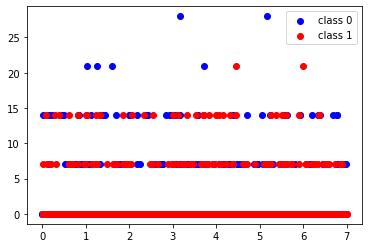

12 vs 13


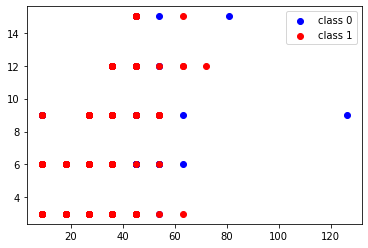

12 vs 14


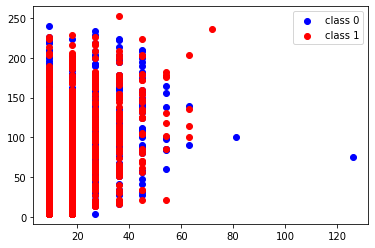

12 vs 15


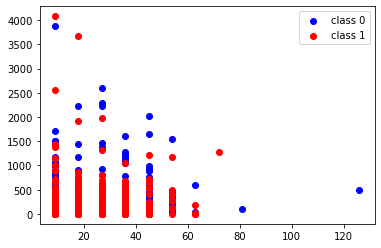

12 vs 16


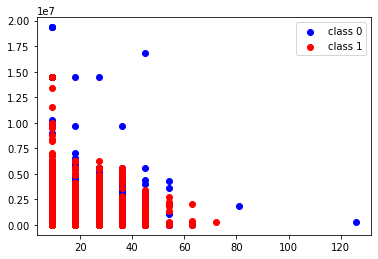

12 vs 17


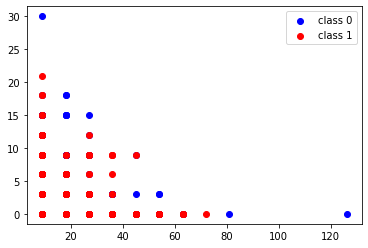

12 vs 18


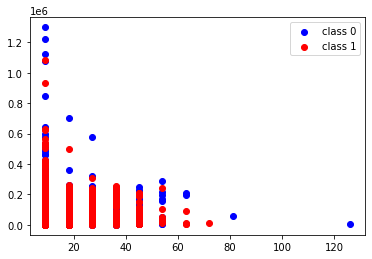

12 vs 19


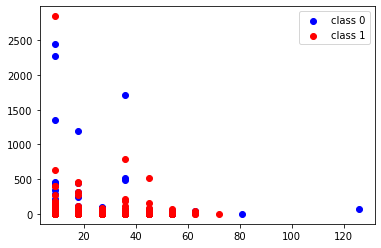

12 vs 20


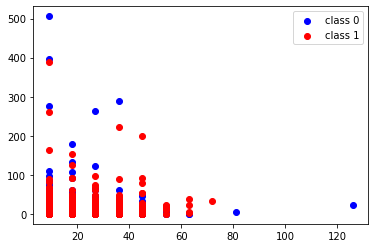

12 vs 21


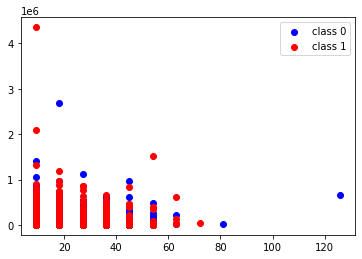

12 vs 22


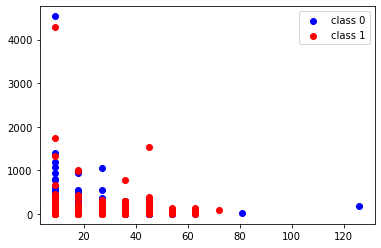

12 vs 23


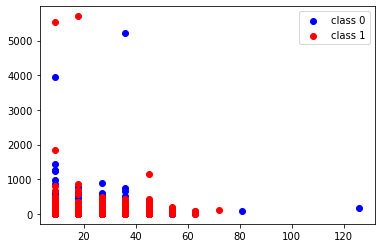

12 vs 24


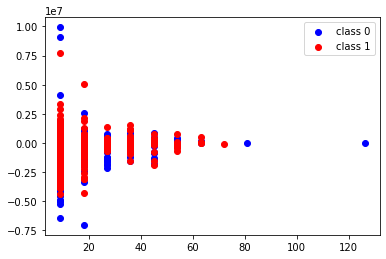

12 vs 25


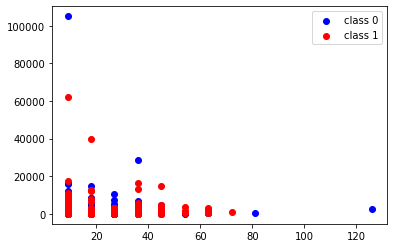

12 vs 26


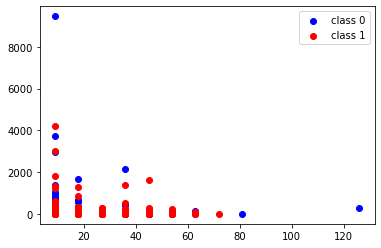

12 vs 27


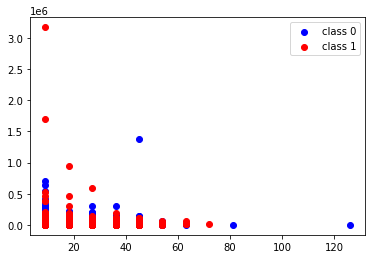

12 vs 28


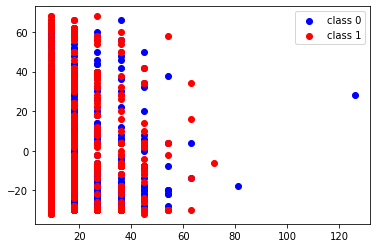

12 vs 29


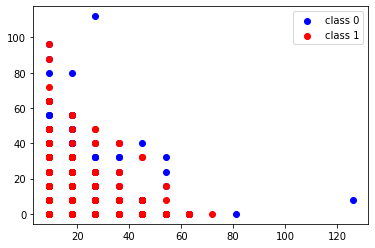

12 vs 30


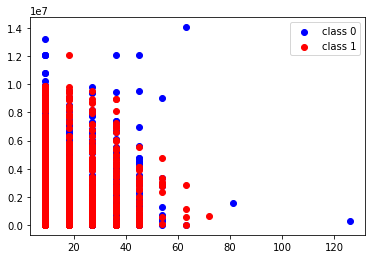

12 vs 31


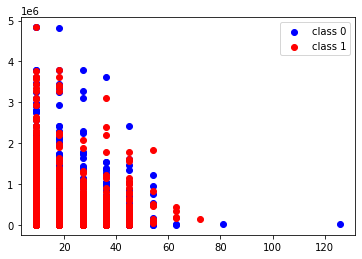

12 vs 32


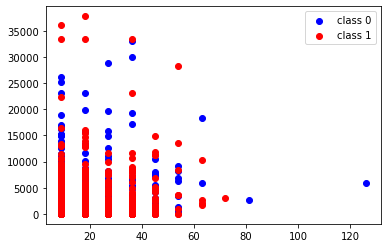

12 vs 33


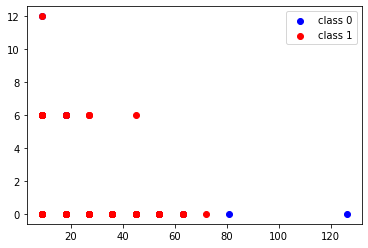

12 vs 34


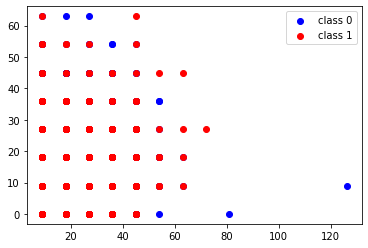

12 vs 35


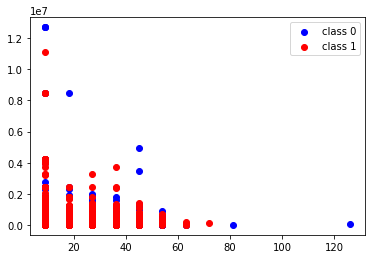

12 vs 36


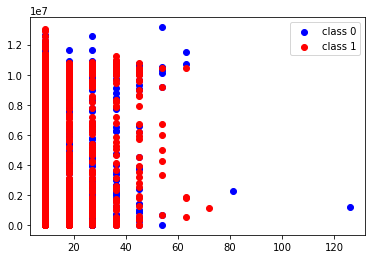

12 vs 37


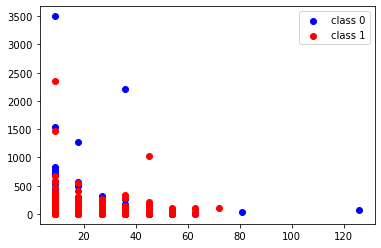

12 vs 38


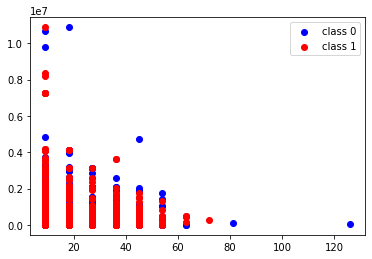

12 vs 39


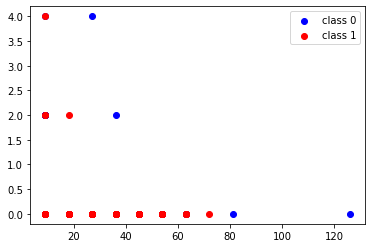

12 vs 40


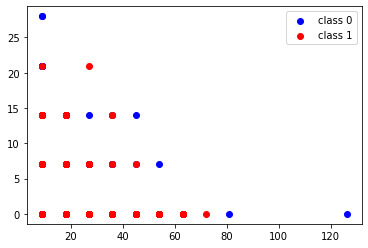

13 vs 14


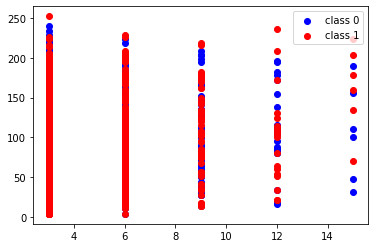

13 vs 15


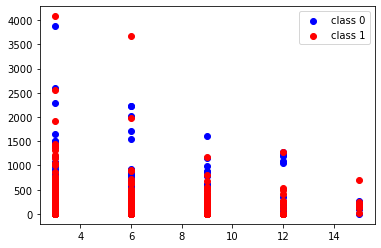

13 vs 16


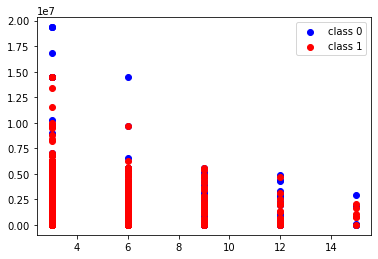

13 vs 17


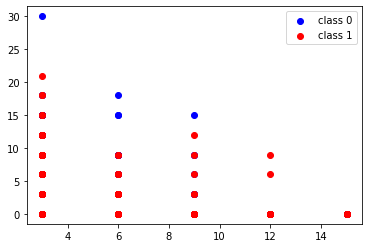

13 vs 18


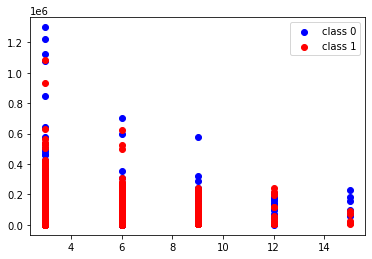

13 vs 19


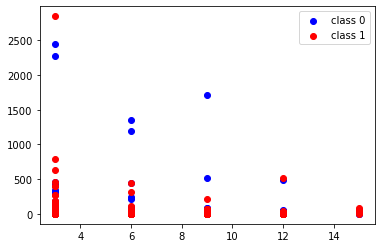

13 vs 20


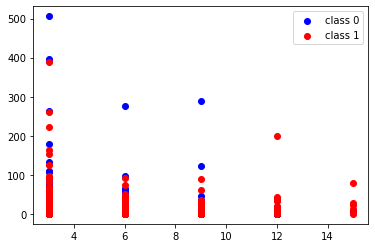

13 vs 21


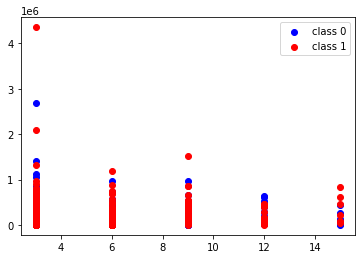

13 vs 22


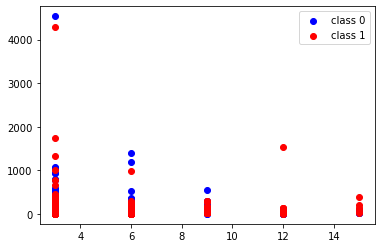

13 vs 23


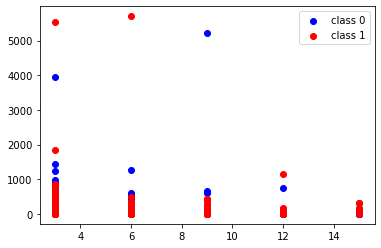

13 vs 24


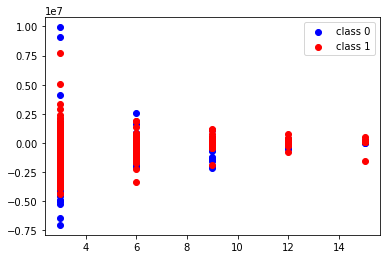

13 vs 25


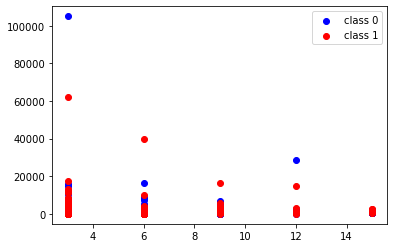

13 vs 26


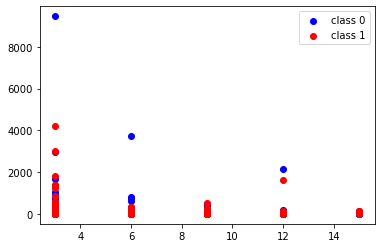

13 vs 27


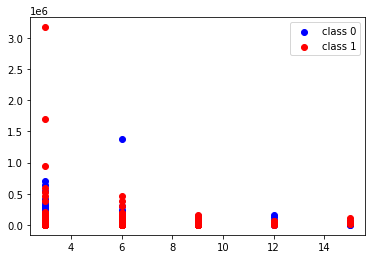

13 vs 28


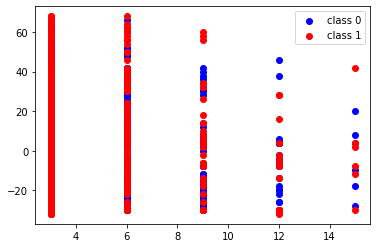

13 vs 29


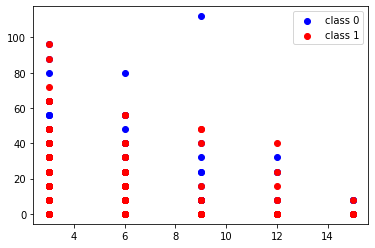

13 vs 30


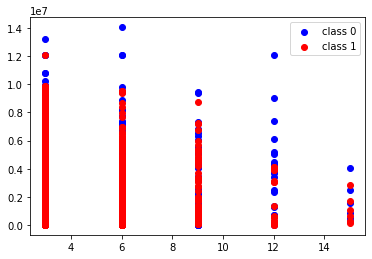

13 vs 31


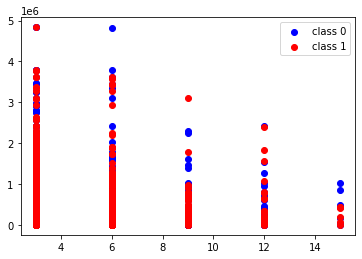

13 vs 32


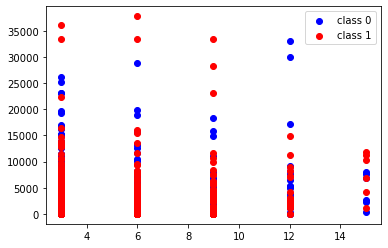

13 vs 33


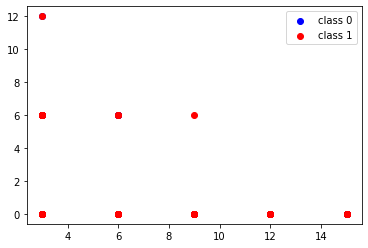

13 vs 34


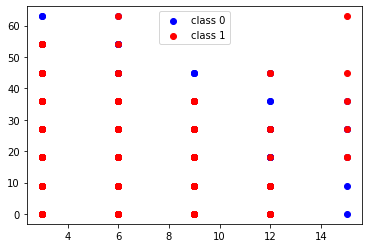

13 vs 35


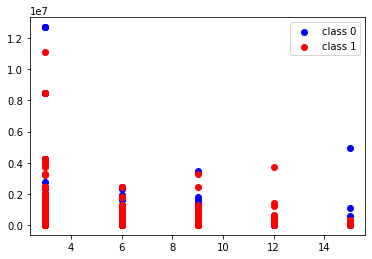

13 vs 36


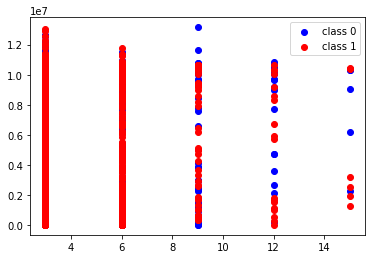

13 vs 37


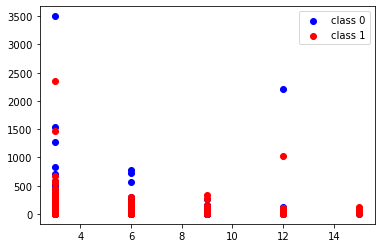

13 vs 38


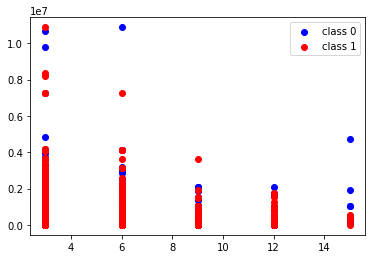

13 vs 39


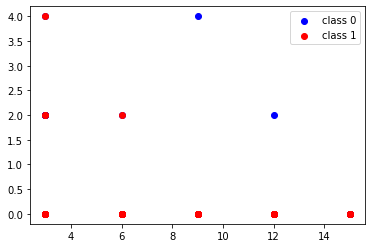

13 vs 40


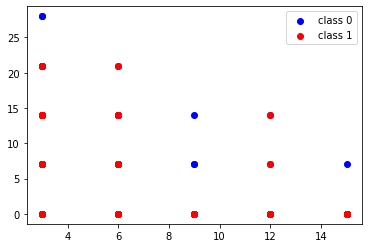

14 vs 15


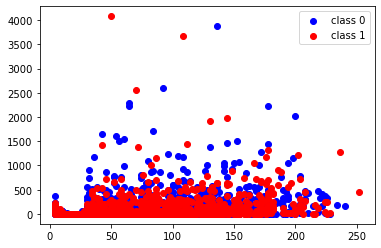

14 vs 16


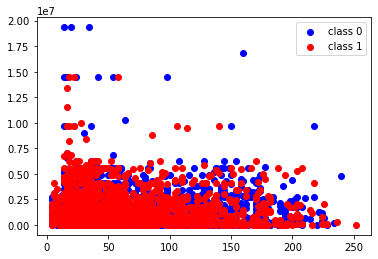

14 vs 17


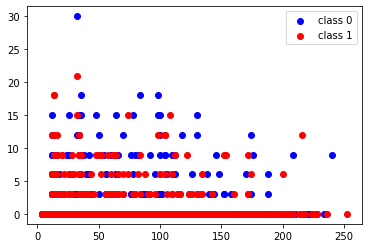

14 vs 18


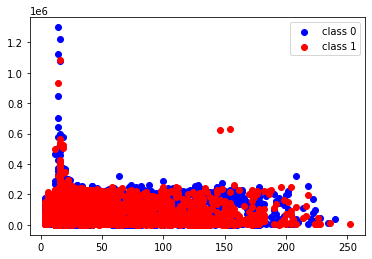

14 vs 19


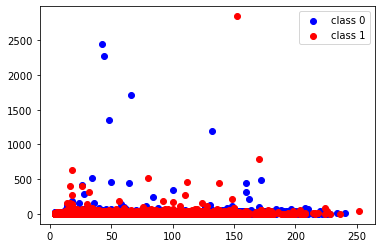

14 vs 20


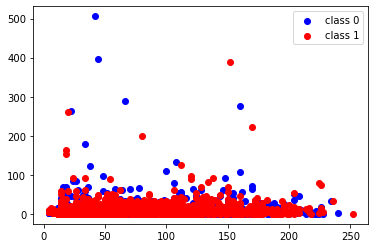

14 vs 21


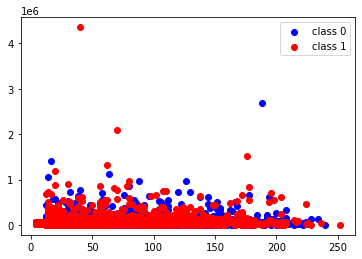

14 vs 22


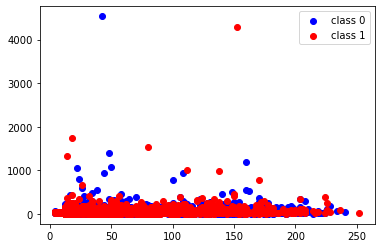

14 vs 23


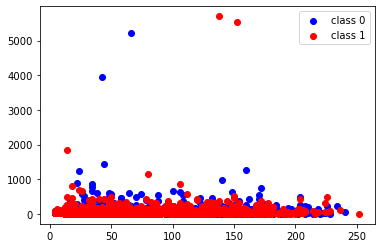

14 vs 24


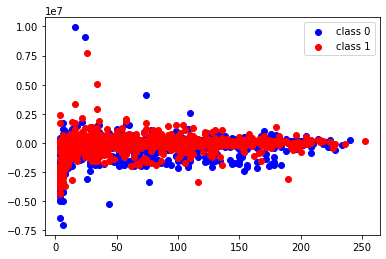

14 vs 25


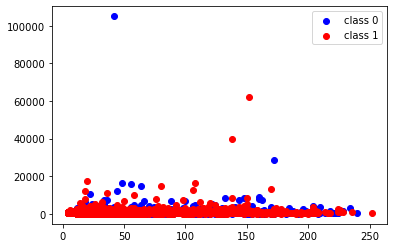

14 vs 26


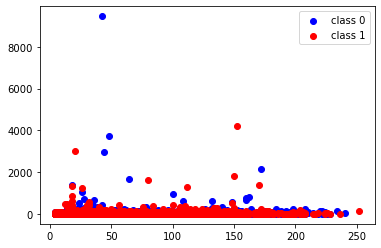

14 vs 27


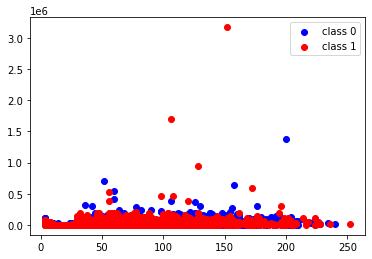

14 vs 28


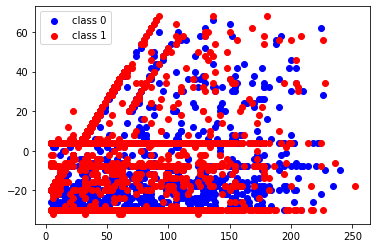

14 vs 29


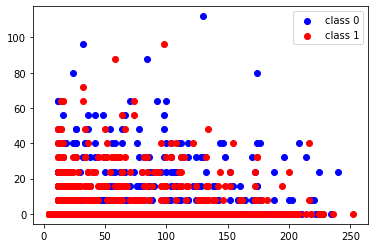

14 vs 30


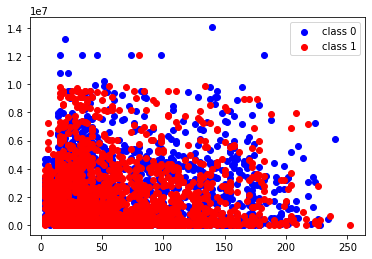

14 vs 31


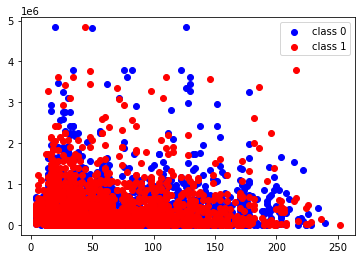

14 vs 32


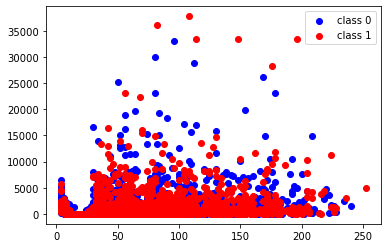

14 vs 33


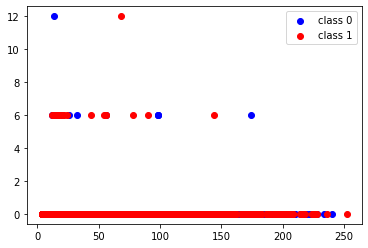

14 vs 34


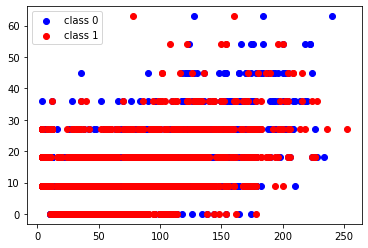

14 vs 35


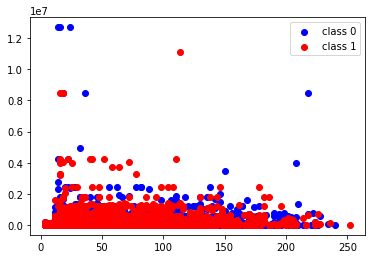

14 vs 36


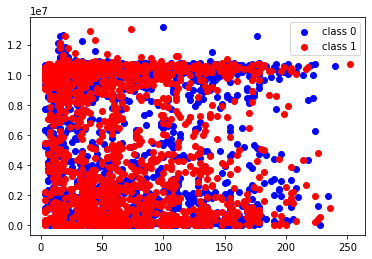

14 vs 37


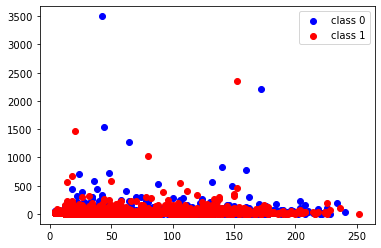

14 vs 38


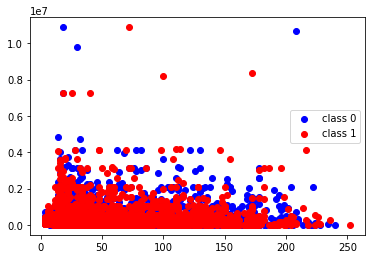

14 vs 39


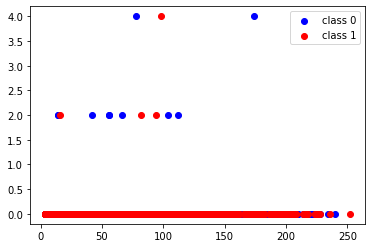

14 vs 40


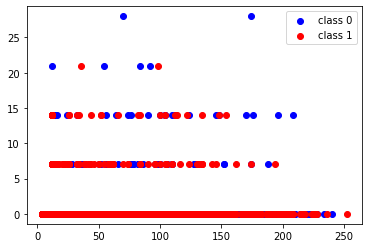

15 vs 16


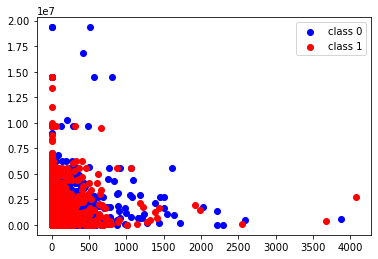

15 vs 17


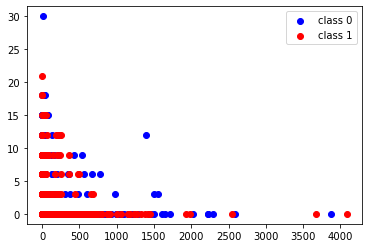

15 vs 18


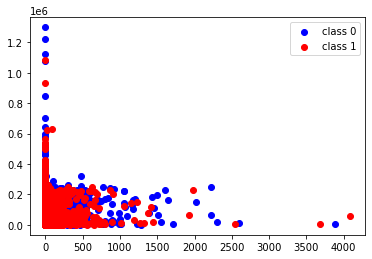

15 vs 19


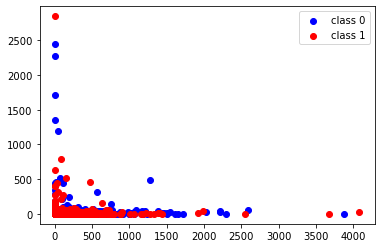

15 vs 20


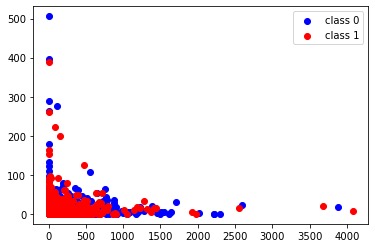

15 vs 21


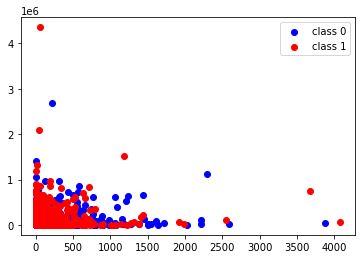

15 vs 22


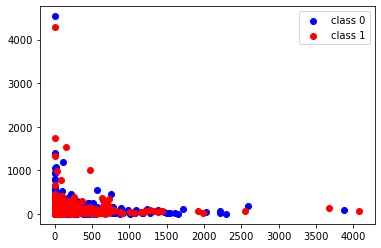

15 vs 23


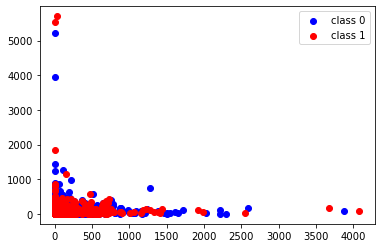

15 vs 24


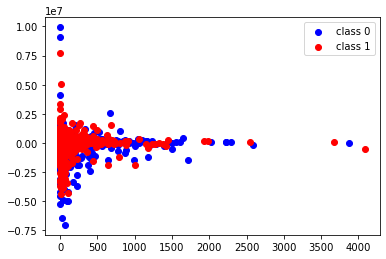

15 vs 25


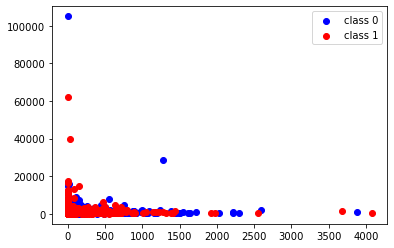

15 vs 26


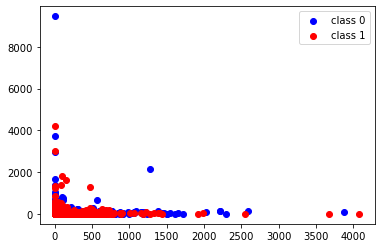

15 vs 27


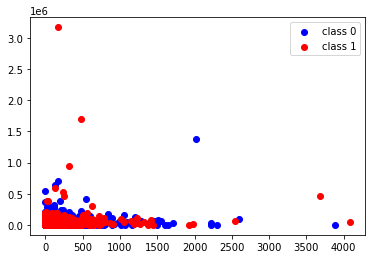

15 vs 28


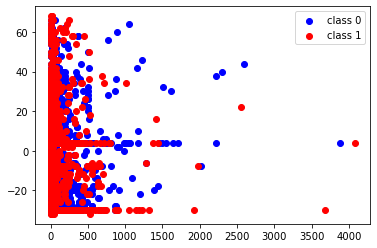

15 vs 29


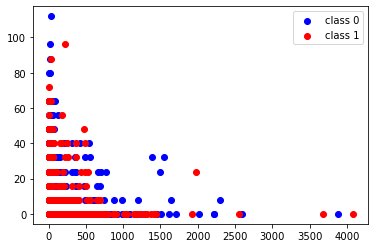

15 vs 30


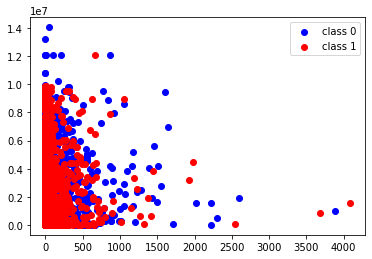

15 vs 31


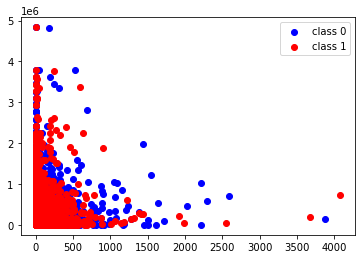

15 vs 32


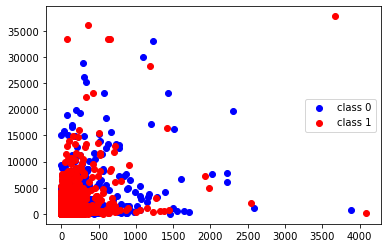

15 vs 33


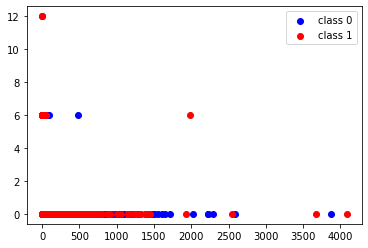

15 vs 34


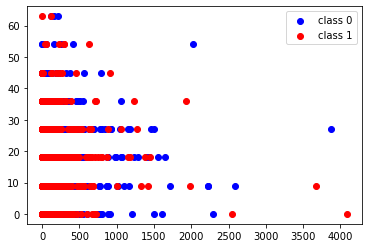

15 vs 35


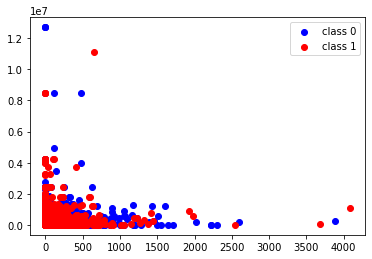

15 vs 36


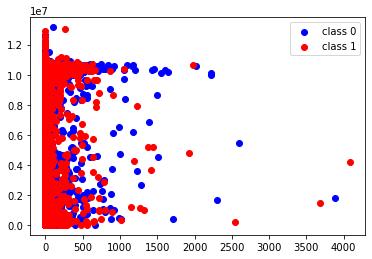

15 vs 37


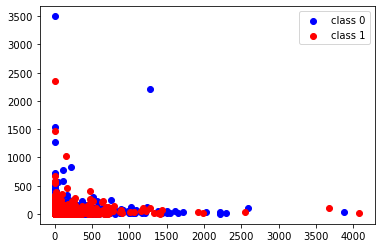

15 vs 38


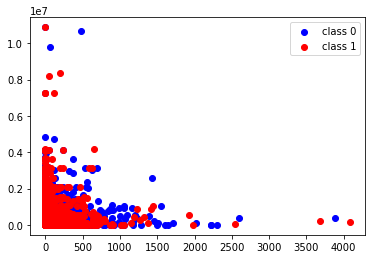

15 vs 39


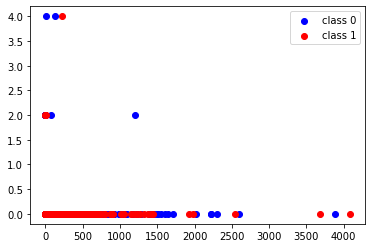

15 vs 40


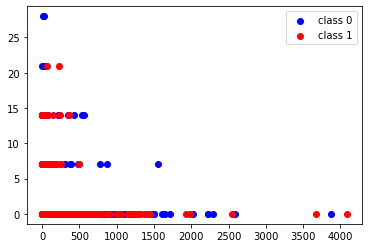

16 vs 17


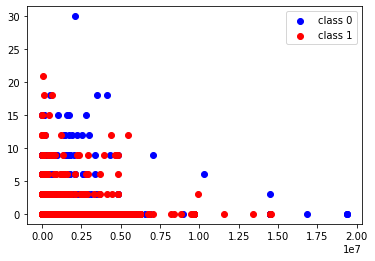

16 vs 18


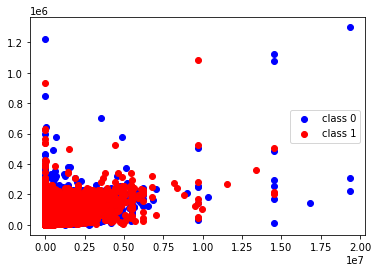

16 vs 19


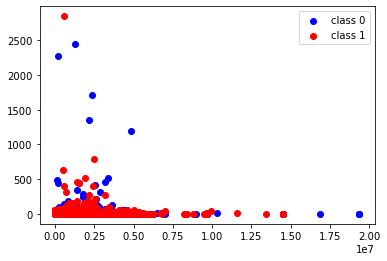

16 vs 20


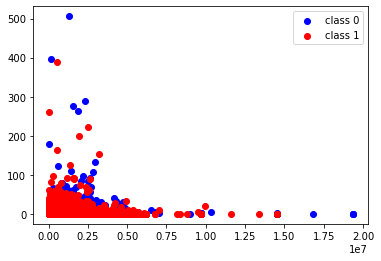

16 vs 21


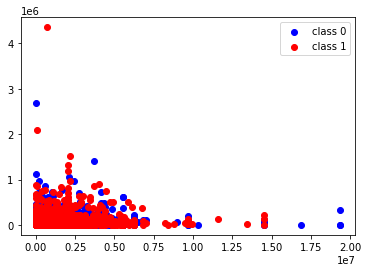

16 vs 22


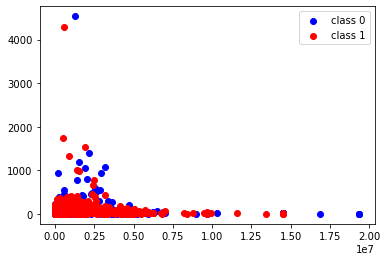

16 vs 23


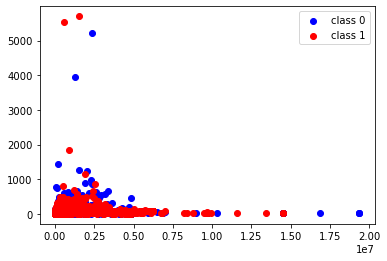

16 vs 24


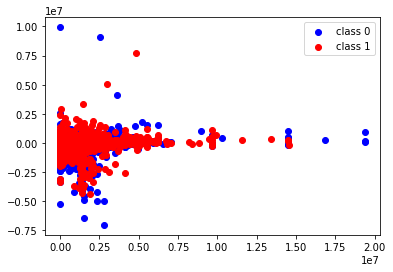

16 vs 25


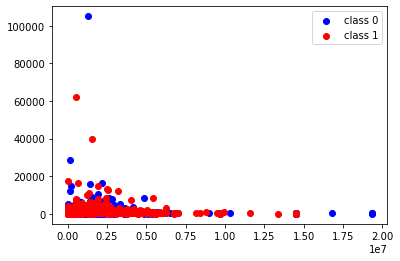

16 vs 26


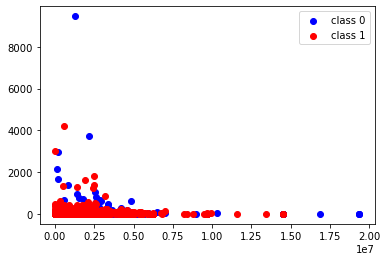

16 vs 27


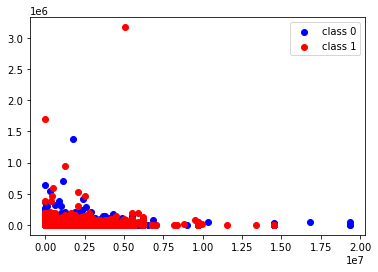

16 vs 28


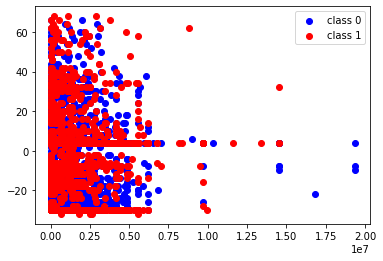

16 vs 29


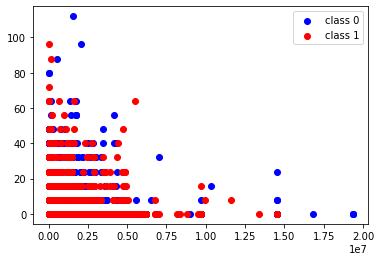

16 vs 30


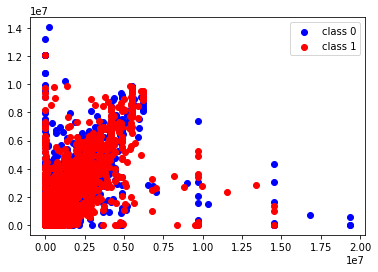

16 vs 31


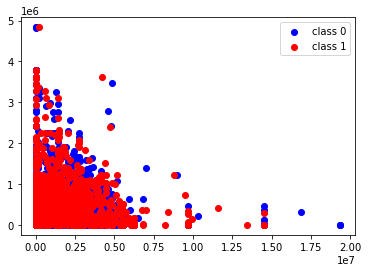

16 vs 32


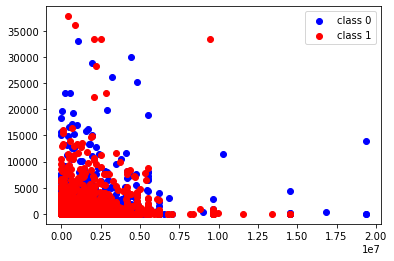

16 vs 33


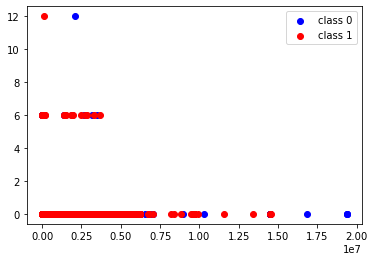

16 vs 34


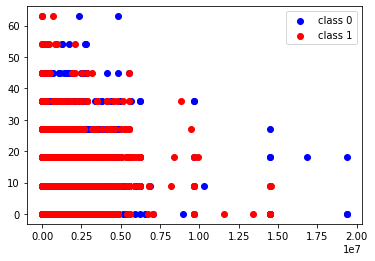

16 vs 35


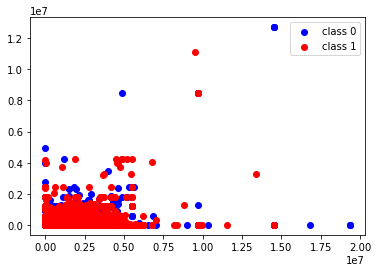

16 vs 36


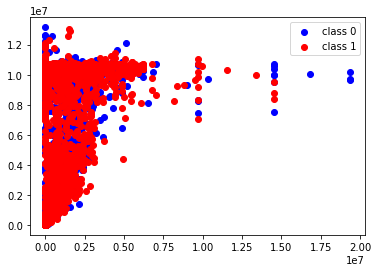

16 vs 37


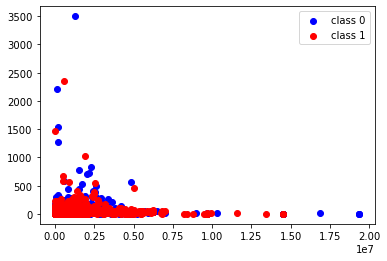

16 vs 38


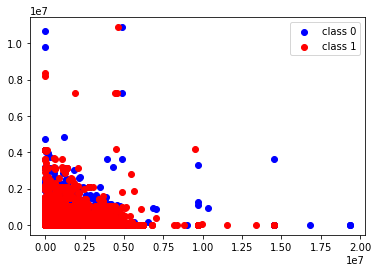

16 vs 39


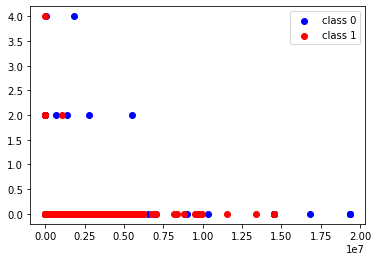

16 vs 40


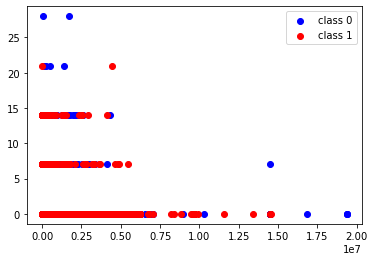

17 vs 18


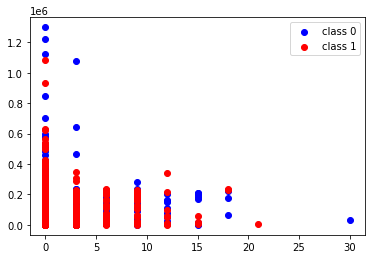

17 vs 19


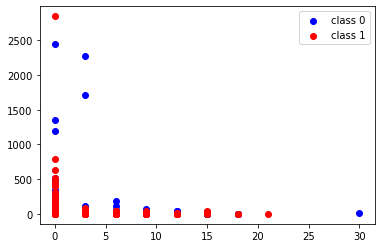

17 vs 20


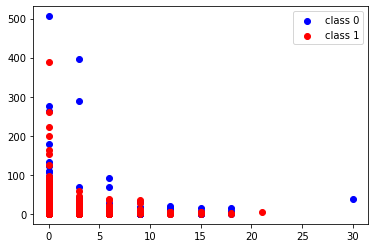

17 vs 21


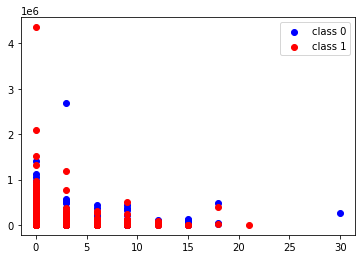

17 vs 22


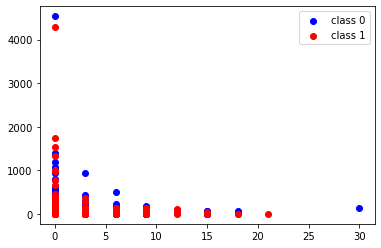

17 vs 23


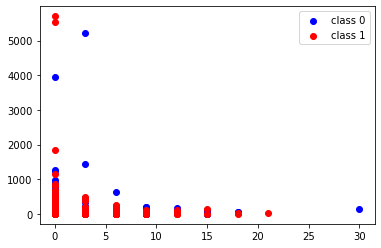

17 vs 24


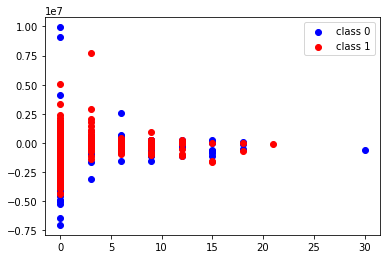

17 vs 25


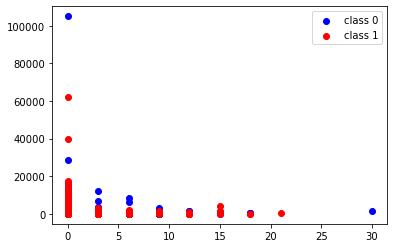

17 vs 26


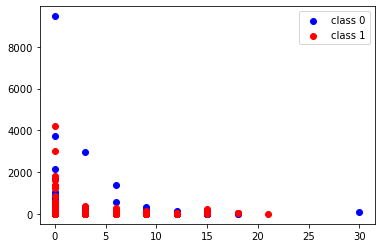

17 vs 27


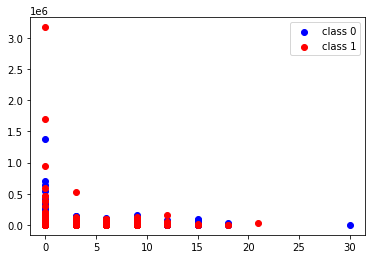

17 vs 28


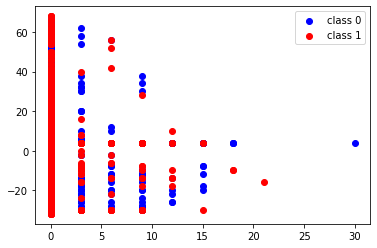

17 vs 29


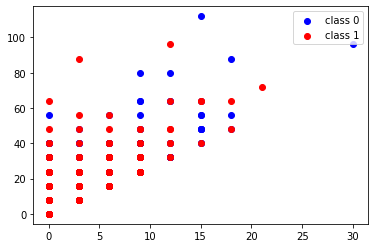

17 vs 30


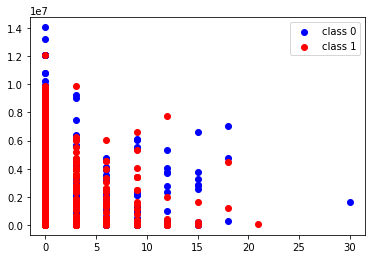

17 vs 31


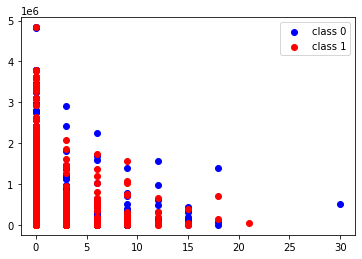

17 vs 32


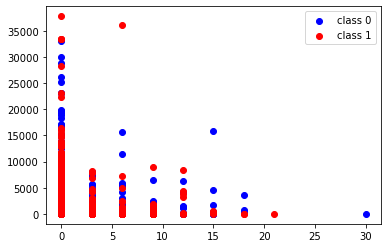

17 vs 33


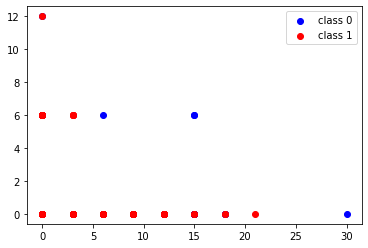

17 vs 34


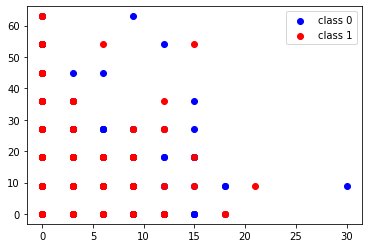

17 vs 35


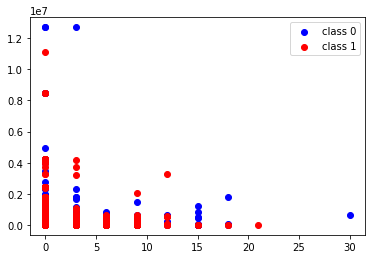

17 vs 36


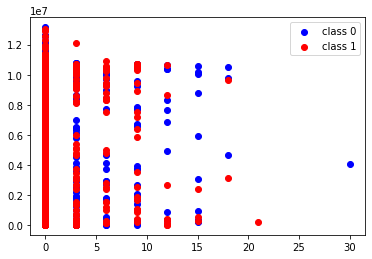

17 vs 37


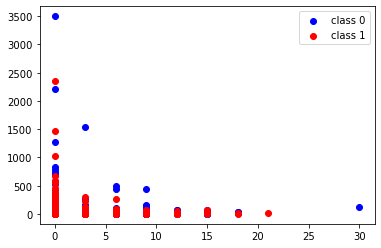

17 vs 38


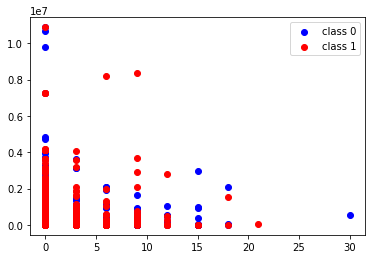

17 vs 39


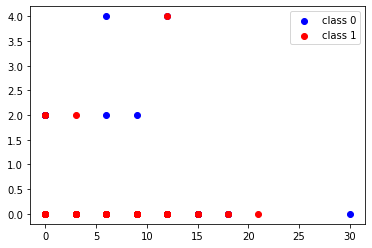

17 vs 40


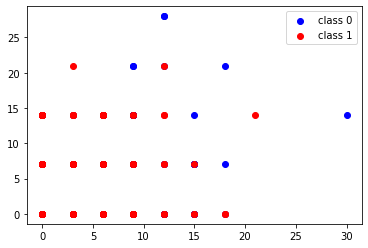

18 vs 19


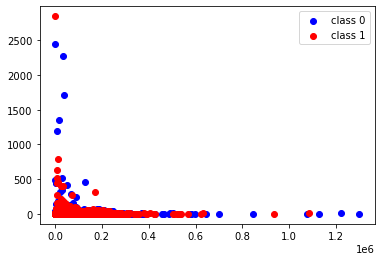

18 vs 20


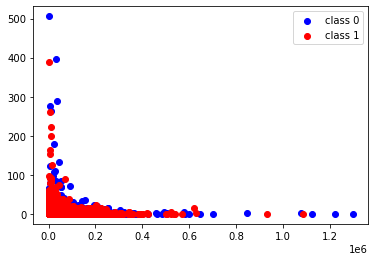

18 vs 21


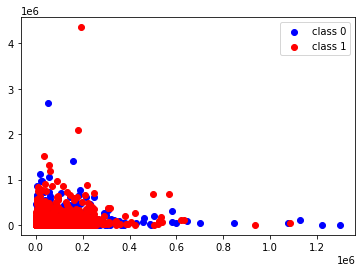

18 vs 22


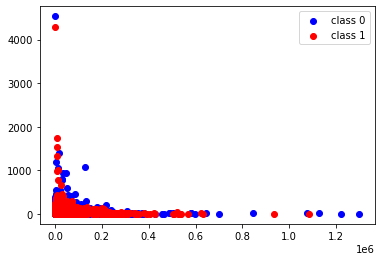

18 vs 23


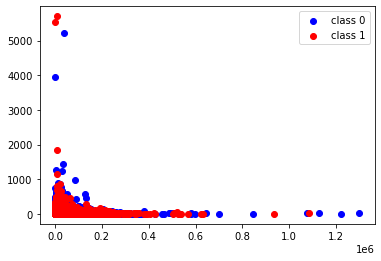

18 vs 24


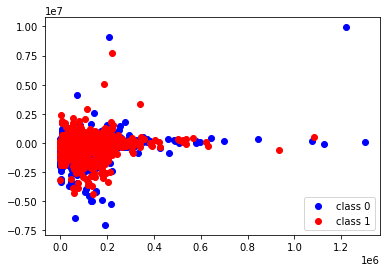

18 vs 25


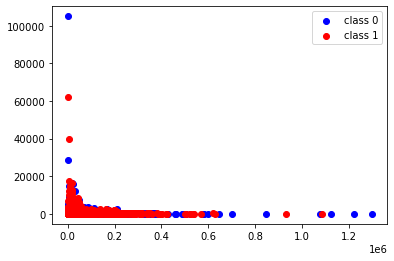

18 vs 26


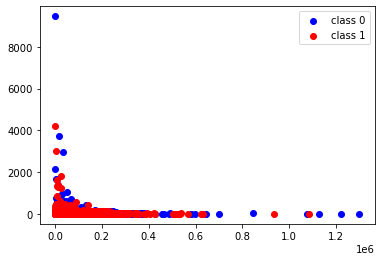

18 vs 27


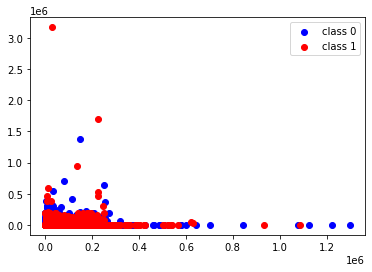

18 vs 28


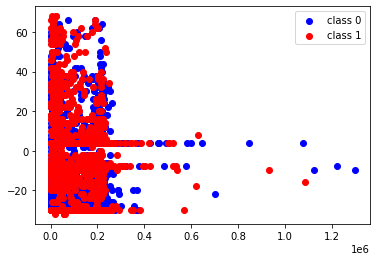

18 vs 29


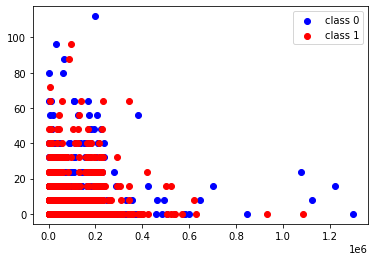

18 vs 30


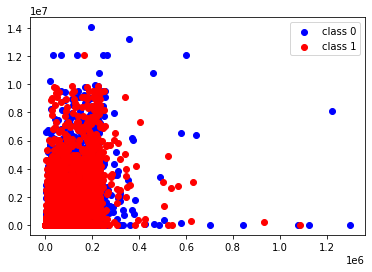

18 vs 31


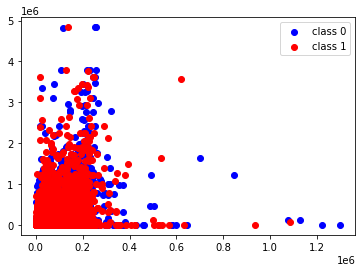

18 vs 32


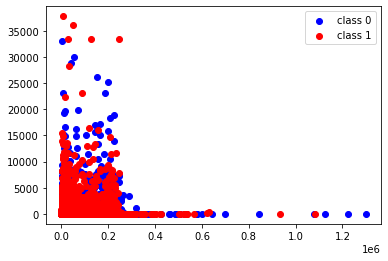

18 vs 33


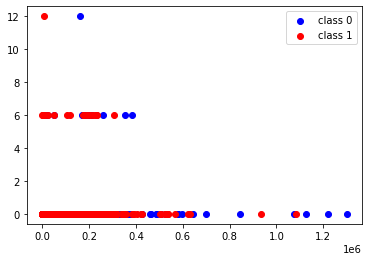

18 vs 34


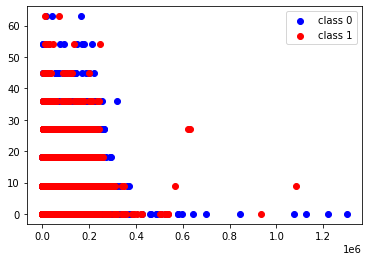

18 vs 35


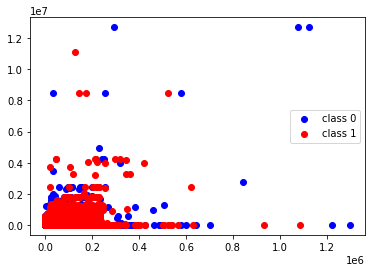

18 vs 36


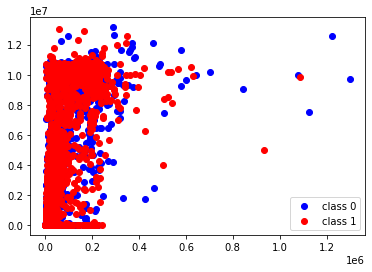

18 vs 37


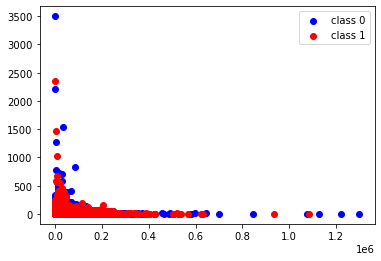

18 vs 38


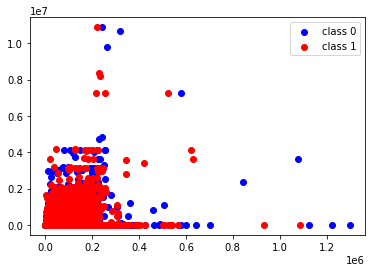

18 vs 39


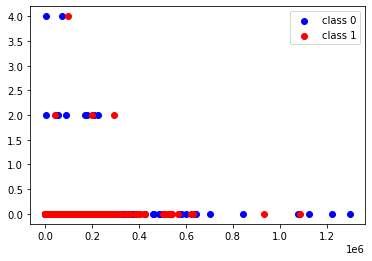

18 vs 40


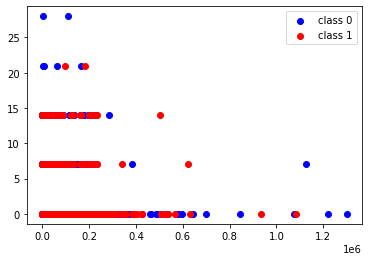

19 vs 20


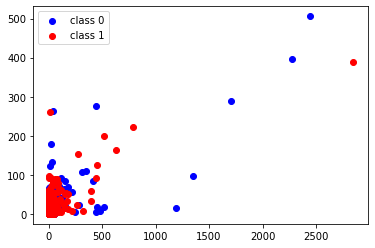

19 vs 21


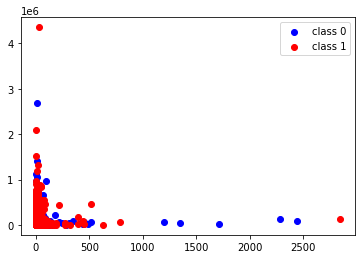

19 vs 22


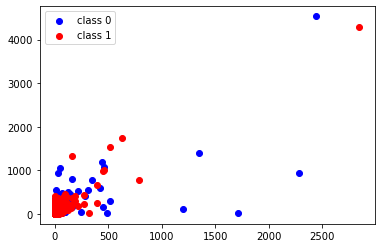

19 vs 23


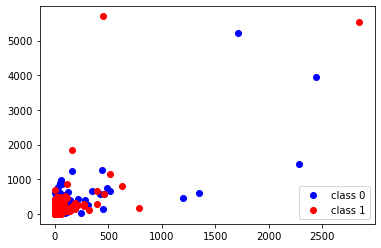

19 vs 24


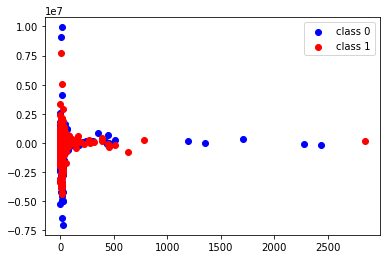

19 vs 25


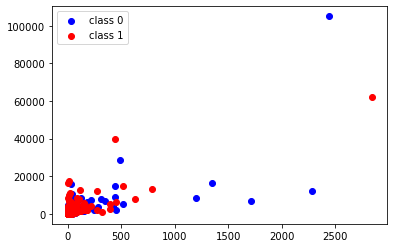

19 vs 26


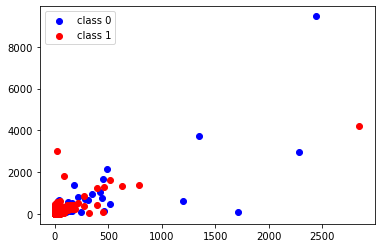

19 vs 27


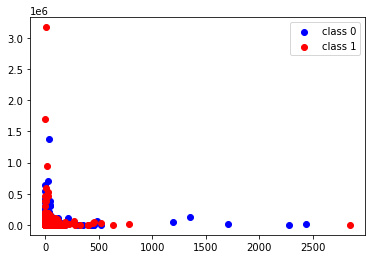

19 vs 28


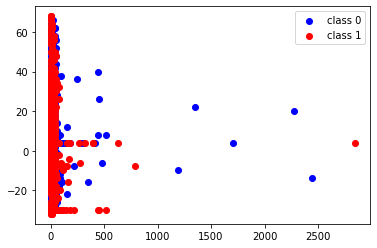

19 vs 29


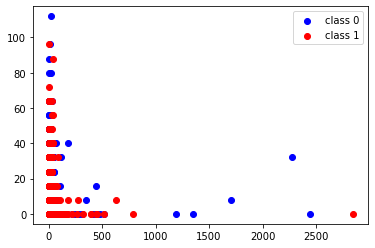

19 vs 30


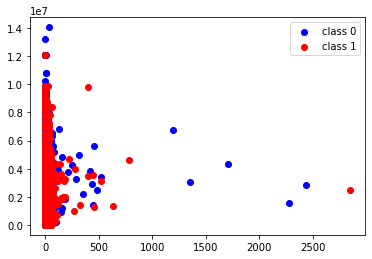

19 vs 31


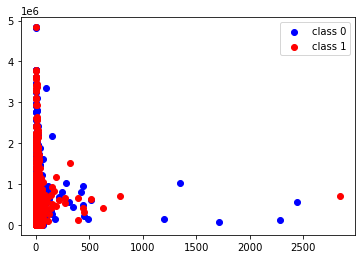

19 vs 32


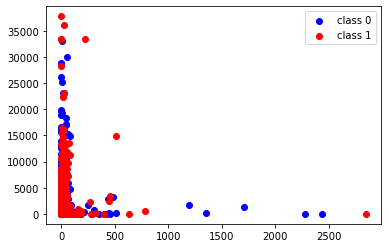

19 vs 33


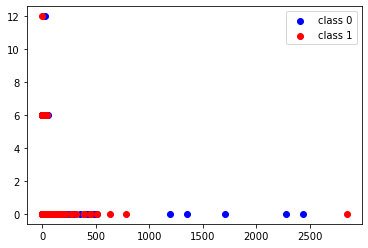

19 vs 34


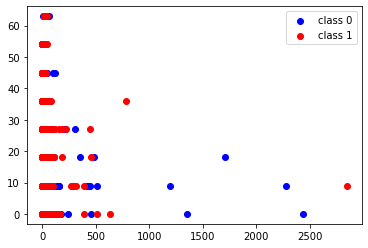

19 vs 35


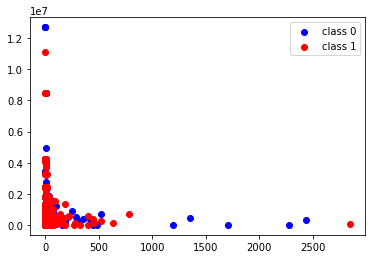

19 vs 36


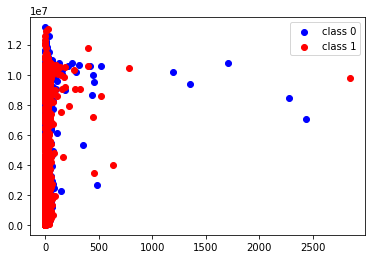

19 vs 37


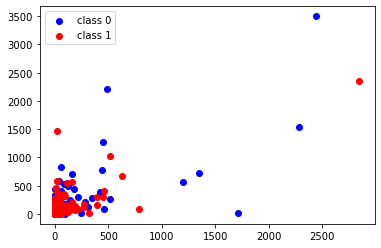

19 vs 38


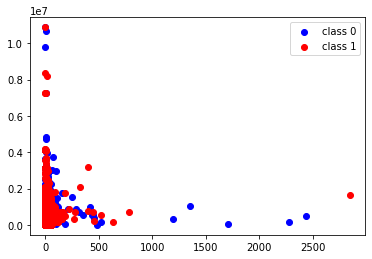

19 vs 39


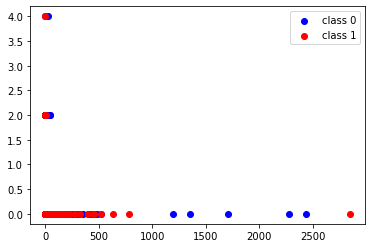

19 vs 40


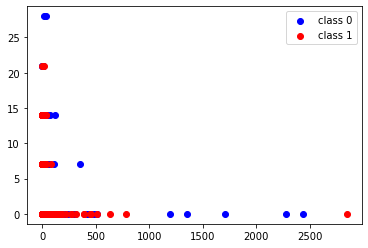

20 vs 21


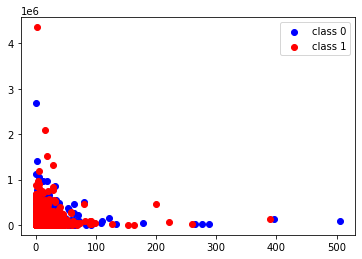

20 vs 22


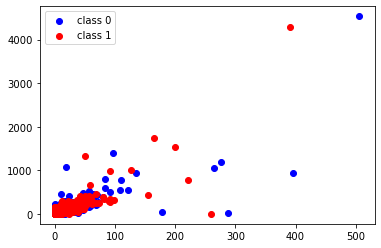

20 vs 23


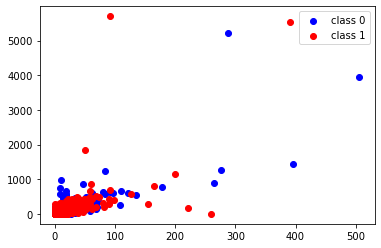

20 vs 24


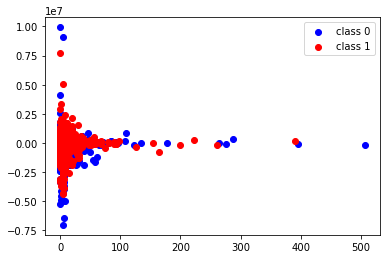

20 vs 25


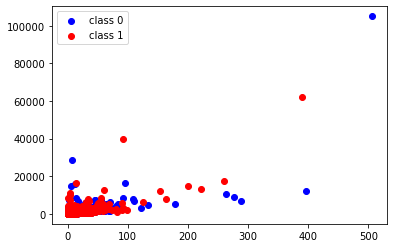

20 vs 26


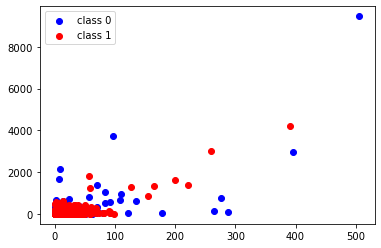

20 vs 27


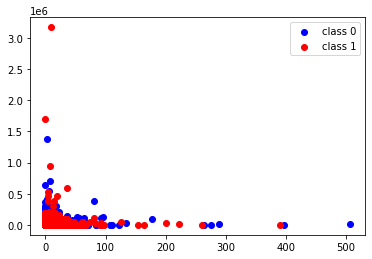

20 vs 28


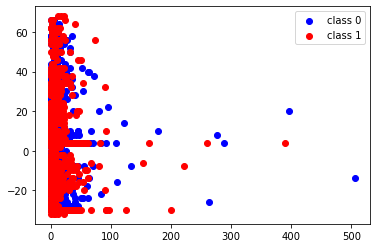

20 vs 29


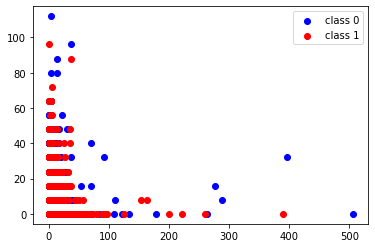

20 vs 30


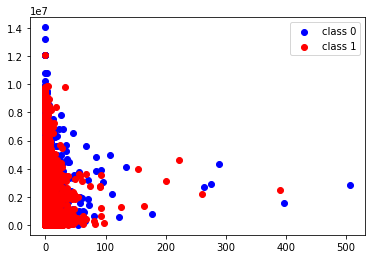

20 vs 31


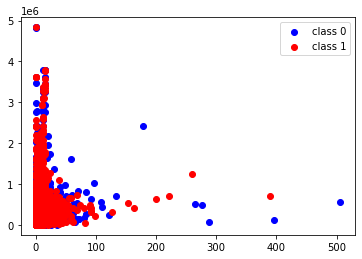

20 vs 32


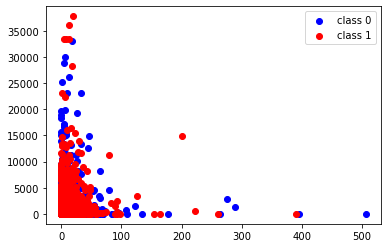

20 vs 33


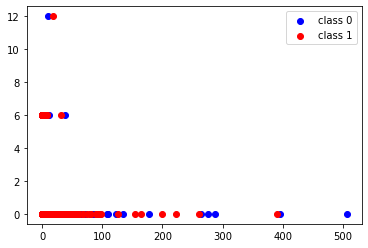

20 vs 34


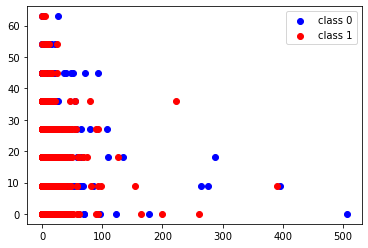

20 vs 35


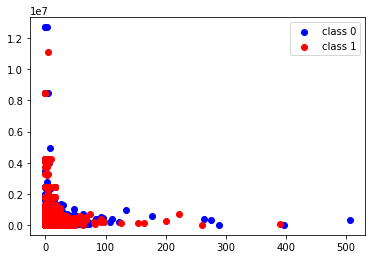

20 vs 36


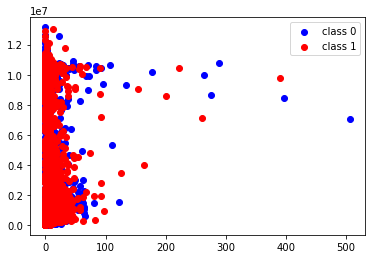

20 vs 37


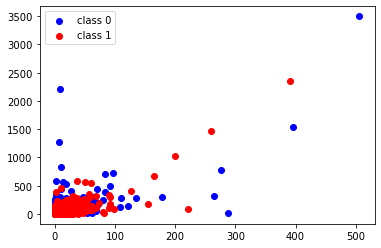

20 vs 38


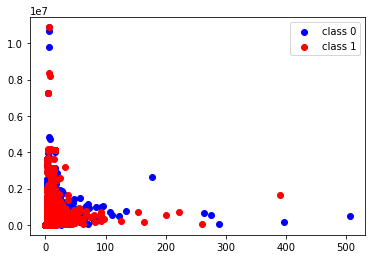

20 vs 39


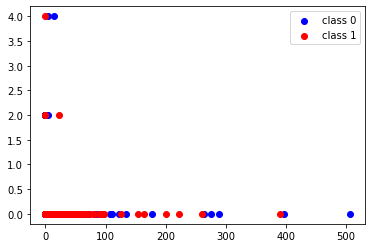

20 vs 40


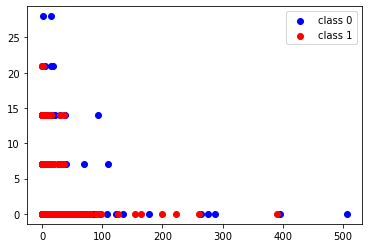

21 vs 22


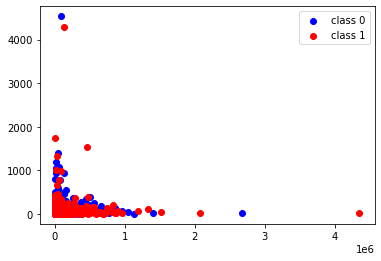

21 vs 23


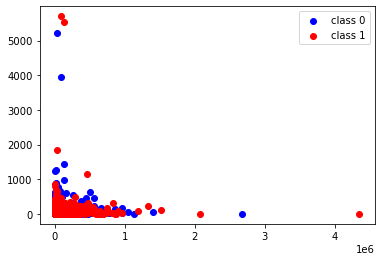

21 vs 24


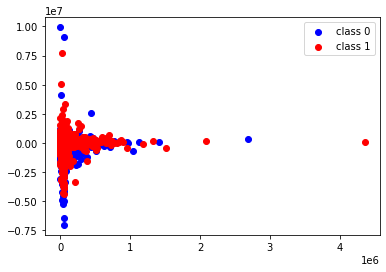

21 vs 25


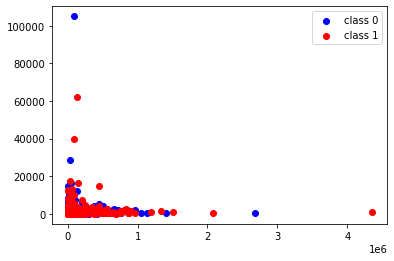

21 vs 26


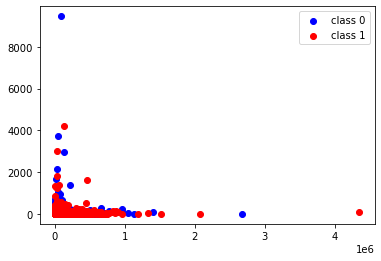

21 vs 27


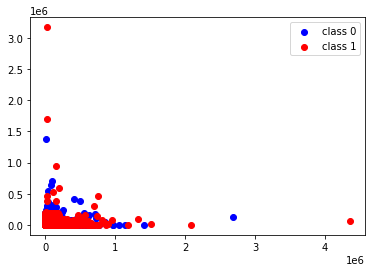

21 vs 28


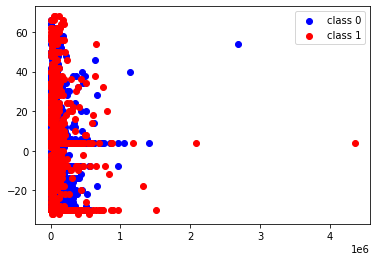

21 vs 29


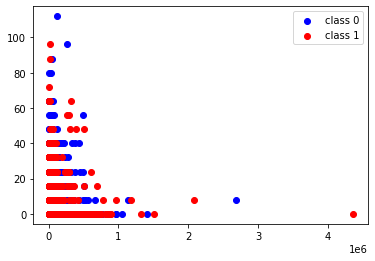

21 vs 30


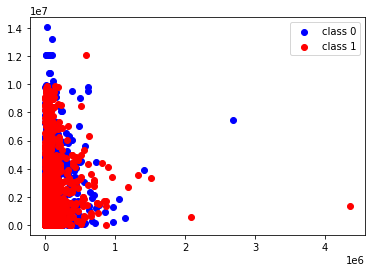

21 vs 31


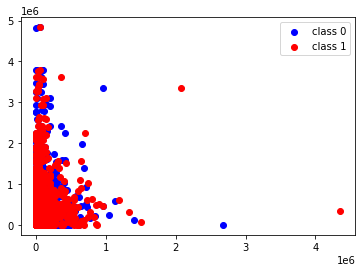

21 vs 32


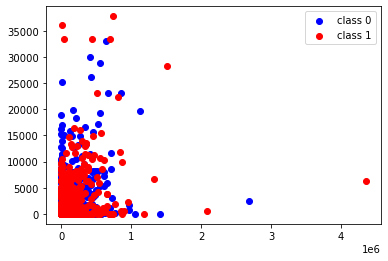

21 vs 33


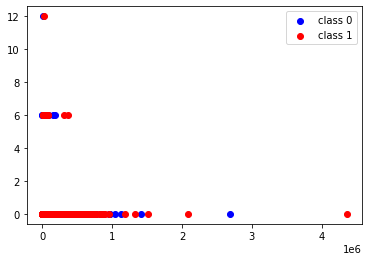

21 vs 34


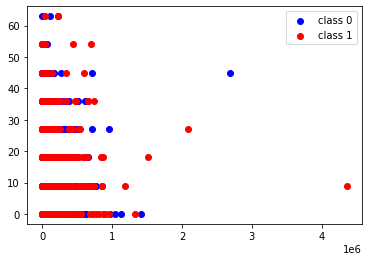

21 vs 35


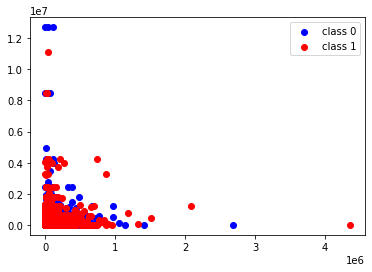

21 vs 36


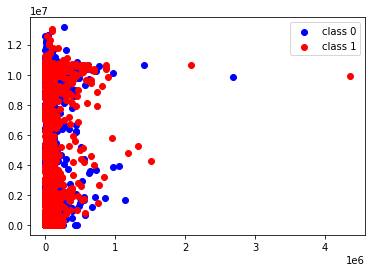

21 vs 37


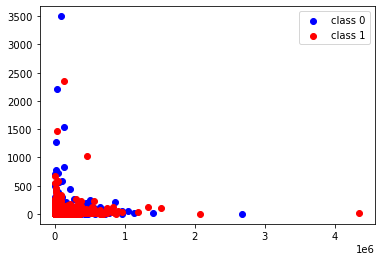

21 vs 38


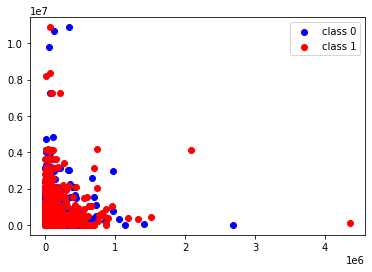

21 vs 39


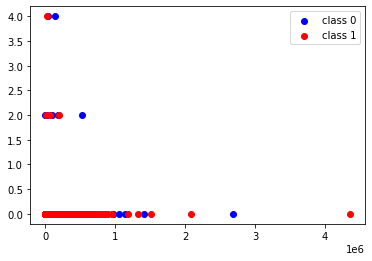

21 vs 40


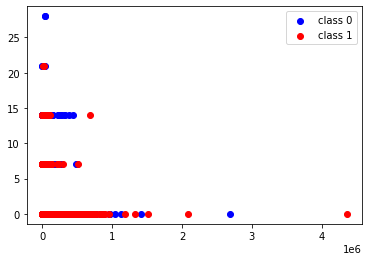

22 vs 23


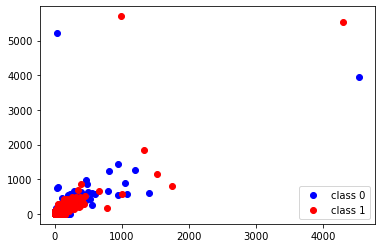

22 vs 24


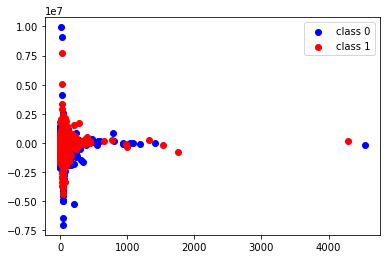

22 vs 25


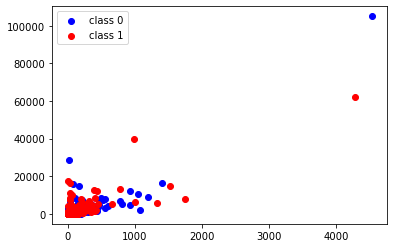

22 vs 26


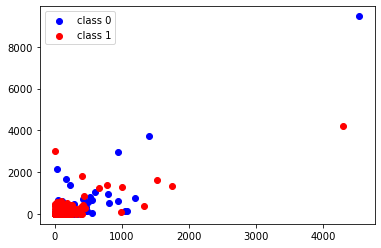

22 vs 27


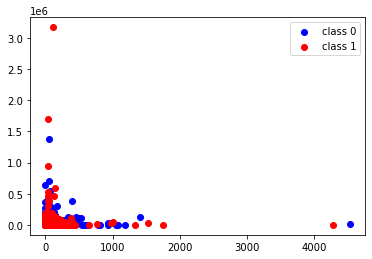

22 vs 28


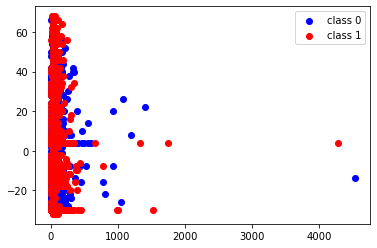

22 vs 29


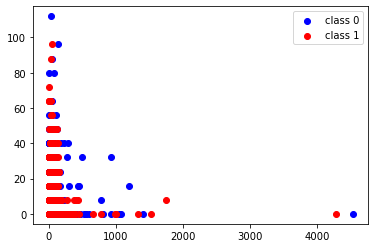

22 vs 30


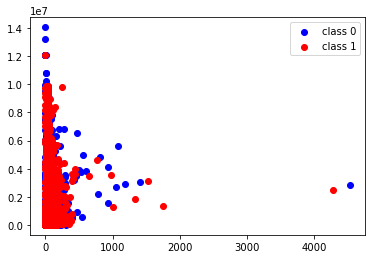

22 vs 31


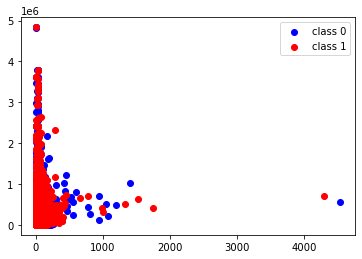

22 vs 32


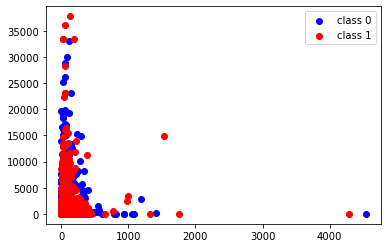

22 vs 33


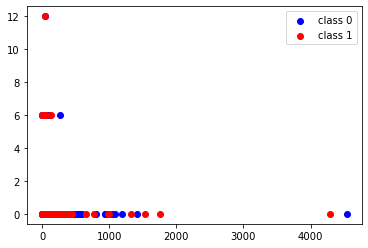

22 vs 34


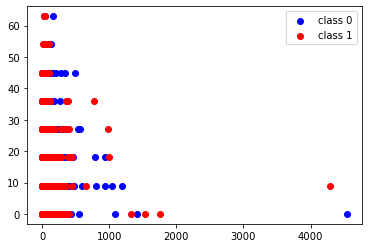

22 vs 35


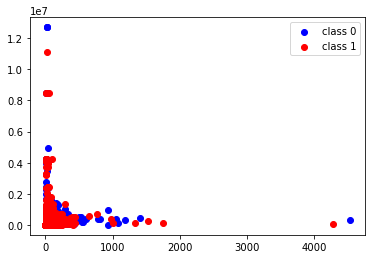

22 vs 36


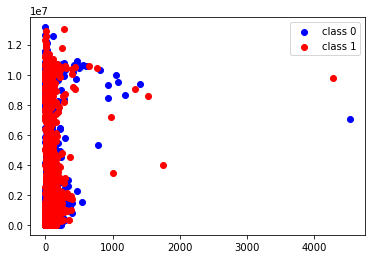

22 vs 37


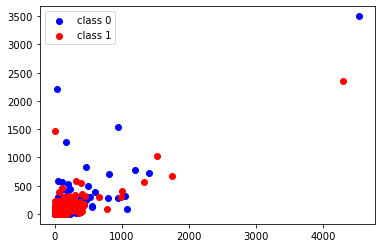

22 vs 38


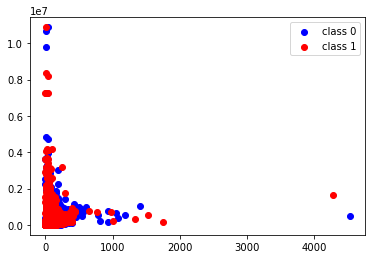

22 vs 39


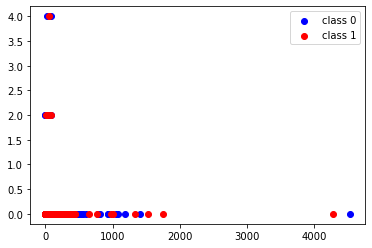

22 vs 40


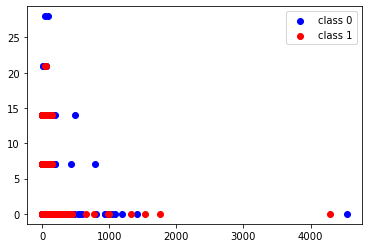

23 vs 24


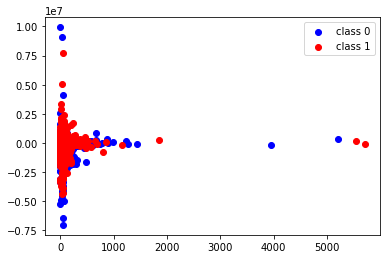

23 vs 25


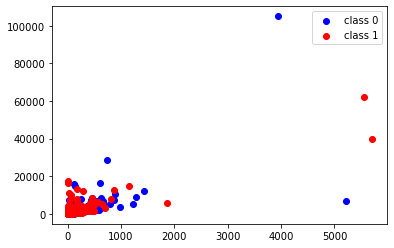

23 vs 26


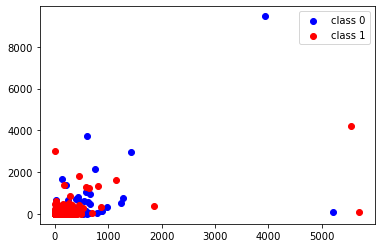

23 vs 27


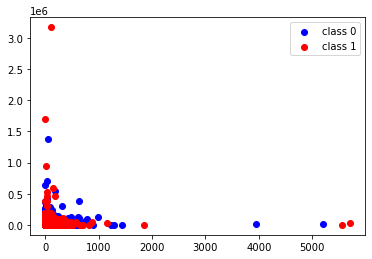

23 vs 28


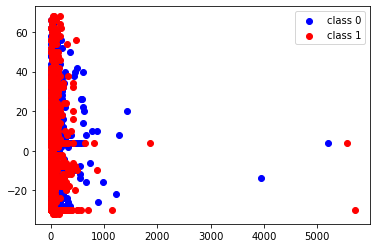

23 vs 29


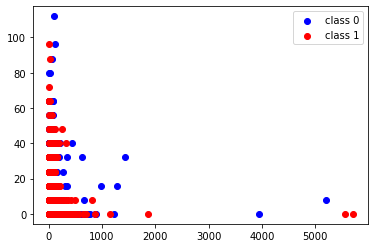

23 vs 30


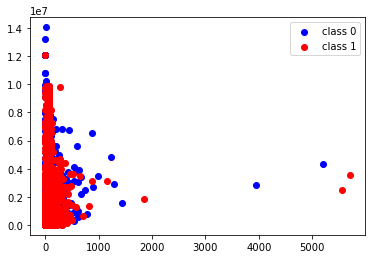

23 vs 31


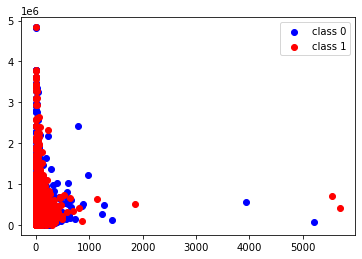

23 vs 32


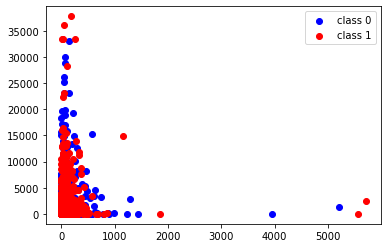

23 vs 33


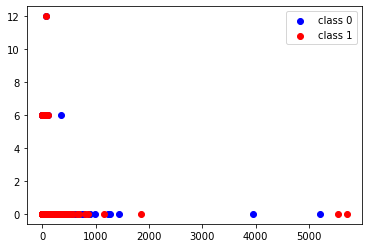

23 vs 34


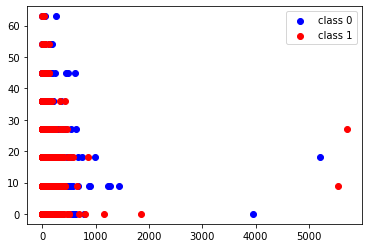

23 vs 35


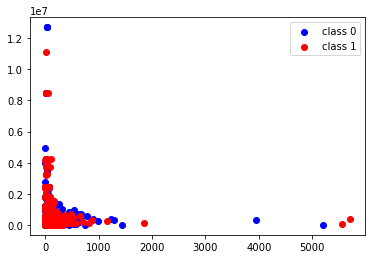

23 vs 36


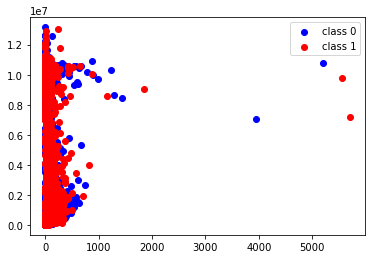

23 vs 37


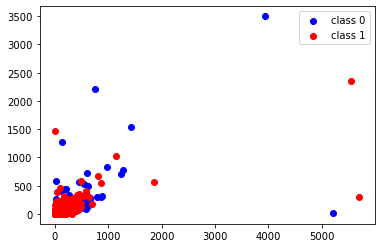

23 vs 38


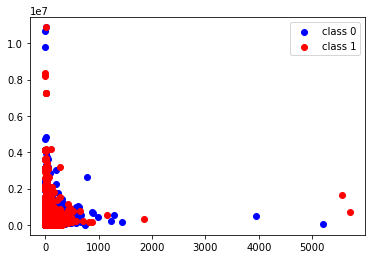

23 vs 39


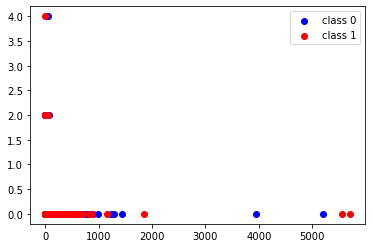

23 vs 40


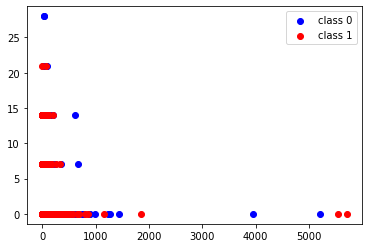

24 vs 25


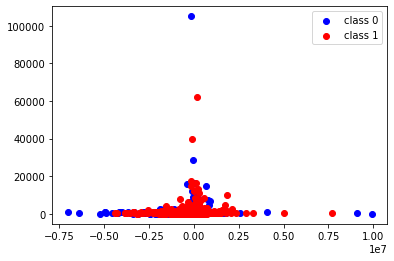

24 vs 26


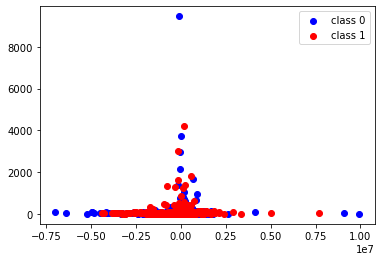

24 vs 27


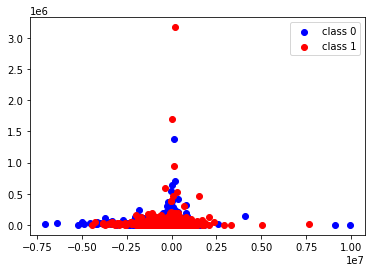

24 vs 28


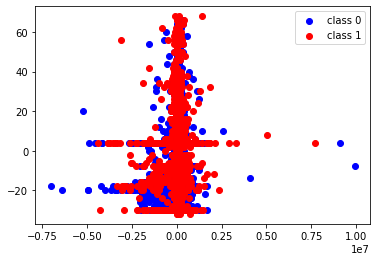

24 vs 29


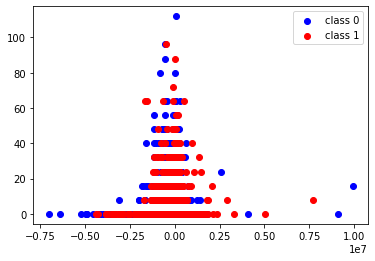

24 vs 30


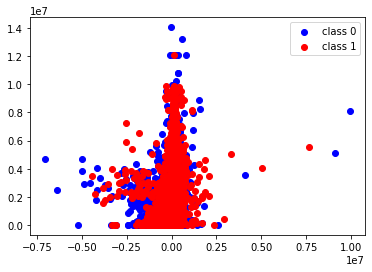

24 vs 31


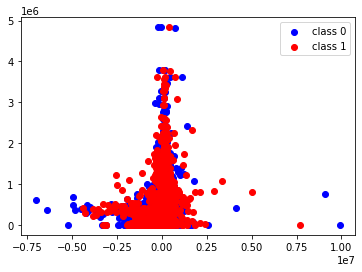

24 vs 32


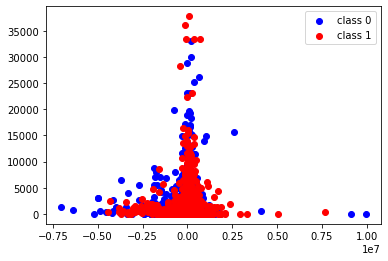

24 vs 33


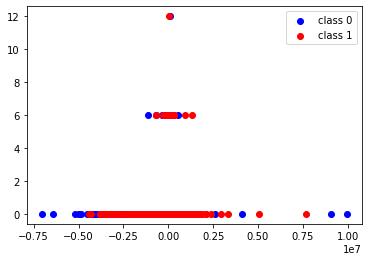

24 vs 34


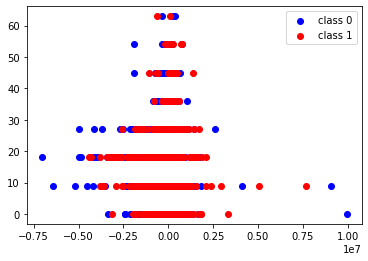

24 vs 35


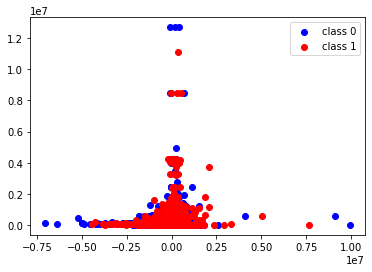

24 vs 36


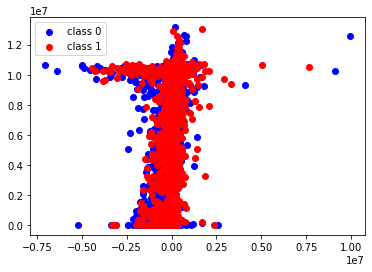

24 vs 37


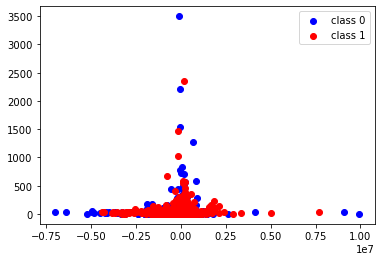

24 vs 38


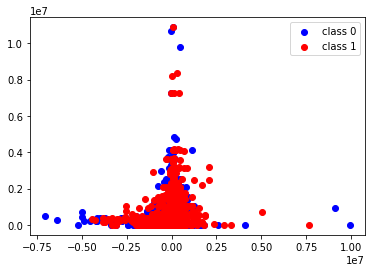

24 vs 39


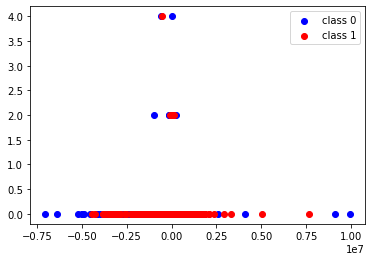

24 vs 40


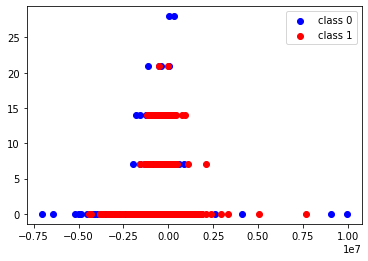

25 vs 26


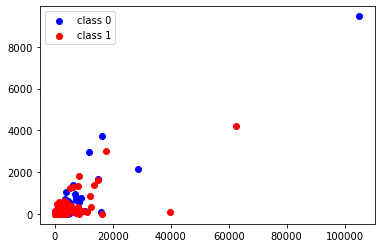

25 vs 27


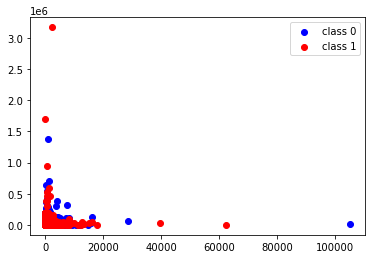

25 vs 28


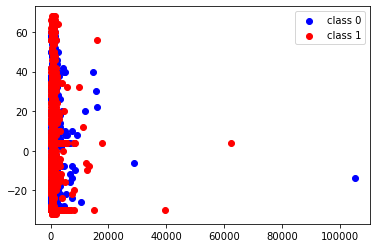

25 vs 29


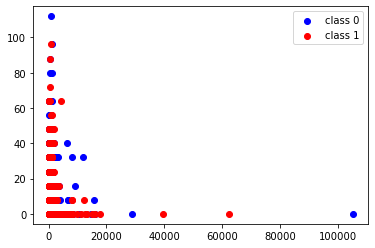

25 vs 30


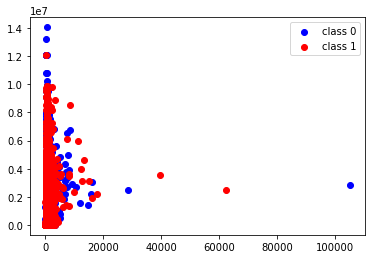

25 vs 31


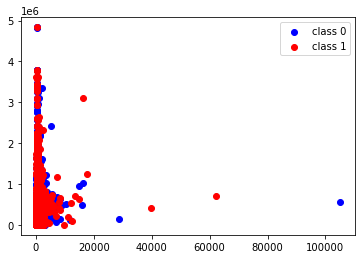

25 vs 32


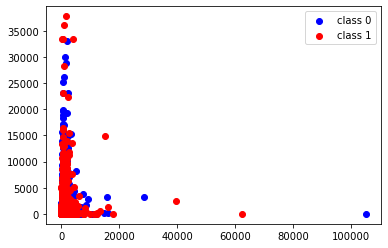

25 vs 33


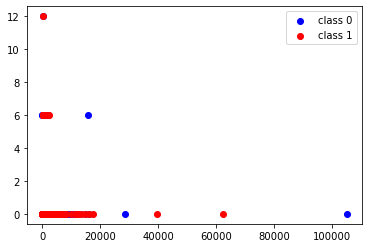

25 vs 34


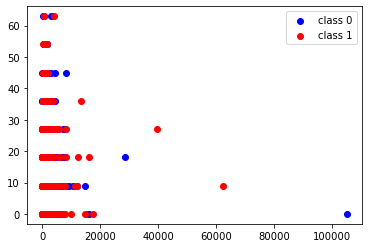

25 vs 35


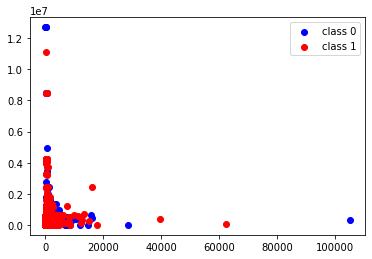

25 vs 36


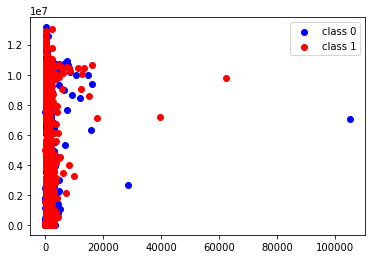

25 vs 37


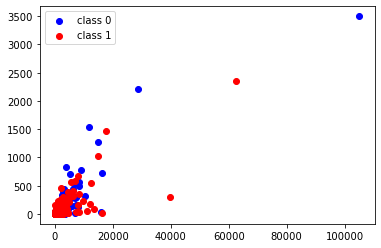

25 vs 38


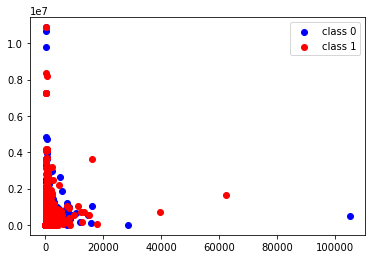

25 vs 39


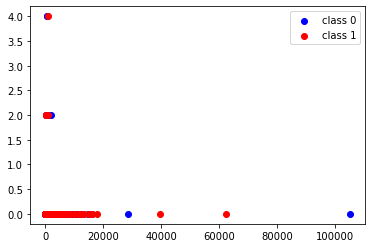

25 vs 40


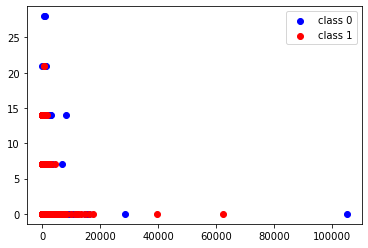

26 vs 27


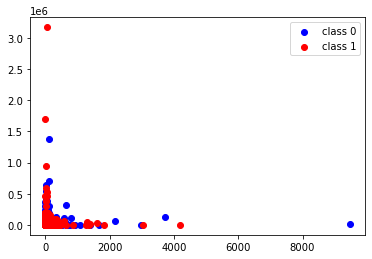

26 vs 28


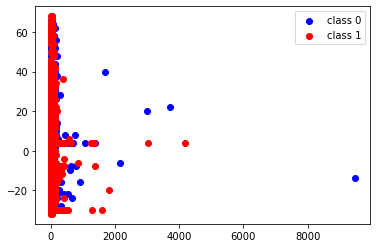

26 vs 29


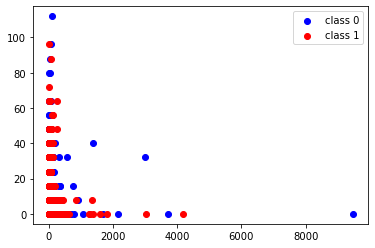

26 vs 30


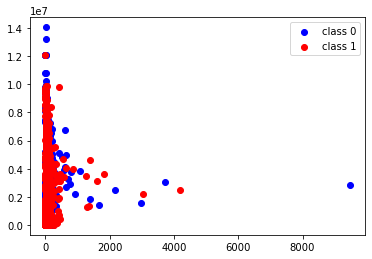

26 vs 31


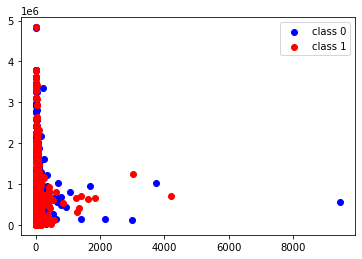

26 vs 32


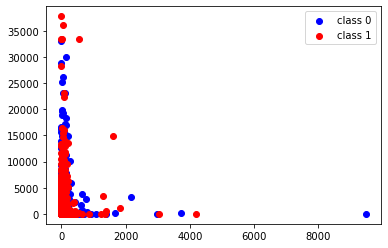

26 vs 33


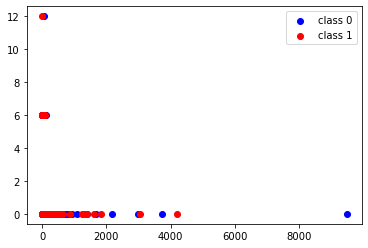

26 vs 34


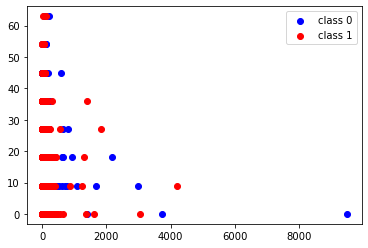

26 vs 35


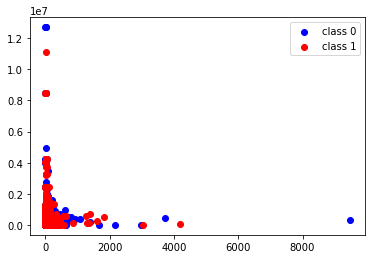

26 vs 36


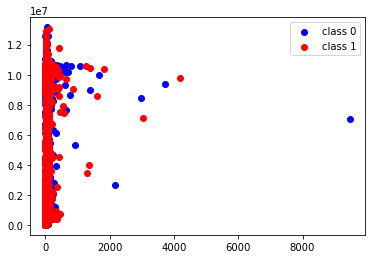

26 vs 37


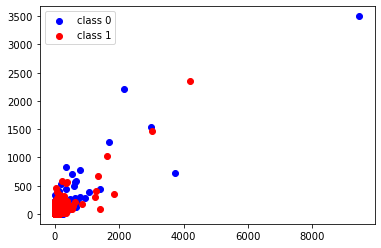

26 vs 38


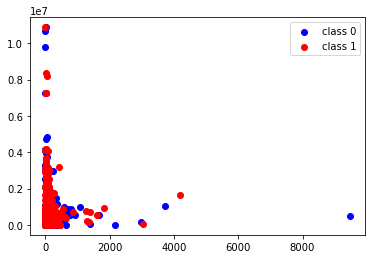

26 vs 39


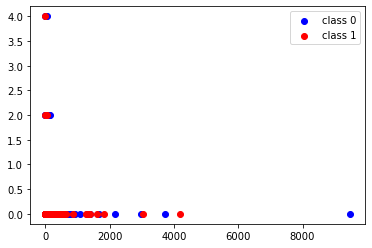

26 vs 40


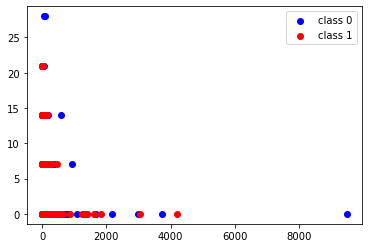

27 vs 28


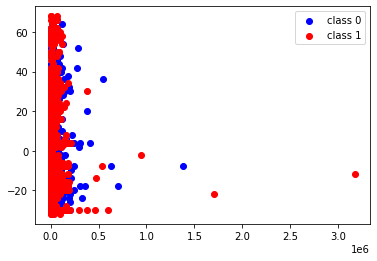

27 vs 29


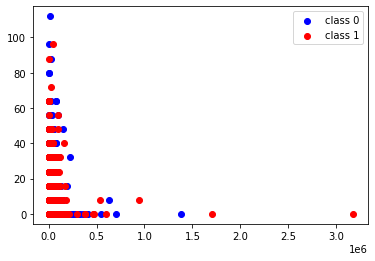

27 vs 30


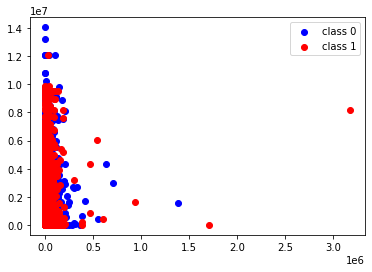

27 vs 31


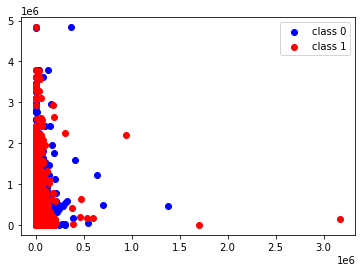

27 vs 32


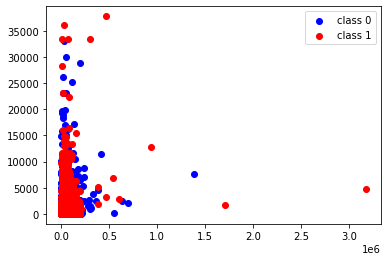

27 vs 33


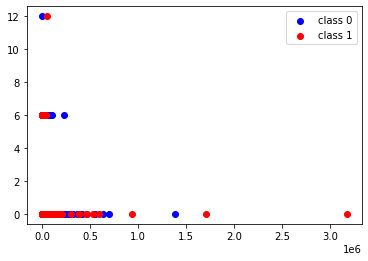

27 vs 34


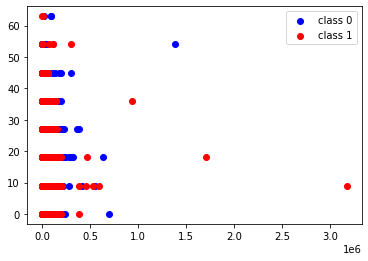

27 vs 35


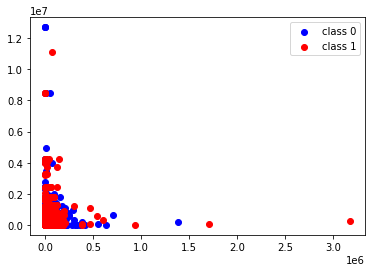

27 vs 36


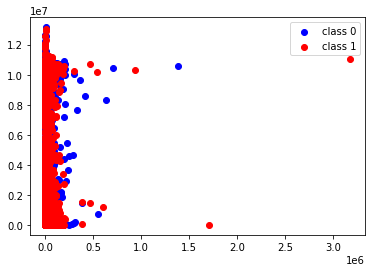

27 vs 37


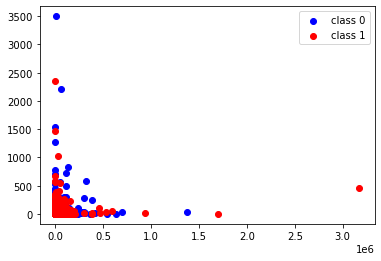

27 vs 38


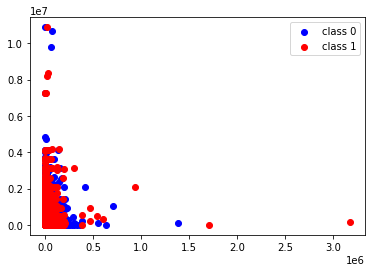

27 vs 39


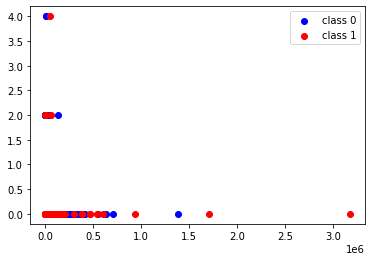

27 vs 40


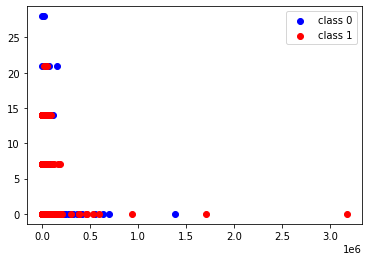

28 vs 29


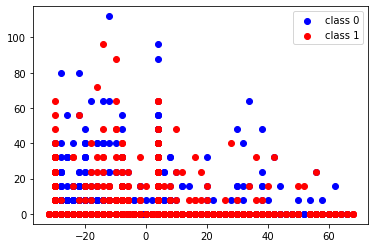

28 vs 30


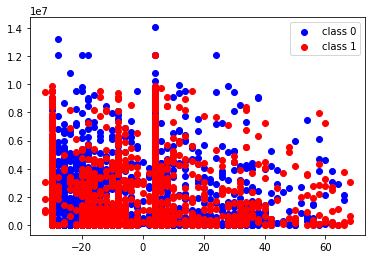

28 vs 31


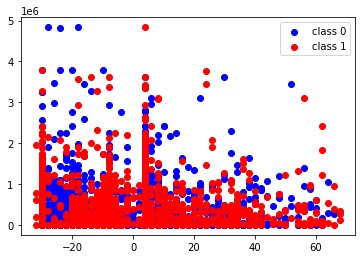

28 vs 32


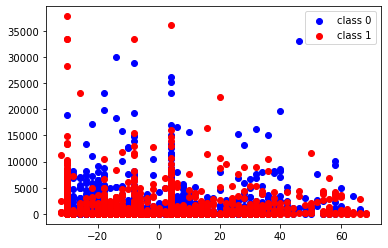

28 vs 33


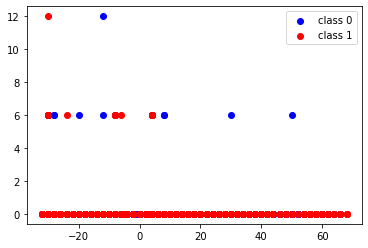

28 vs 34


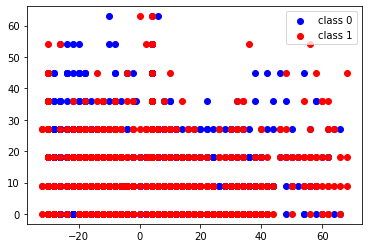

28 vs 35


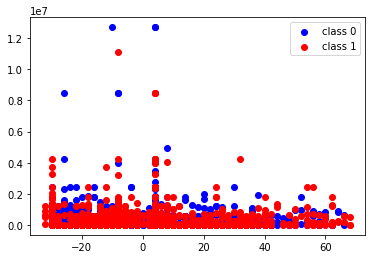

28 vs 36


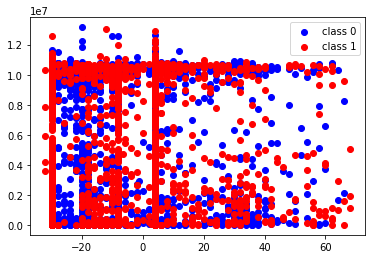

28 vs 37


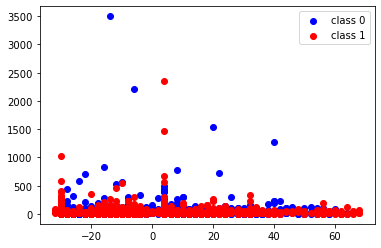

28 vs 38


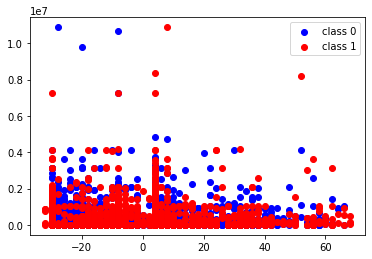

28 vs 39


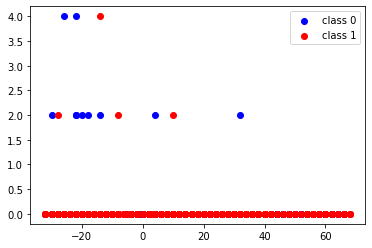

28 vs 40


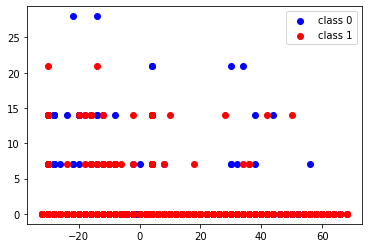

29 vs 30


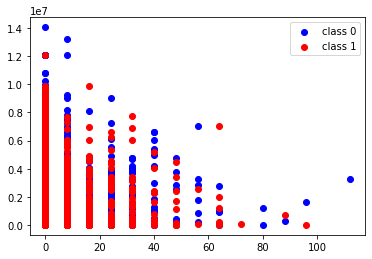

29 vs 31


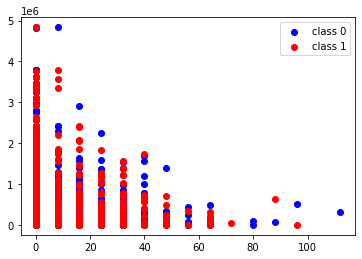

29 vs 32


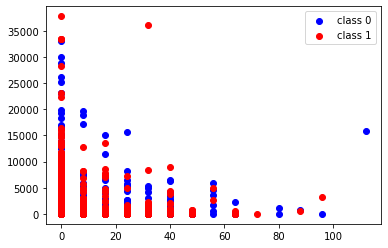

29 vs 33


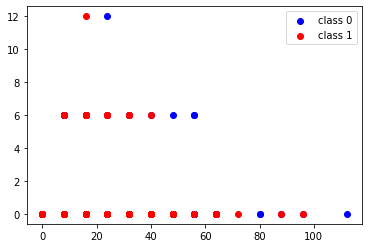

29 vs 34


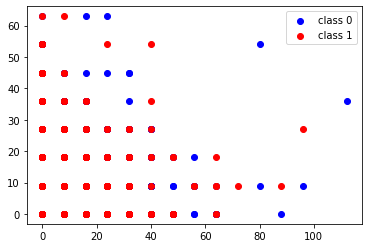

29 vs 35


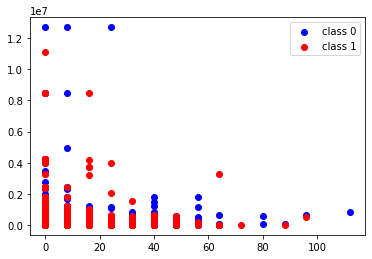

29 vs 36


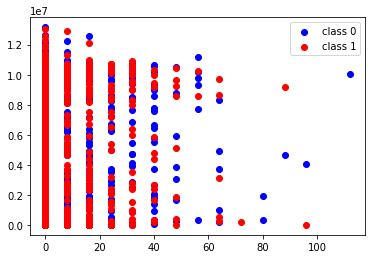

29 vs 37


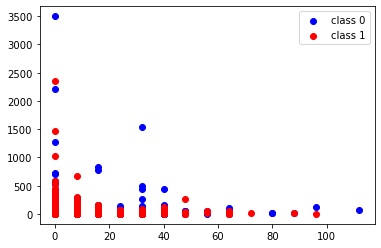

29 vs 38


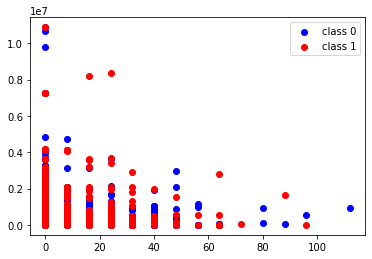

29 vs 39


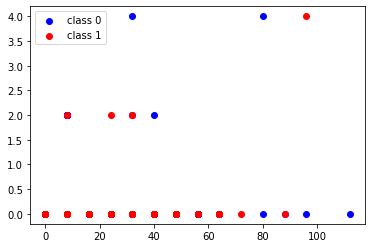

29 vs 40


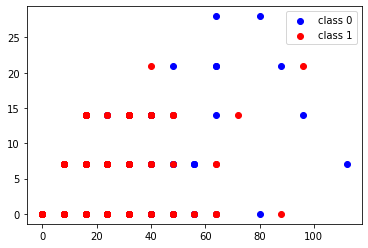

30 vs 31


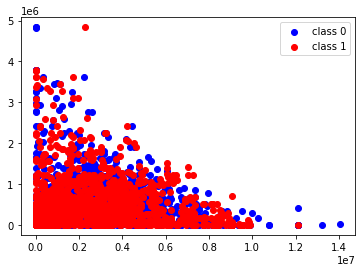

30 vs 32


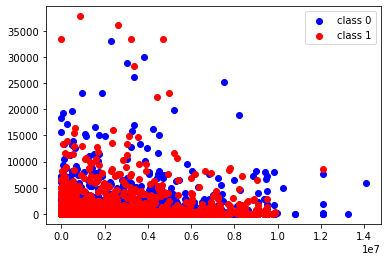

30 vs 33


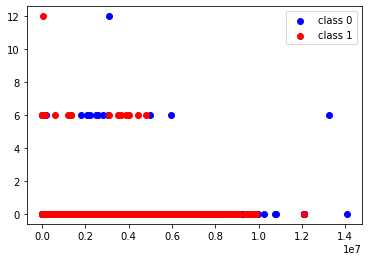

30 vs 34


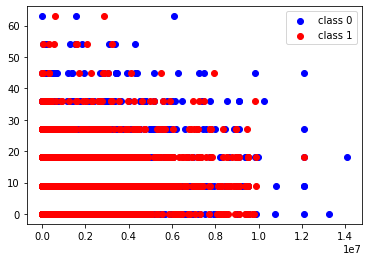

30 vs 35


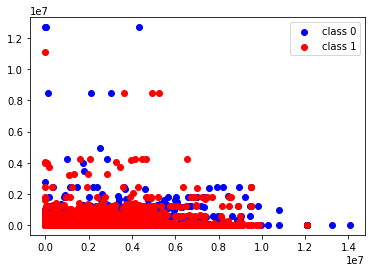

30 vs 36


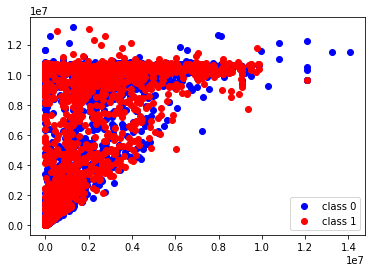

30 vs 37


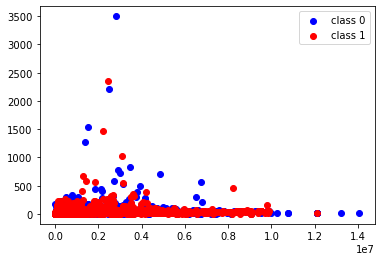

30 vs 38


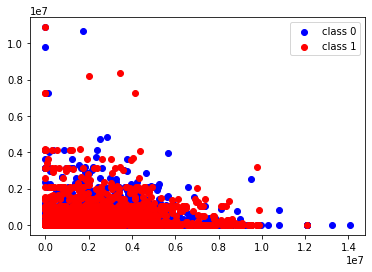

30 vs 39


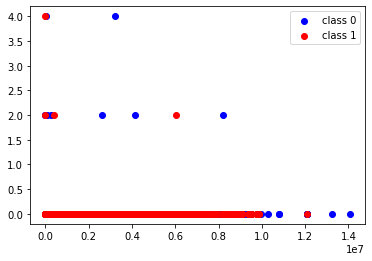

30 vs 40


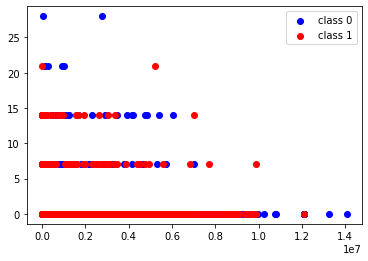

31 vs 32


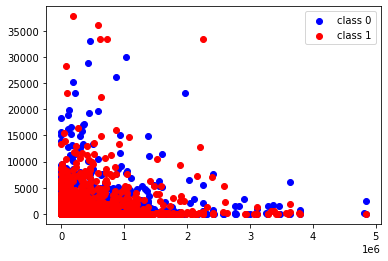

31 vs 33


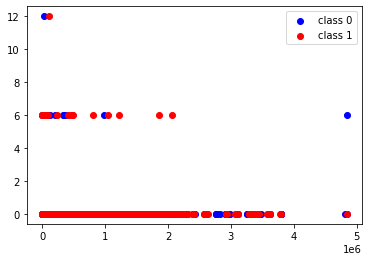

31 vs 34


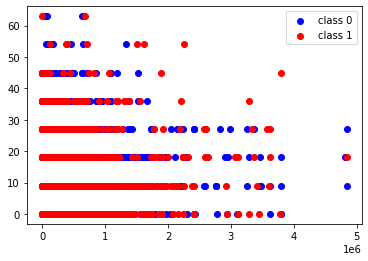

31 vs 35


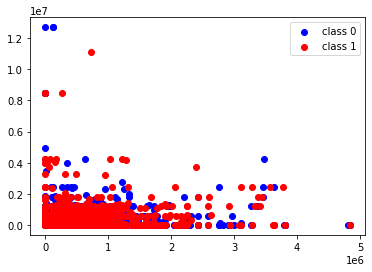

31 vs 36


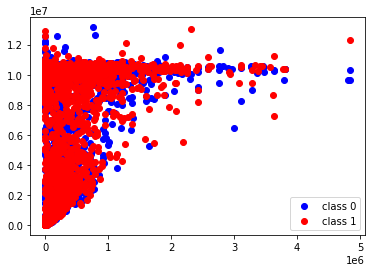

31 vs 37


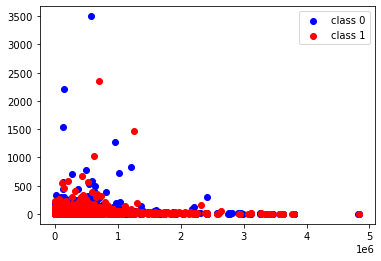

31 vs 38


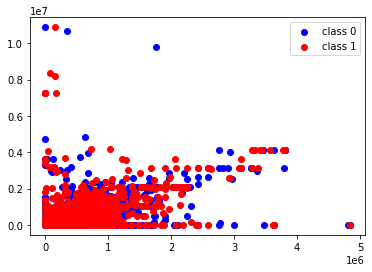

31 vs 39


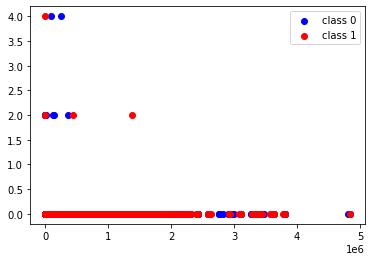

31 vs 40


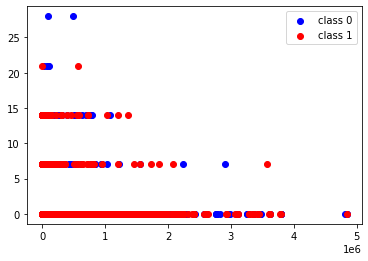

32 vs 33


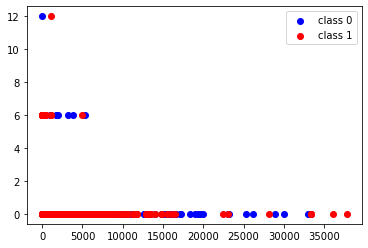

32 vs 34


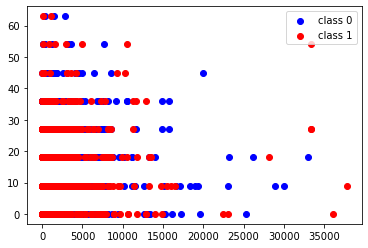

32 vs 35


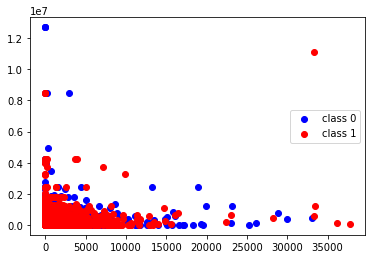

32 vs 36


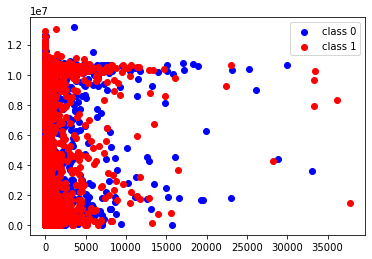

32 vs 37


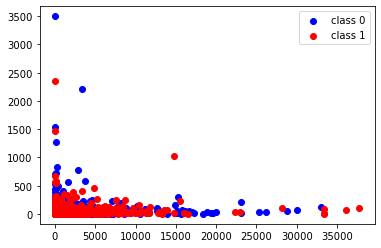

32 vs 38


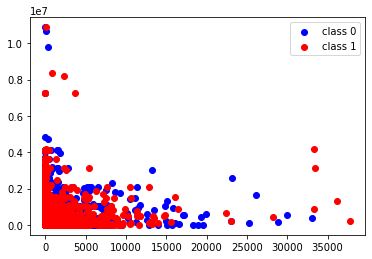

32 vs 39


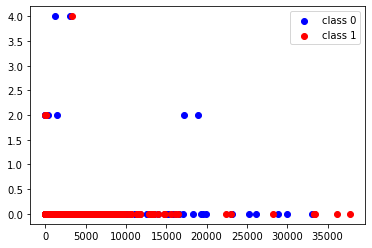

32 vs 40


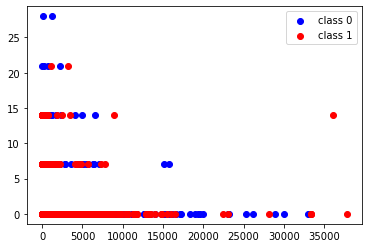

33 vs 34


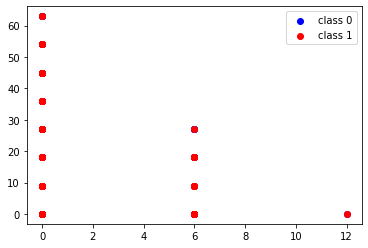

33 vs 35


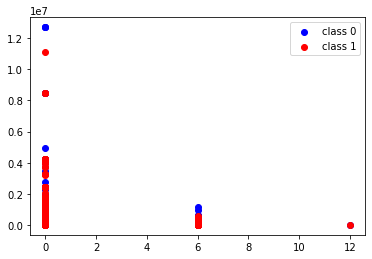

33 vs 36


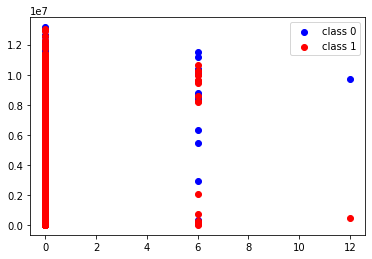

33 vs 37


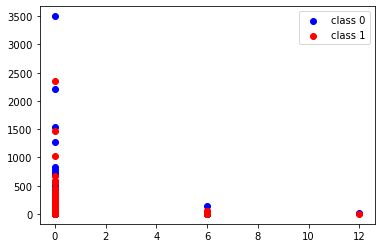

33 vs 38


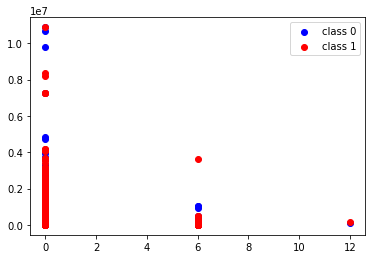

33 vs 39


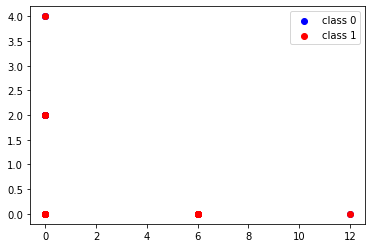

33 vs 40


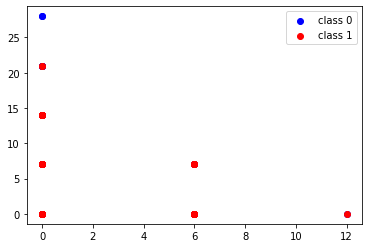

34 vs 35


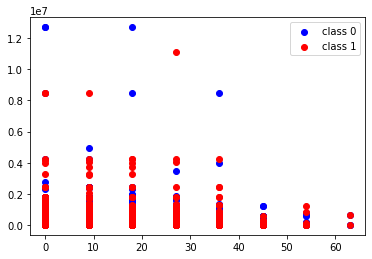

34 vs 36


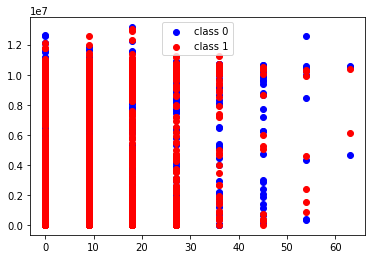

34 vs 37


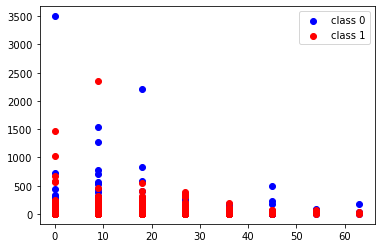

34 vs 38


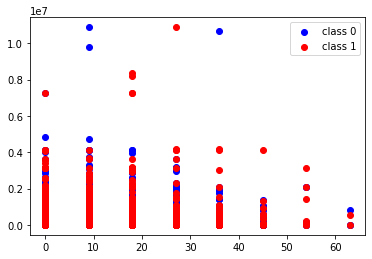

34 vs 39


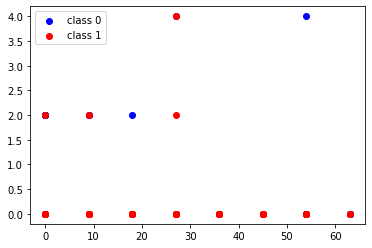

34 vs 40


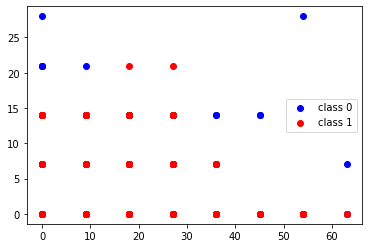

35 vs 36


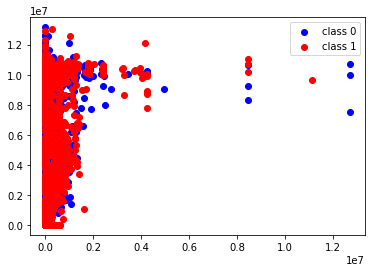

35 vs 37


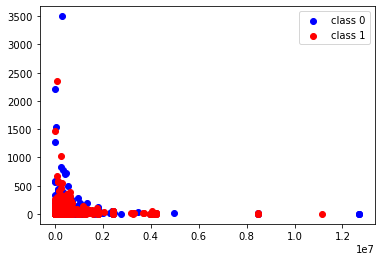

35 vs 38


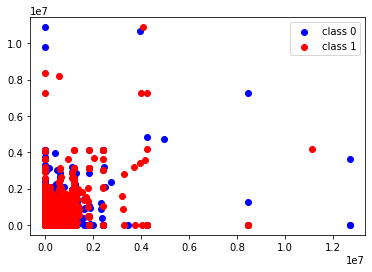

35 vs 39


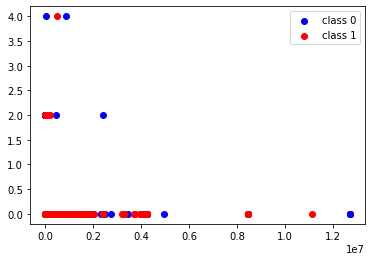

35 vs 40


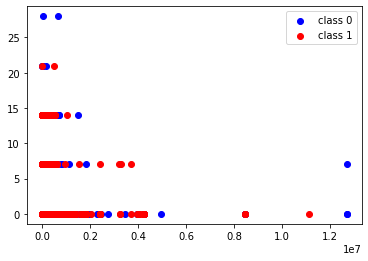

36 vs 37


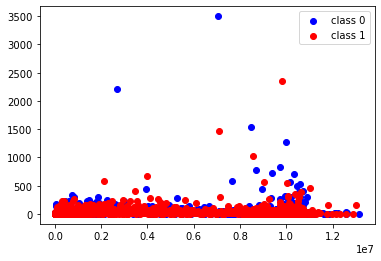

36 vs 38


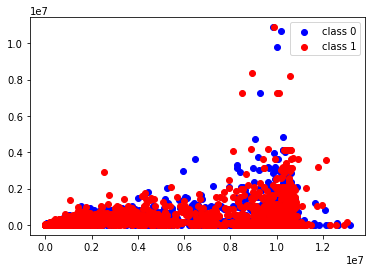

36 vs 39


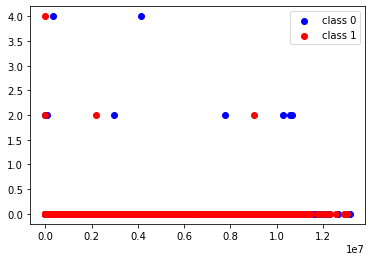

36 vs 40


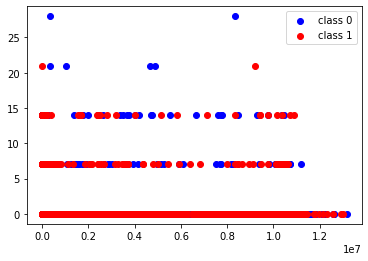

37 vs 38


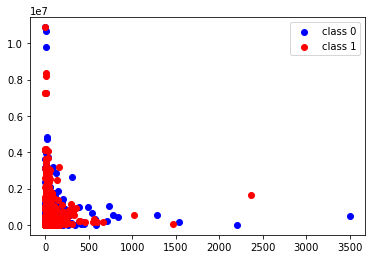

37 vs 39


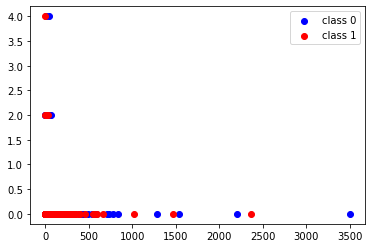

37 vs 40


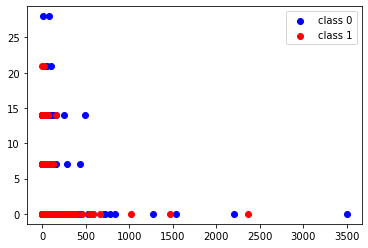

38 vs 39


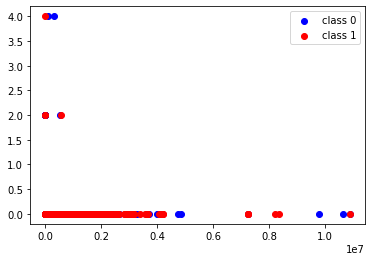

38 vs 40


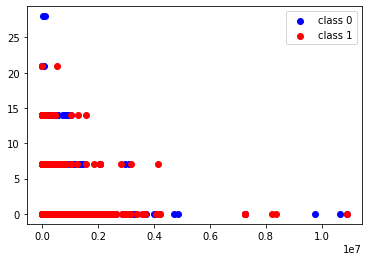

39 vs 40


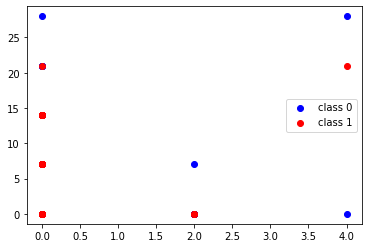

<Figure size 432x288 with 0 Axes>

In [31]:
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.5);
colors = ['blue', 'red']
for i in range(0,41):
    for j in range(i + 1,41):
        print(i, "vs", j)
        for ci, c in enumerate(np.unique(Y)):
            mask = np.where(Ytr == c)[0]   # Finding the right points
            plt.scatter(X[mask,i], X[mask,j], c=colors[ci], label='class %d' % ci)
        plt.legend()
        plt.show()
        plt.clf()